In [1]:
import requests
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [2]:
# url = "https://www.openintro.org/data/csv/loans_full_schema.csv"
# https://www.openintro.org/data/index.php?data=loans_full_schema
df = pd.read_csv("data/loans_full_schema.csv")
df.head(10)

emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   
5                      NaN         NaN    KY           OWN        34000.0   
6                      hr         10.0    MI      MORTGAGE        35000.0   
7                   police        10.0    AZ      MORTGAGE       110000.0   
8                    parts        10.0    NV      MORTGAGE        65000.0   
9               4th person         3.0    IL          RENT        30000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   
5     Not Verified            6.46                  NaN   
6  Source Verified           23.66             155000.0   
7  Source Verified           16.19                  NaN   
8  Source Verified           36.48                  NaN   
9     Not Verified           18.91                  NaN   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN                   NaN  ...         C1   
2                       NaN                   NaN  ...         D1   
3                       NaN                   NaN  ...         A3   
4                  Verified                 37.66  ...         C3   
5                       NaN                   NaN  ...         A3   
6              Not Verified                 13.12  ...         C2   
7                       NaN                   NaN  ...         B5   
8                       NaN                   NaN  ...         C2   
9                       NaN                   NaN  ...         A3   

   issue_month  loan_status  initial_listing_status  disbursement_method  \
0     Mar-2018      Current                   whole                 Cash   
1     Feb-2018      Current                   whole                 Cash   
2     Feb-2018      Current              fractional                 Cash   
3     Jan-2018      Current                   whole                 Cash   
4     Mar-2018      Current                   whole                 Cash   
5     Jan-2018      Current                   whole                 Cash   
6     Jan-2018      Current                   whole                 Cash   
7     Jan-2018      Current                   whole                 Cash   
8     Feb-2018      Current                   whole                 Cash   
9     Mar-2018      Current              fractional                 Cash   

    balance  paid_total  paid_principal  paid_interest  paid_late_fees  
0  27015.86     1999.33          984.14        1015.19             0.0  
1   4651.37      499.12          348.63         150.49             0.0  
2   1824.63      281.80          175.37         106.43             0.0  
3  18853.26     3312.89         2746.74         566.15             0.0  
4  21430.15     2324.65         1569.85         754.80             0.0  
5   4256.71      873.13          743.29         129.84             0.0  
6  22560.00     2730.51         1440.00        1290.51             0.0  
7  19005.39     1765.84          994.61         771.23             0.0  
8  18156.66     2703.22         1843.34         859.88             0.0  
9   6077.13      391.15          322.87          68.28             0.0  

[10 rows x 55 columns]

In [3]:
df = df.drop(columns = ["emp_title"])
df.head(5)

emp_length state homeownership  annual_income  verified_income  \
0         3.0    NJ      MORTGAGE        90000.0         Verified   
1        10.0    HI          RENT        40000.0     Not Verified   
2         3.0    WI          RENT        40000.0  Source Verified   
3         1.0    PA          RENT        30000.0     Not Verified   
4        10.0    CA          RENT        35000.0         Verified   

   debt_to_income  annual_income_joint verification_income_joint  \
0           18.01                  NaN                       NaN   
1            5.04                  NaN                       NaN   
2           21.15                  NaN                       NaN   
3           10.16                  NaN                       NaN   
4           57.96              57000.0                  Verified   

   debt_to_income_joint  delinq_2y  ...  sub_grade  issue_month  loan_status  \
0                   NaN          0  ...         C3     Mar-2018      Current   
1                   NaN          0  ...         C1     Feb-2018      Current   
2                   NaN          0  ...         D1     Feb-2018      Current   
3                   NaN          0  ...         A3     Jan-2018      Current   
4                 37.66          0  ...         C3     Mar-2018      Current   

   initial_listing_status  disbursement_method   balance  paid_total  \
0                   whole                 Cash  27015.86     1999.33   
1                   whole                 Cash   4651.37      499.12   
2              fractional                 Cash   1824.63      281.80   
3                   whole                 Cash  18853.26     3312.89   
4                   whole                 Cash  21430.15     2324.65   

   paid_principal  paid_interest  paid_late_fees  
0          984.14        1015.19             0.0  
1          348.63         150.49             0.0  
2          175.37         106.43             0.0  
3         2746.74         566.15             0.0  
4         1569.85         754.80             0.0  

[5 rows x 54 columns]

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /home/mmuratardag/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpril57oep
  JVM stdout: /tmp/tmpril57oep/h2o_mmuratardag_started_from_python.out
  JVM stderr: /tmp/tmpril57oep/h2o_mmuratardag_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Europe/Berlin
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.4
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_mmuratardag_hh6i7t
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.805 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ----------------------------------

In [5]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df.describe()

Rows:10000
Cols:54




emp_length state homeownership annual_income verified_income debt_to_income annual_income_joint verification_income_joint debt_to_income_joint delinq_2y months_since_last_delinq earliest_credit_line inquiries_last_12m total_credit_lines open_credit_lines total_credit_limit total_credit_utilized num_collections_last_12m num_historical_failed_to_pay months_since_90d_late current_accounts_delinq total_collection_amount_ever current_installment_accounts accounts_opened_24m months_since_last_credit_inquiry num_satisfactory_accounts num_accounts_120d_past_due num_accounts_30d_past_due num_active_debit_accounts total_debit_limit num_total_cc_accounts num_open_cc_accounts num_cc_carrying_balance num_mort_accounts account_never_delinq_percent tax_liens public_record_bankrupt loan_purpose application_type loan_amount term interest_rate installment grade sub_grade issue_month loan_status initial_listing_status disbursement_method balance paid_total paid_principal paid_interest paid_late_fees 
 
 
 type int enum enum real enum real enum enum enum int enum int int int int int int int int enum int int int int int int int int int int int int int int real int int enum enum int int real real enum enum time enum enum enum real real real real real 
 mins 0.0 0.0 0.0 0.0 1963.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 14.3 0.0 0.0 1000.0 36.0 5.31 30.75 1514764800000.0 0.0 0.0 0.0 0.0 0.0 
 mean 5.930306000217788 79222.14841200004 19.308191659983898 0.21599999999999983 2001.2899999999959 1.9581999999999988 22.679600000000082 11.404399999999992 183606.2304000007 51049.063100000094 0.013799999999999996 0.16710000000000017 0.0001 184.33399999999997 2.6635999999999966 4.376099999999998 7.340703402451604 11.379600000000044 0.0 0.0001 3.595299999999999 27357.41029999996 13.030000000000001 8.095000000000015 5.230500000000007 1.3831000000000058 94.6489900000002 0.043299999999999984 0.12380000000000034 16361.922500000059 43.27200000000007 12.427523999999957 476.2053230000001 1517408907839.9878 14458.91660999997 2494.2347733001843 1894.4484659999982 599.6667809999985 0.11951600000279998 
 maxs 10.0 2300000.0 469.09 13.0 2015.0 29.0 87.0 51.0 3386034.0 942456.0 3.0 52.0 1.0 199308.0 35.0 29.0 24.0 51.0 0.0 1.0 32.0 386700.0 66.0 46.0 43.0 14.0 100.0 52.0 3.0 40000.0 60.0 30.94 1566.59 1519862400000.0 40000.0 41630.443684235 40000.0 4216.44 52.98 
 sigma 3.7037336245929806 64734.29049176395 15.004851306313105 0.6836598123876442 7.7955100537231985 2.3801300934877907 11.885439420022307 5.868279501730563 187632.7077768123 53636.73117223671 0.12653521690071742 0.6877680513728781 0.01 2206.3898587658655 2.9353869744326673 3.1585829820736833 5.981589805359186 5.859704553451955 0.0 0.01 2.434689031697502 26570.164081410632 7.874712763657539 4.906606003975448 3.3276233347098936 1.7172737967282017 9.155058519176665 0.5938521499814611 0.33717195686007145 10301.956759412325 11.029876781640915 5.001104881366463 294.8516271152953 2133460320.5273404 9964.561865089268 3958.230365361187 3884.4071749457808 517.3280619005993 1.8134676209799623 
 zeros 690 23 28 8576 0 3060 0 2 2 28 9873 8586 9999 8635 1414 527 693 2 9682 9999 333 135 0 7 125 4484 0 9754 8785 0 0 0 0 0 455 15 15 18 9948 
 missing 817 0 0 0 0 24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1271 0 318 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 3.0 NJ MORTGAGE 90000.0 Verified 18.01 nan nan nan 0.0 38.0 2001.0 6.0 28.0 10.0 70795.0 38767.0 0.0 0.0 38.0 0.0 1250.0 2.0 5.0 5.0 10.0 0.0 0.0 2.0 11100.0 14.0 8.0 6.0 1.0 92.9 0.0 0.0 moving individual 28000.0 60.0 14.07 652.53 C C3 2018-03-01 00:00:00 Current whole Cash 27015.86 1999.33 984.14 1015.19 0.0 
 1 10.0 HI RENT 40000.0 Not Verified 5.04 nan nan nan 0.0 nan 1996.0 1.0 30.0 14.0 28800.0 4321.0 0.0 1.0 nan 0.0 0.0 0.0 11.0 8.0 14.0 0.0 0.0 3.0 16500.0 24.0 14.0 4.0 0.0 100.0 0.0 1.0 debt_consolidation individual 5000.0 36.0 12.61 167.54 C C1 2018-02-01 00:00:00 Current whole Cash 4651.37 499.12 348.63 150.49 0.0

In [7]:
y = "loan_amount"

In [8]:
splits = df.split_frame(ratios = [0.8], seed = 666)
train = splits[0]
test = splits[1]

In [9]:
aml = H2OAutoML(max_runtime_secs = 666, seed = 666, project_name = "autoML_py_r_666")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |██
18:17:32.186: _train param, Dropping bad and constant columns: [num_accounts_120d_past_due]

██████████
18:18:46.983: XRT_1_AutoML_1_20220821_181723 [DRF XRT (Extremely Randomized Trees)] failed: java.lang.AssertionError

█
18:18:52.253: _train param, Dropping bad and constant columns: [num_accounts_120d_past_due]

██████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220821_181723

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 10676.057901911958
RMSE: 103.3250110182039
MAE: 71.44664584028905
RMSLE: 0.011116686552876858
R^2: 0.9998988832162786
Mean Residual Deviance: 10676.057901911958
Null degrees of freedom: 8029
Residual degrees of freedom: 8019
Null deviance: 847819143344.1125
Residual deviance: 85728744.95235302
AIC: 97296.49708383581

ModelMetricsRegressionGLM: stackedensem

mean            sd    cv_1_valid  \
0                     mae  1.362383e+02  7.053578e+00  1.427069e+02   
1  mean_residual_deviance  7.823684e+04  2.507897e+04  1.131524e+05   
2                     mse  7.823684e+04  2.507897e+04  1.131524e+05   
3           null_deviance  1.696106e+11  1.393560e+10  1.776264e+11   
4                      r2  9.992529e-01  2.494052e-04  9.989438e-01   
5       residual_deviance  1.253920e+08  4.035858e+07  1.876067e+08   
6                    rmse  2.768993e+02  4.421014e+01  3.363813e+02   
7                   rmsle  2.110221e-02  4.429571e-03  2.794365e-02   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  1.365488e+02  1.278464e+02  1.305121e+02  1.435771e+02  
1  7.053670e+04  5.264351e+04  6.038034e+04  9.447125e+04  
2  7.053670e+04  5.264351e+04  6.038034e+04  9.447125e+04  
3  1.612250e+11  1.816638e+11  1.784098e+11  1.491282e+11  
4  9.992951e-01  9.995279e-01  9.994435e-01  9.990540e-01  
5  1.134936e+08  8.570363e+07  9.920490e+07  1.409511e+08  
6  2.655875e+02  2.294417e+02  2.457241e+02  3.073618e+02  
7  1.913138e-02  1.685294e-02  1.860687e-02  2.297622e-02

In [10]:
perf_metr = aml.leader.model_performance(test)
perf_metr


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 57146.398089815564
RMSE: 239.05312817408512
MAE: 126.65902373484649
RMSLE: 0.02044879979018608
R^2: 0.9994714863808026
Mean Residual Deviance: 57146.398089815564
Null degrees of freedom: 1969
Residual degrees of freedom: 1959
Null deviance: 213468234253.53403
Residual deviance: 112578404.23693666
AIC: 27192.75995494927


In [11]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20220821_181723 239.053 57146.4 126.659 0.0204488 57146.4 
 StackedEnsemble_AllModels_4_AutoML_1_20220821_181723 239.053 57146.4 126.659 0.0204488 57146.4 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220821_181723 242.775 58939.7 129.07 0.0213791 58939.7 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220821_181723 271.031 73457.7 127.029 0.0163572 73457.7 
 StackedEnsemble_AllModels_2_AutoML_1_20220821_181723 273.908 75025.4 126.919 0.0161694 75025.4 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_22 279.126 77911.4 152.254 0.0248754 77911.4 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_7 301.687 91014.8 163.504 0.030739 91014.8 
 GBM_5_AutoML_1_20220821_181723 314.872 99144.1 148.759 0.0182926 99144.1 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_28 319.273 101935 141.699 0.0260285 101935 
 XGBoost_3_AutoML_1_20220821_181723 329.727 108720 170.396 0.02559 108720 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_29 340.413 115881 191.867 0.0206041 115881 
 GBM_grid_1_AutoML_1_20220821_181723_model_7 343.327 117873 150.753 0.0308624 117873 
 StackedEnsemble_AllModels_1_AutoML_1_20220821_181723 343.617 118073 137.693 0.0198313 118073 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220821_181723 344.734 118841 139.212 0.0200513 118841 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_6 346.658 120172 187.843 0.0221526 120172 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_14 349.588 122211 169.425 0.0248797 122211 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_10 357.991 128158 177.556 0.0302454 128158 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_11 361.702 130828 159.423 0.0242078 130828 
 GBM_2_AutoML_1_20220821_181723 364.048 132531 157.275 0.0230617 132531 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_17 365.95 133919 170.454 0.0279141 133919 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_24 368.737 135967 154.635 0.0248266 135967 
 XGBoost_2_AutoML_1_20220821_181723 374.055 139917 153.714 0.02127 139917 
 GBM_3_AutoML_1_20220821_181723 374.372 140154 156.063 0.0270573 140154 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_15 379.843 144281 203.174 0.0328233 144281 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_16 383.851 147342 164.363 0.0254445 147342 
 GBM_grid_1_AutoML_1_20220821_181723_model_5 385.98 148981 183.727 0.0274737 148981 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_9 386.008 149003 157.847 0.0229017 149003 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_4 389.111 151407 146.848 0.0220692 151407 
 GBM_grid_1_AutoML_1_20220821_181723_model_2 392.422 153995 195.369 0.0250658 153995 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_27 399.09 159273 109.632 0.0191727 159273 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_18 409.321 167543 147.953 0.023693 167543 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20220821_181723 417.074 173951 194.517 0.0272511 173951 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_1 423.134 179042 123.289 0.0241299 179042 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_20 429.99 184892 107.51 0.0209503 184892 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_13 430.376 185224 212.586 0.0274252 185224 
 GBM_grid_1_AutoML_1_20220821_181723_model_8 436.96 190934 137.345 0.0203631 190934 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_21 440.096 193684 139.803 0.0211365 193684 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_26 445.974 198893 175.712 0.0235954 198893 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_31 446.619 199469 189.885 0.0242119 199469 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_32 451.768 204094 142.353 0.0211559 204094 
 GBM_grid_1_AutoML_1_20220821_181723_model_12 451.878 204194 229.676 0.0353846 204194 
 GBM_grid_1_AutoML_1_20220821_181723_model_6 452.021 204323 245.217 0.0369005 204323 
 GBM_4_AutoML_1_20220821_181723 455.348 207342 253.855 0.0249758 207342 
 GBM_grid_1_AutoML_1_20220821_181723_model_10 457.23 209059 228.027 0.0256098 209059 
 DRF_1_AutoML_1_20220821_181723 

In [12]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220821_181723

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 10676.057901911958
RMSE: 103.3250110182039
MAE: 71.44664584028905
RMSLE: 0.011116686552876858
R^2: 0.9998988832162786
Mean Residual Deviance: 10676.057901911958
Null degrees of freedom: 8029
Residual degrees of freedom: 8019
Null deviance: 847819143344.1125
Residual deviance: 85728744.95235302
AIC: 97296.49708383581

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 78077.19831301222
RMSE: 279.42297384612493
MAE: 136.1267004531005
RMSLE: 0.021472596586289406
R^2: 0.999260502776594
Mean Residual Deviance: 78077.19831301222
Null degrees of freedom: 8029
Residual degrees of freedom: 8020
Null deviance: 848053094849.6191
Residual deviance: 626959902.4534881
AIC: 113271.743148865

Cross-Validation Metrics Summary: 


mean            sd    cv_1_valid  \
0                     mae  1.362383e+02  7.053578e+00  1.427069e+02   
1  mean_residual_deviance  7.823684e+04  2.507897e+04  1.131524e+05   
2                     mse  7.823684e+04  2.507897e+04  1.131524e+05   
3           null_deviance  1.696106e+11  1.393560e+10  1.776264e+11   
4                      r2  9.992529e-01  2.494052e-04  9.989438e-01   
5       residual_deviance  1.253920e+08  4.035858e+07  1.876067e+08   
6                    rmse  2.768993e+02  4.421014e+01  3.363813e+02   
7                   rmsle  2.110221e-02  4.429571e-03  2.794365e-02   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  1.365488e+02  1.278464e+02  1.305121e+02  1.435771e+02  
1  7.053670e+04  5.264351e+04  6.038034e+04  9.447125e+04  
2  7.053670e+04  5.264351e+04  6.038034e+04  9.447125e+04  
3  1.612250e+11  1.816638e+11  1.784098e+11  1.491282e+11  
4  9.992951e-01  9.995279e-01  9.994435e-01  9.990540e-01  
5  1.134936e+08  8.570363e+07  9.920490e+07  1.409511e+08  
6  2.655875e+02  2.294417e+02  2.457241e+02  3.073618e+02  
7  1.913138e-02  1.685294e-02  1.860687e-02  2.297622e-02

In [13]:
lb_all_c = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb_all_c

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20220821_181723 239.053 57146.4 126.659 0.0204488 57146.4 1036 0.152643 StackedEnsemble 
 StackedEnsemble_AllModels_4_AutoML_1_20220821_181723 239.053 57146.4 126.659 0.0204488 57146.4 1073 0.101376 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220821_181723 242.775 58939.7 129.07 0.0213791 58939.7 363 0.030908 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220821_181723 271.031 73457.7 127.029 0.0163572 73457.7 316 0.032121 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20220821_181723 273.908 75025.4 126.919 0.0161694 75025.4 443 0.042876 StackedEnsemble 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_22 279.126 77911.4 152.254 0.0248754 77911.4 1348 0.004341 XGBoost 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_7 301.687 91014.8 163.504 0.030739 91014.8 4625 0.007715 XGBoost 
 GBM_5_AutoML_1_20220821_181723 314.872 99144.1 148.759 0.0182926 99144.1 1350 0.025171 GBM 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_28 319.273 101935 141.699 0.0260285 101935 1811 0.006494 XGBoost 
 XGBoost_3_AutoML_1_20220821_181723 329.727 108720 170.396 0.02559 108720 1456 0.007551 XGBoost

In [14]:
xgb_b = aml.get_best_model(algorithm = "xgboost", criterion = "rmse")
xgb_b

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220821_181723_model_22


Model Summary: 


number_of_trees
0               56.0



ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 15493.330269892042
RMSE: 124.47220681699204
MAE: 84.26117658603236
RMSLE: 0.013104355454497238
Mean Residual Deviance: 15493.330269892042

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 112254.33389294356
RMSE: 335.0437790691592
MAE: 169.51523850228392
RMSLE: 0.025227725786084752
Mean Residual Deviance: 112254.33389294356

Cross-Validation Metrics Summary: 


mean            sd     cv_1_valid  \
0                     mae     169.515240      5.956079     176.121370   
1  mean_residual_deviance  112254.336000  28363.742000  129527.200000   
2                     mse  112254.336000  28363.742000  129527.200000   
3                      r2       0.998932      0.000292       0.998761   
4       residual_deviance  112254.336000  28363.742000  129527.200000   
5                    rmse     332.977700     41.535854     359.898860   
6                   rmsle       0.024985      0.003906       0.025522   

      cv_2_valid    cv_3_valid     cv_4_valid    cv_5_valid  
0     172.799840    164.898650     171.989360    161.766970  
1  103014.010000  86148.920000  152830.160000  89751.390000  
2  103014.010000  86148.920000  152830.160000  89751.390000  
3       0.999030      0.999195       0.998509      0.999166  
4  103014.010000  86148.920000  152830.160000  89751.390000  
5     320.957950    293.511380     390.934970    299.585360  
6       0.031078      0.021075       0.025142      0.022106


Scoring History: 


timestamp           duration  number_of_trees  training_rmse  \
0     2022-08-21 18:21:50   2 min 51.982 sec              0.0   19400.966633   
1     2022-08-21 18:21:51   2 min 52.411 sec              5.0    3295.070453   
2     2022-08-21 18:21:51   2 min 52.508 sec             10.0     620.510345   
3     2022-08-21 18:21:51   2 min 52.678 sec             15.0     227.668677   
4     2022-08-21 18:21:51   2 min 52.825 sec             20.0     181.667668   
5     2022-08-21 18:21:51   2 min 52.875 sec             25.0     168.345040   
6     2022-08-21 18:21:51   2 min 52.934 sec             30.0     162.306108   
7     2022-08-21 18:21:51   2 min 53.003 sec             35.0     153.448318   
8     2022-08-21 18:21:51   2 min 53.067 sec             40.0     146.226222   
9     2022-08-21 18:21:51   2 min 53.120 sec             45.0     141.261230   
10    2022-08-21 18:21:51   2 min 53.168 sec             50.0     133.874654   
11    2022-08-21 18:21:51   2 min 53.278 sec             55.0     125.342473   
12    2022-08-21 18:21:51   2 min 53.305 sec             56.0     124.472207   

    training_mae  training_deviance  
0   16456.489415       3.763975e+08  
1    2768.183757       1.085749e+07  
2     493.082949       3.850331e+05  
3     160.190124       5.183303e+04  
4     118.625113       3.300314e+04  
5     110.224911       2.834005e+04  
6     106.831865       2.634327e+04  
7     101.629903       2.354639e+04  
8      97.793241       2.138211e+04  
9      94.954696       1.995474e+04  
10     90.448338       1.792242e+04  
11     84.792011       1.571074e+04  
12     84.261177       1.549333e+04


Variable Importances: 


variable  relative_importance  scaled_importance  \
0                         installment         1.098761e+12           1.000000   
1                             balance         4.220212e+11           0.384088   
2                                term         1.011400e+11           0.092049   
3                      paid_principal         2.235572e+10           0.020346   
4                          paid_total         1.117411e+10           0.010170   
5   initial_listing_status.fractional         2.201505e+09           0.002004   
6                       interest_rate         1.502819e+09           0.001368   
7                             grade.A         9.562461e+08           0.000870   
8                       paid_interest         7.423837e+08           0.000676   
9                             grade.C         2.243341e+08           0.000204   
10                        issue_month         1.230764e+08           0.000112   
11                loan_status.Current         9.290613e+07           0.000085   
12                  total_debit_limit         5.553624e+07           0.000051   
13                 total_credit_limit         3.223798e+07           0.000029   
14   months_since_last_credit_inquiry         2.216250e+07           0.000020   
15                  num_mort_accounts         1.680226e+07           0.000015   
16                     debt_to_income         1.663975e+07           0.000015   
17               earliest_credit_line         1.531878e+07           0.000014   
18                accounts_opened_24m         1.482875e+07           0.000013   
19                      annual_income         1.435266e+07           0.000013   

    percentage  
0     0.661229  
1     0.253970  
2     0.060866  
3     0.013454  
4     0.006725  
5     0.001325  
6     0.000904  
7     0.000575  
8     0.000447  
9     0.000135  
10    0.000074  
11    0.000056  
12    0.000033  
13    0.000019  
14    0.000013  
15    0.000010  
16    0.000010  
17    0.000009  
18    0.000009  
19    0.000009


See the whole table with table.as_data_frame()


In [15]:
xgb_b.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'distribution', 'tweedie_power', 'categorical_encoding', 'quiet_mode', 'checkpoint', 'export_checkpoints_dir', 'ntrees', 'max_depth', 'min_rows', 'min_child_weight', 'learn_rate', 'eta', 'sample_rate', 'subsample', 'col_sample_rate', 'colsample_bylevel', 'col_sample_rate_per_tree', 'colsample_bytree', 'colsample_bynode', 'max_abs_leafnode_pred', 'max_delta_step', 'monotone_constraints', 'interaction_constraints', 'score_tree_interval', 'min_split_improvement', 'gamma', 'nthread', 'save_matrix_directory', 'build_tree_one_node', 'calibrate_model', 'calibration_frame', 'max_b

In [16]:
xgb_b.params['max_depth']

{'default': 6, 'actual': 6, 'input': 6}

In [17]:
xgb_b.params['learn_rate']

{'default': 0.3, 'actual': 0.3, 'input': 0.3}

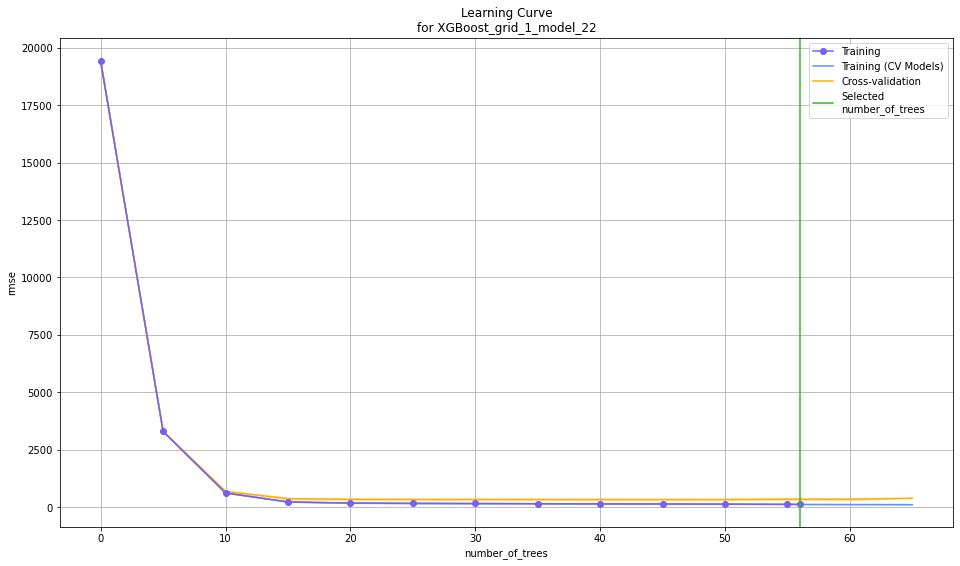

In [18]:
xgb_b.learning_curve_plot()

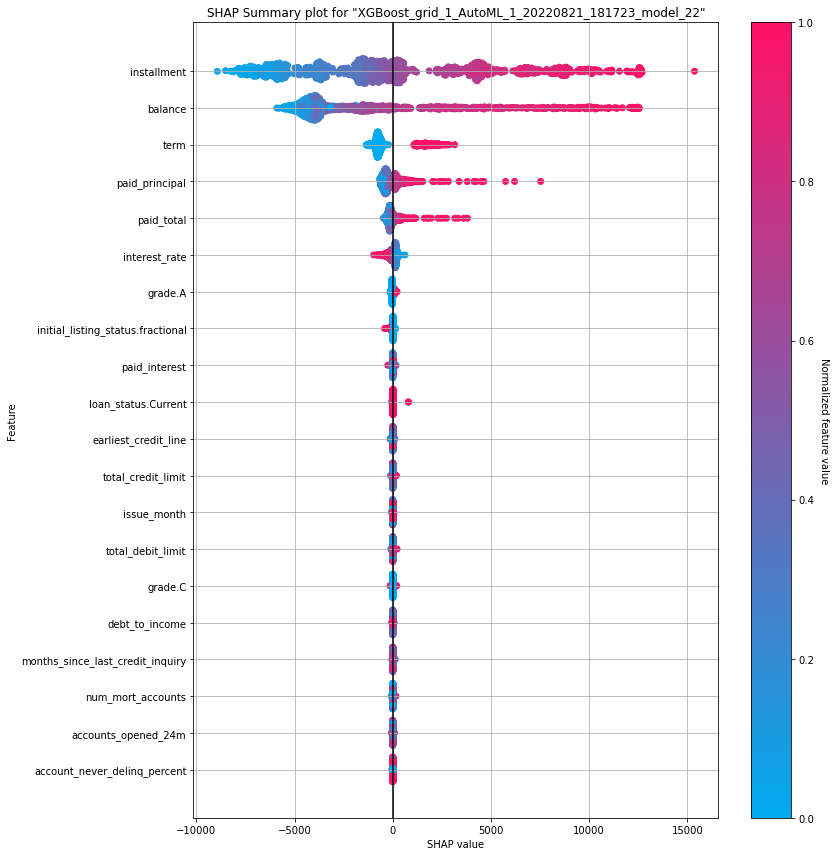

In [19]:
xgb_b.shap_summary_plot(test)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20220821_181723 239.053 57146.4 126.659 0.0204488 57146.4 1036 0.152643 StackedEnsemble 
 StackedEnsemble_AllModels_4_AutoML_1_20220821_181723 239.053 57146.4 126.659 0.0204488 57146.4 1073 0.101376 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220821_181723 242.775 58939.7 129.07 0.0213791 58939.7 363 0.030908 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220821_181723 271.031 73457.7 127.029 0.0163572 73457.7 316 0.032121 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20220821_181723 273.908 75025.4 126.919 0.0161694 75025.4 443 0.042876 StackedEnsemble 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_22 279.126 77911.4 152.254 0.0248754 77911.4 1348 0.004341 XGBoost 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_7 301.687 91014.8 163.504 0.030739 91014.8 4625 0.007715 XGBoost 
 GBM_5_AutoML_1_20220821_181723 314.872 99144.1 148.759 0.0182926 99144.1 1350 0.025171 GBM 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_28 319.273 101935 141.699 0.0260285 101935 1811 0.006494 XGBoost 
 XGBoost_3_AutoML_1_20220821_181723 329.727 108720 170.396 0.02559 108720 1456 0.007551 XGBoost 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_29 340.413 115881 191.867 0.0206041 115881 773 0.006055 XGBoost 
 GBM_grid_1_AutoML_1_20220821_181723_model_7 343.327 117873 150.753 0.0308624 117873 4028 0.044905 GBM 
 StackedEnsemble_AllModels_1_AutoML_1_20220821_181723 343.617 118073 137.693 0.0198313 118073 371 0.034668 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220821_181723 344.734 118841 139.212 0.0200513 118841 371 0.03787 StackedEnsemble 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_6 346.658 120172 187.843 0.0221526 120172 1172 0.007191 XGBoost 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_14 349.588 122211 169.425 0.0248797 122211 842 0.005298 XGBoost 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_10 357.991 128158 177.556 0.0302454 128158 1620 0.007545 XGBoost 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_11 361.702 130828 159.423 0.0242078 130828 1222 0.005944 XGBoost 
 GBM_2_AutoML_1_20220821_181723 364.048 132531 157.275 0.0230617 132531 1656 0.030343 GBM 
 XGBoost_grid_1_AutoML_1_20220821_181723_model_17 365.95 133919 170.454 0.0279141 133919 1300 0.00685 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

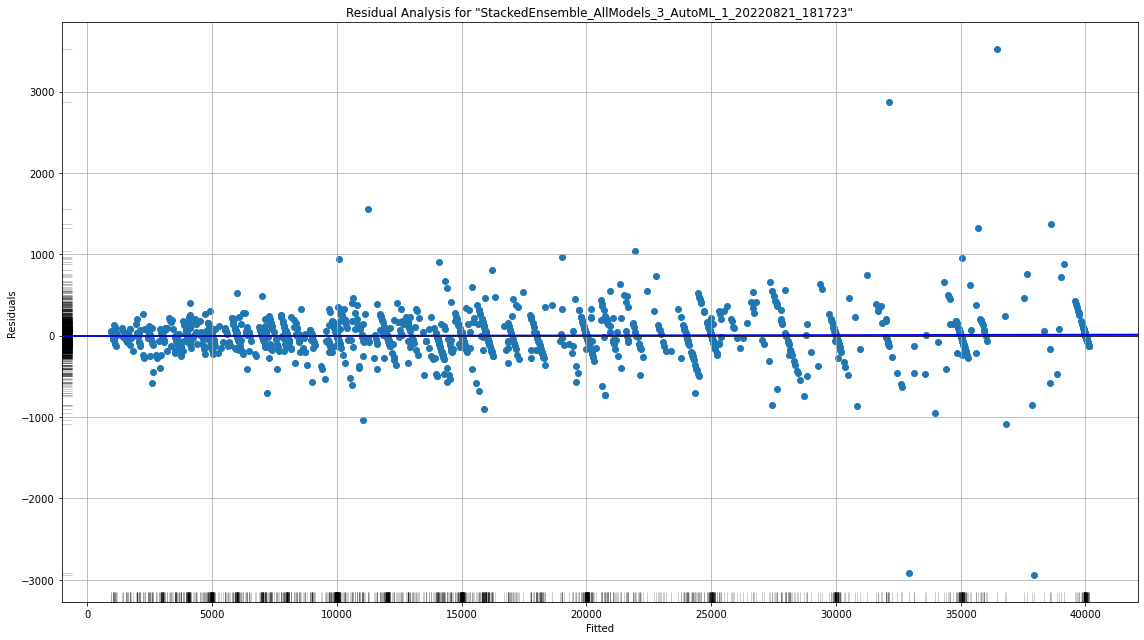

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

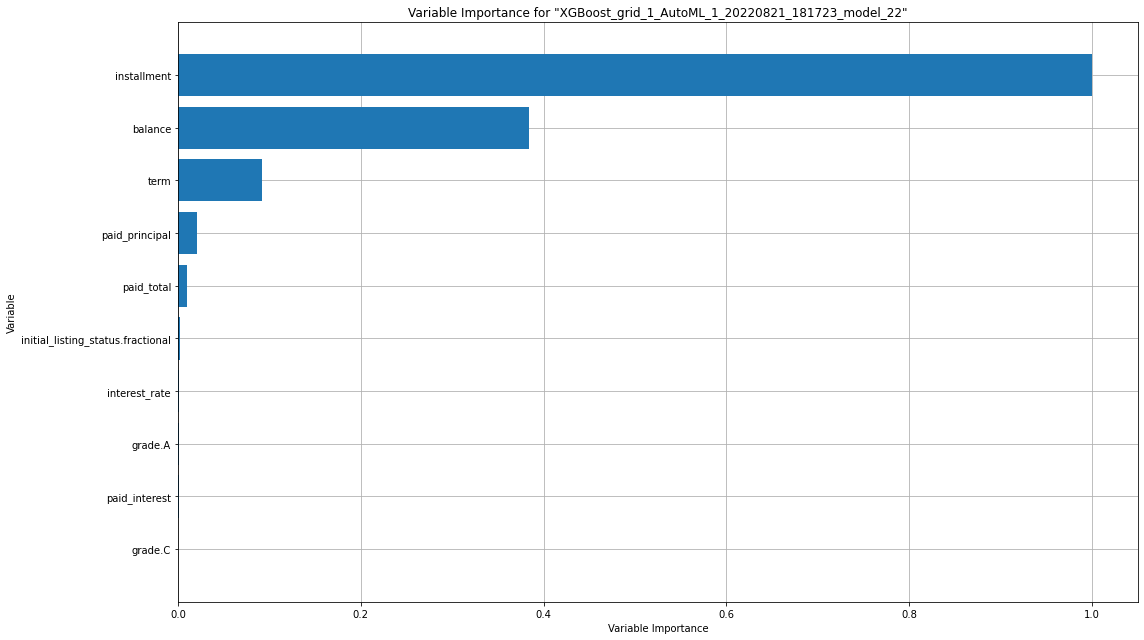

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

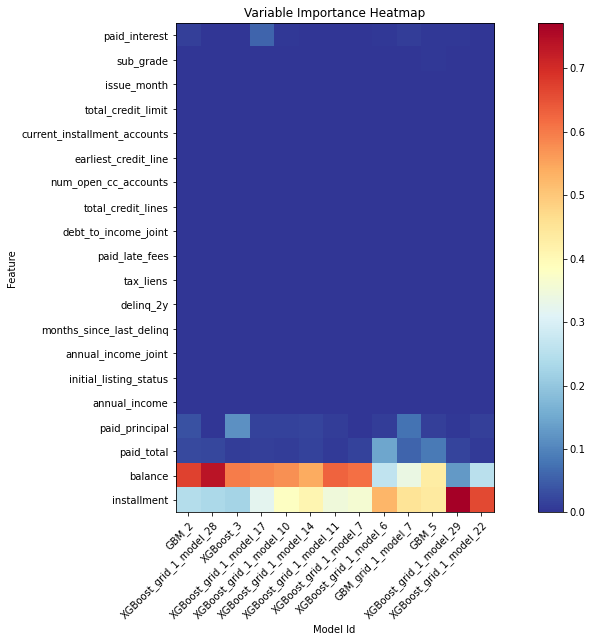

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

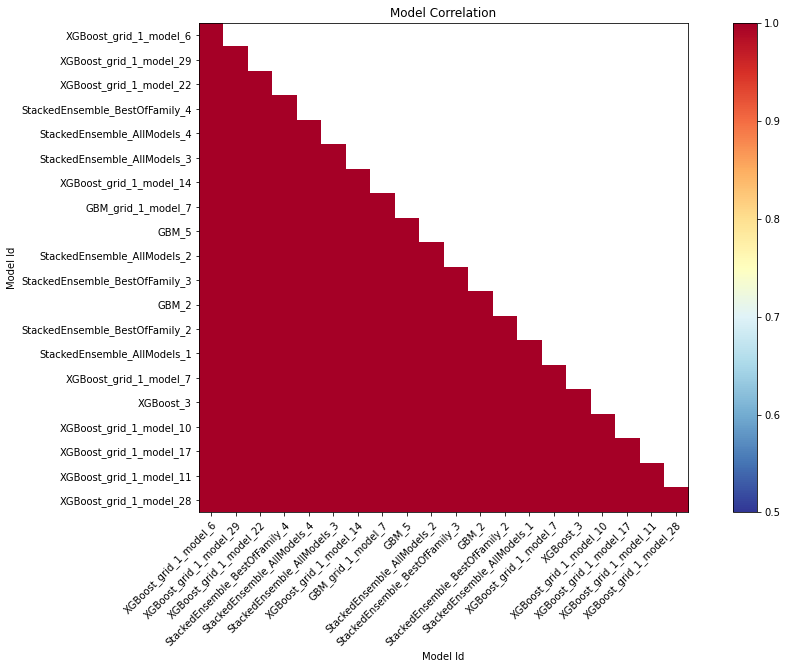

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

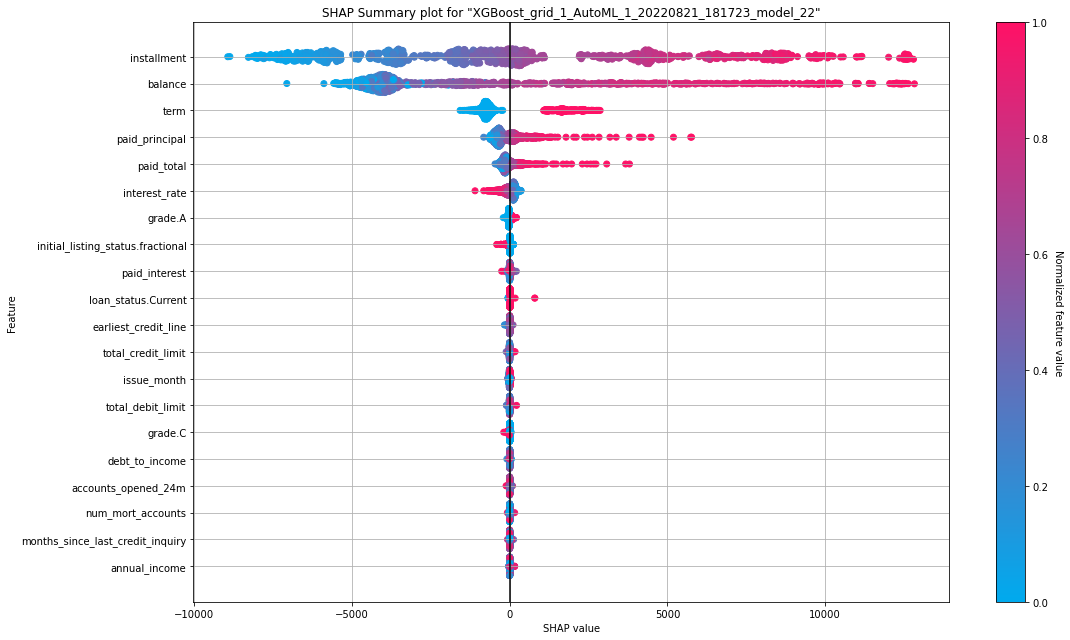

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

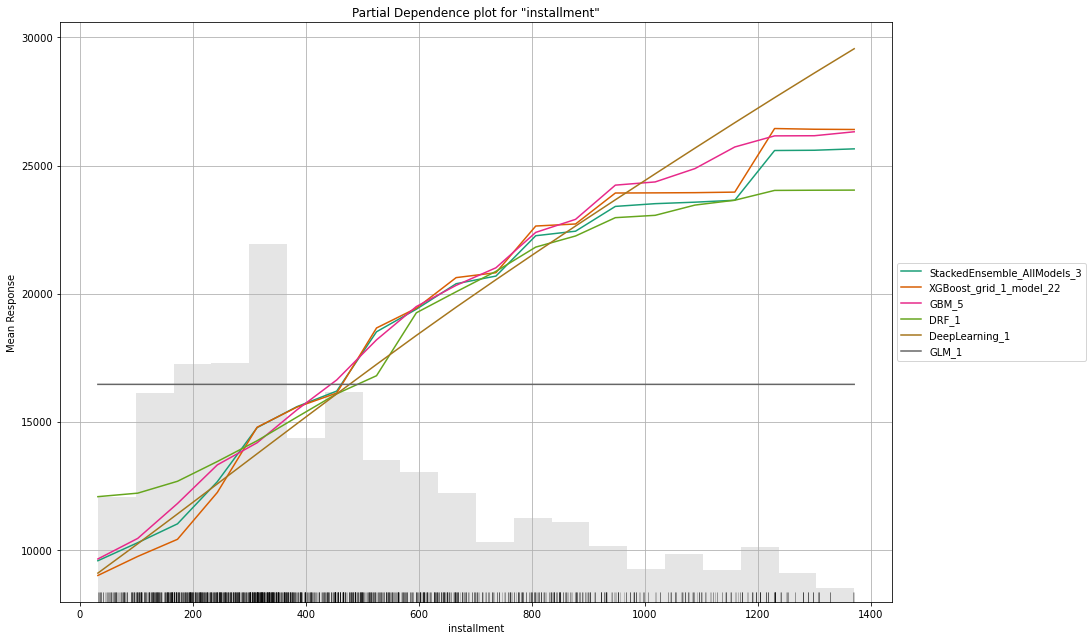

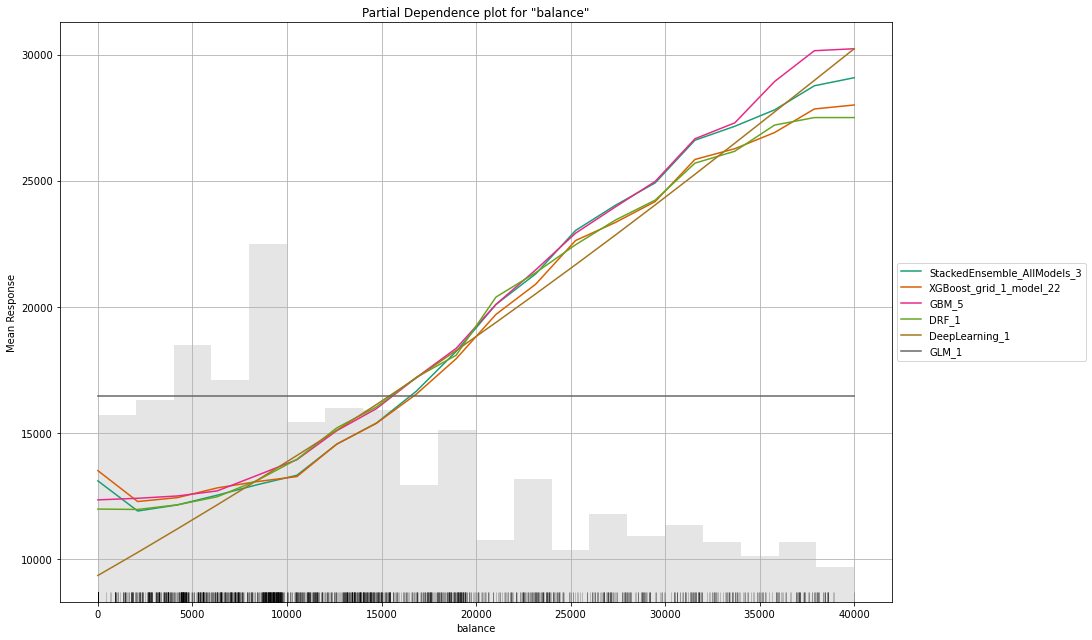

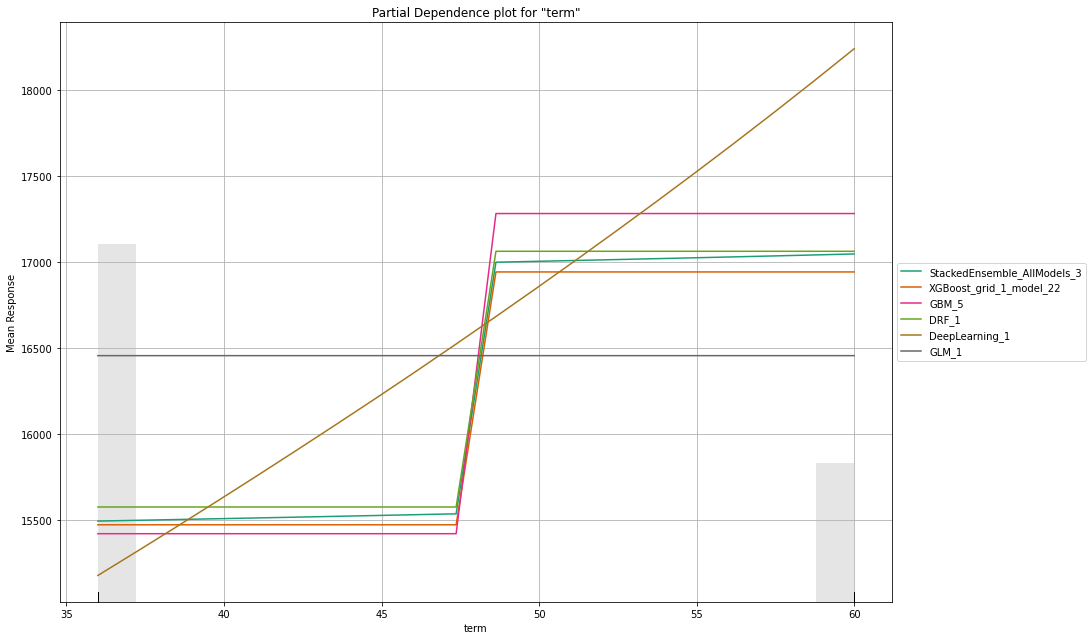

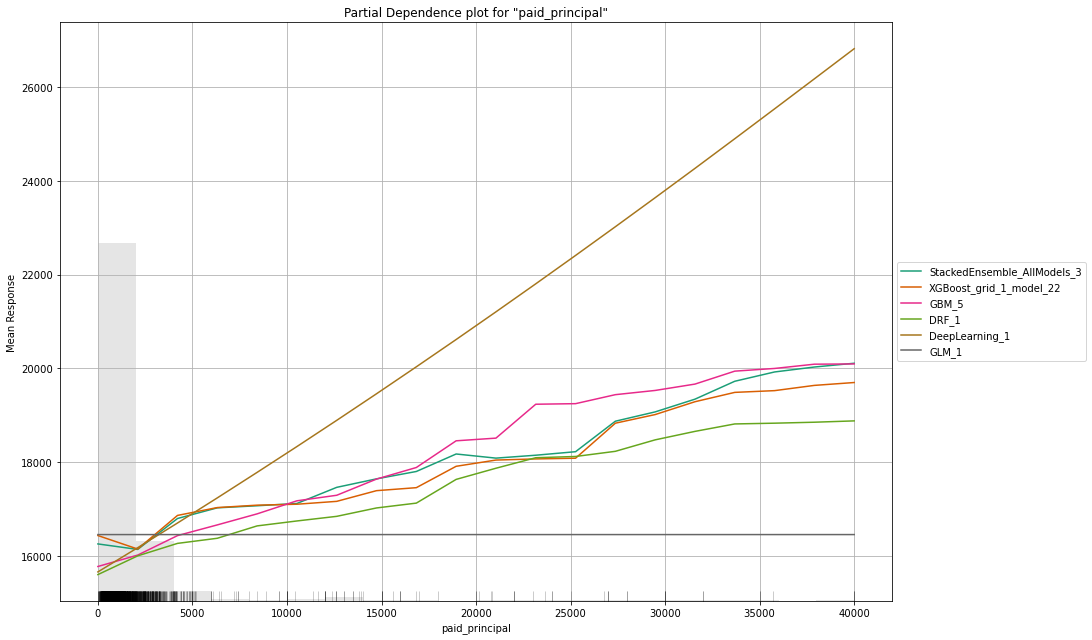

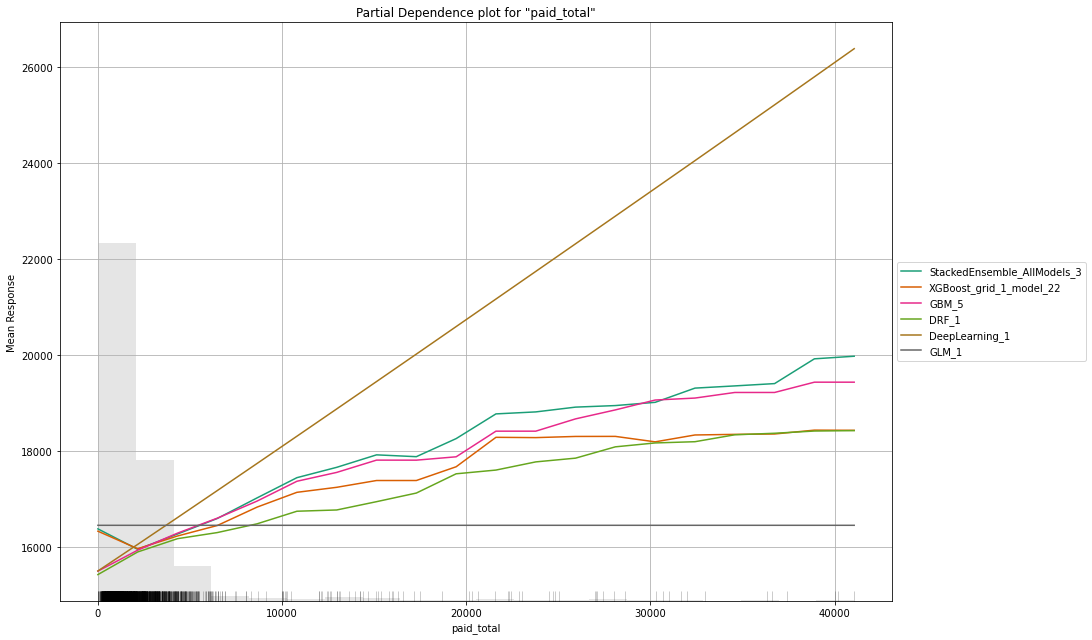

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

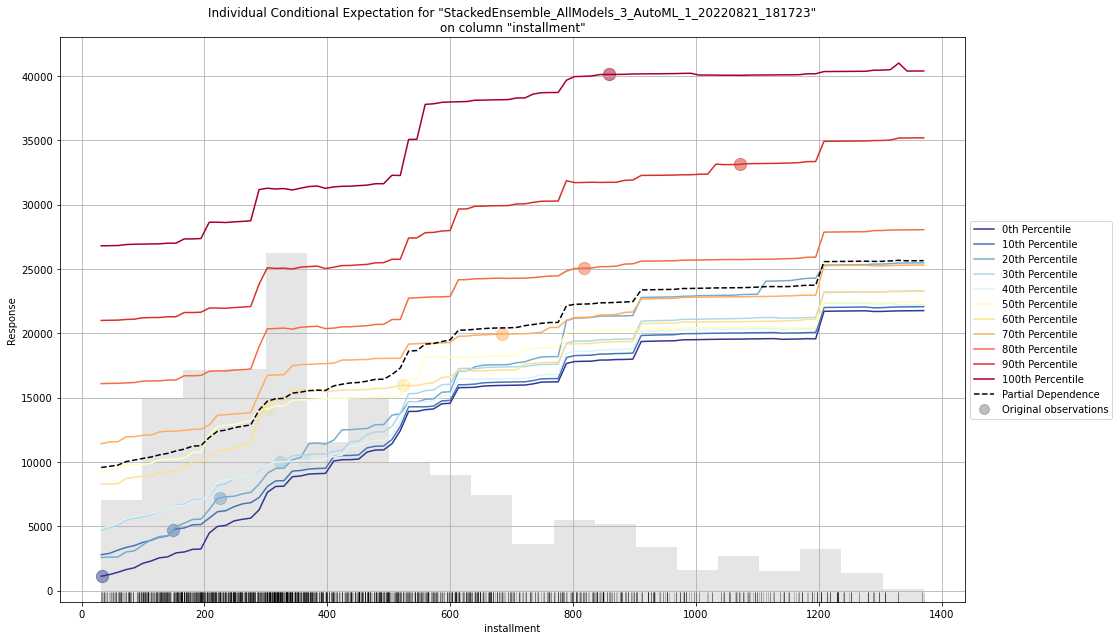

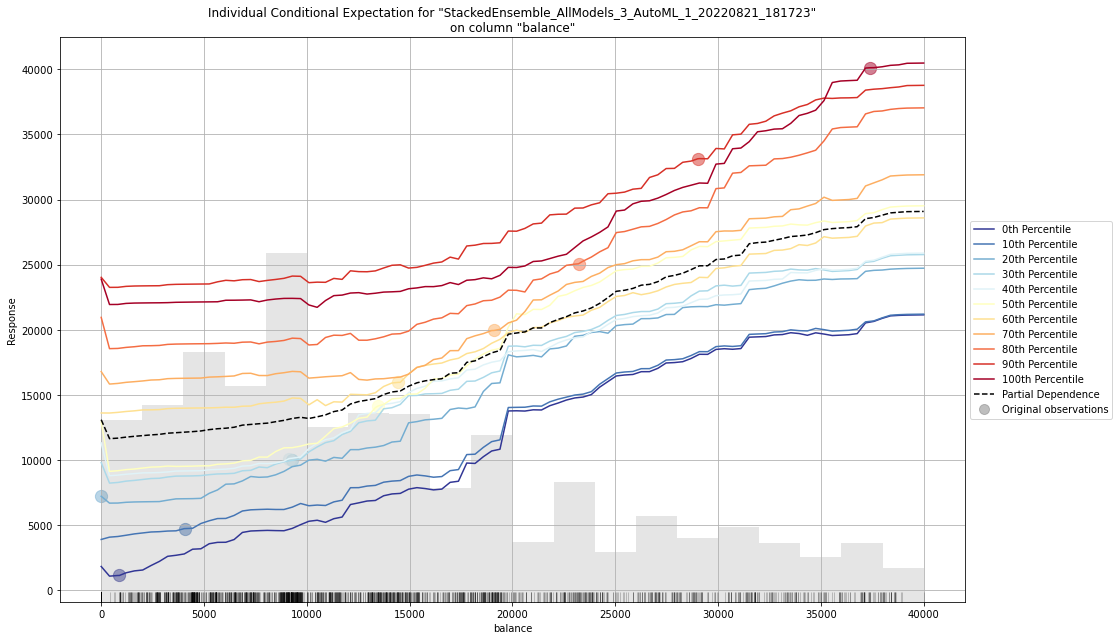

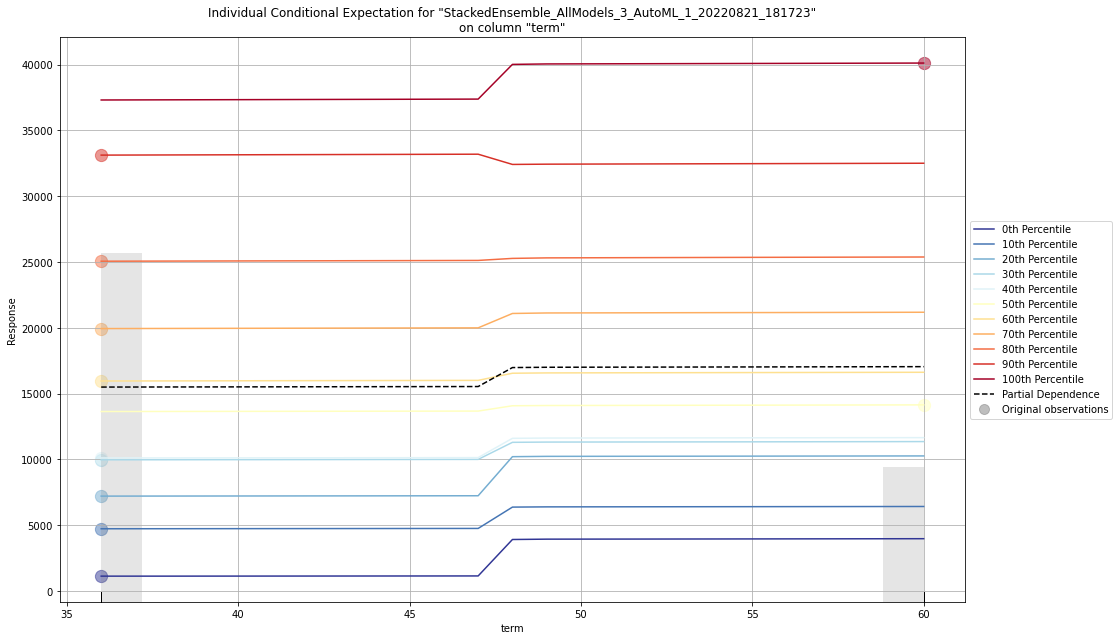

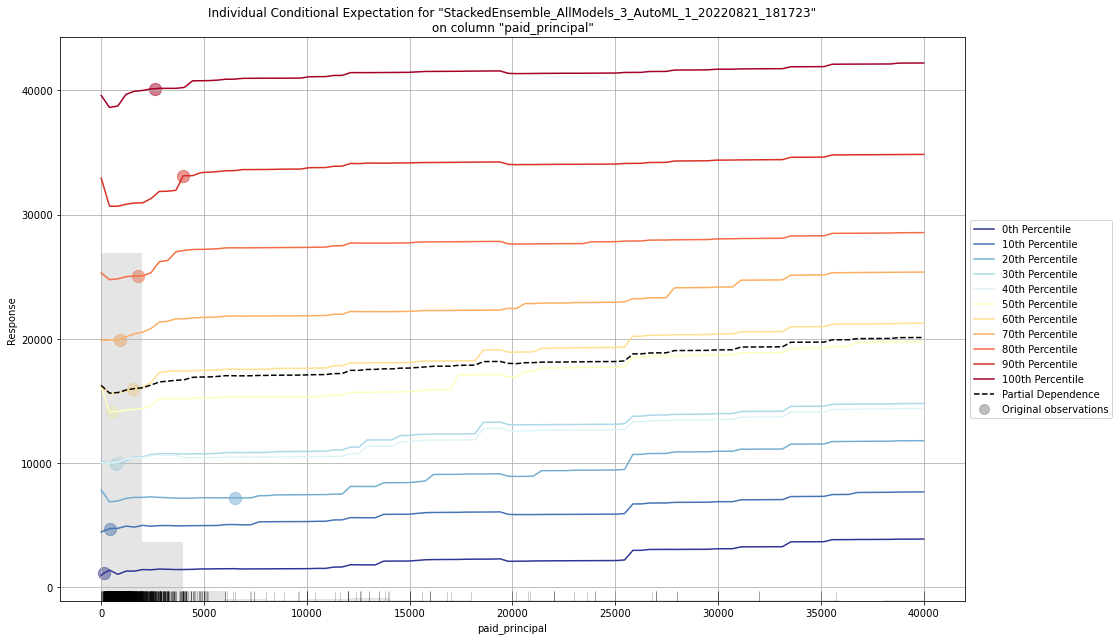

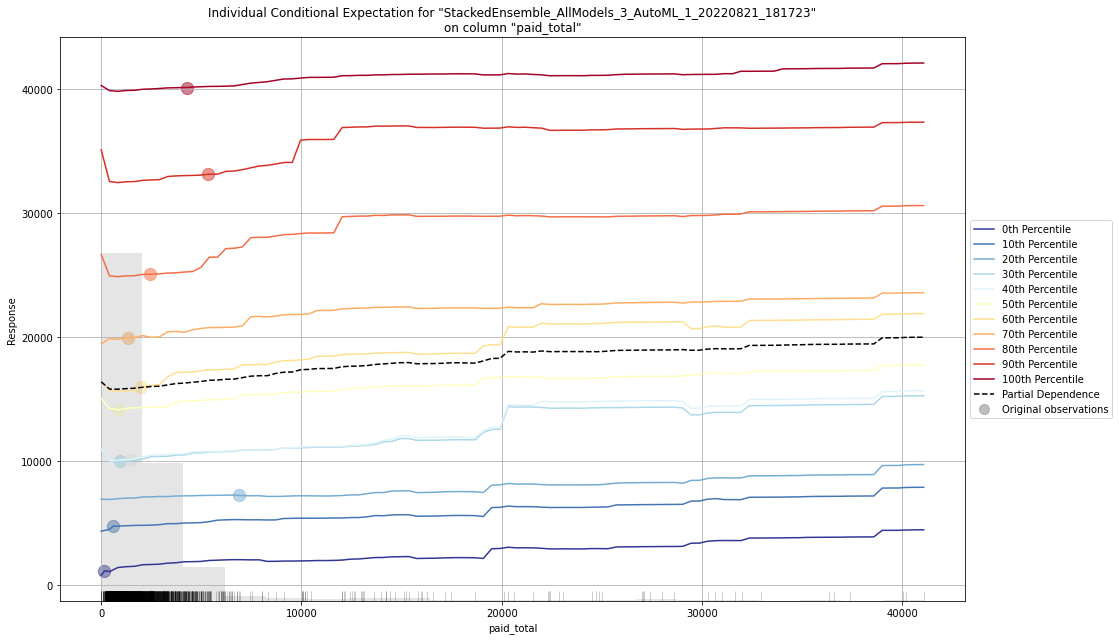

In [20]:
exa = aml.explain(test)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

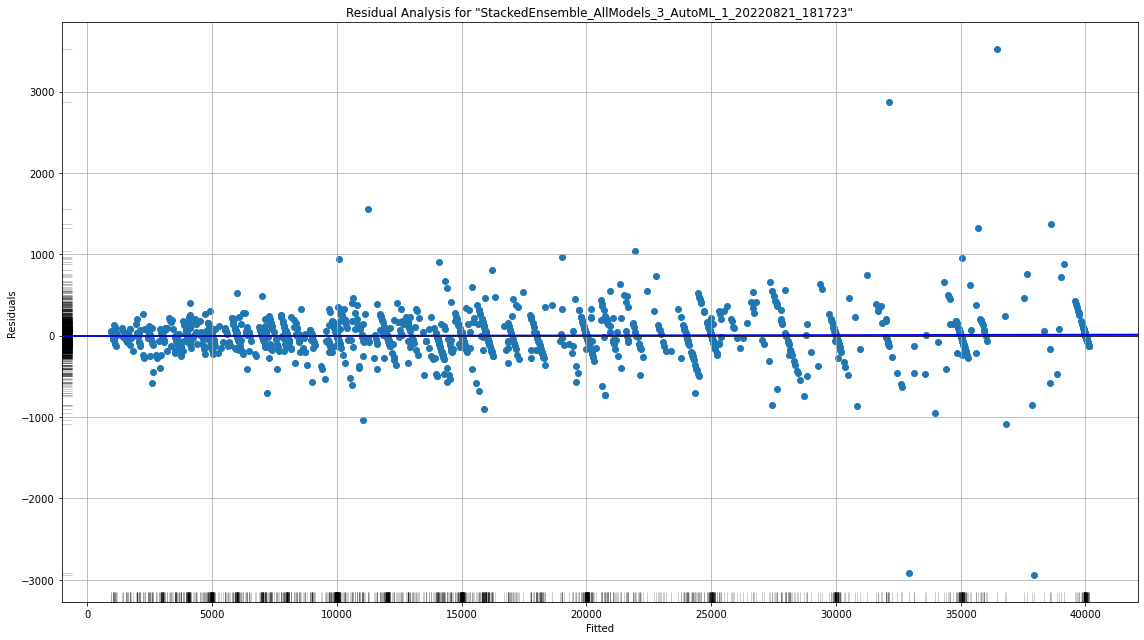

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

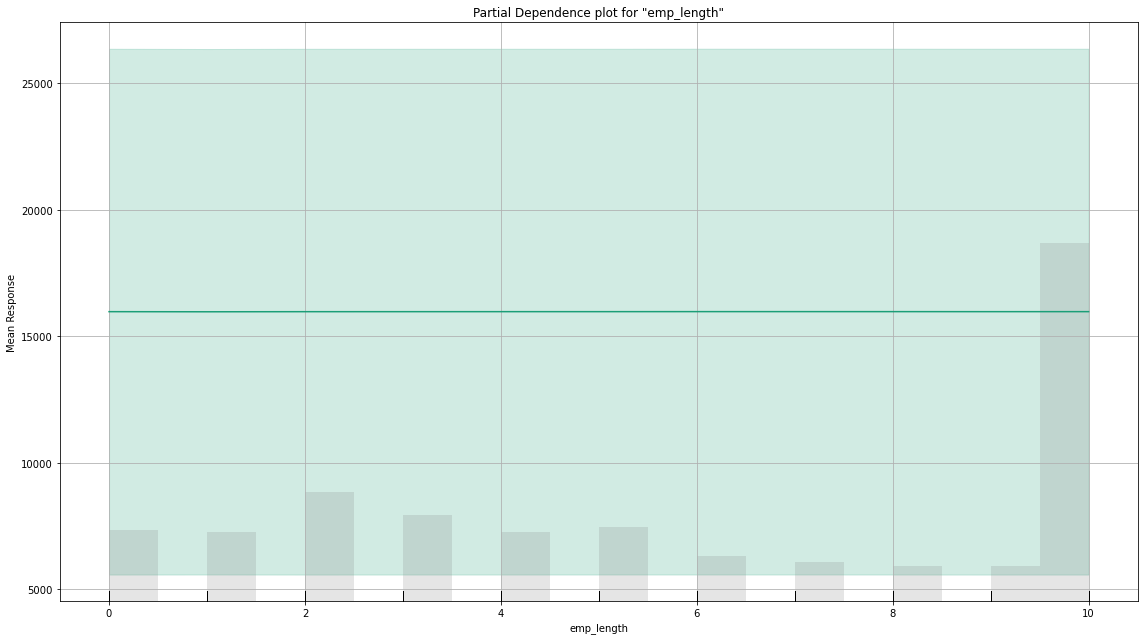

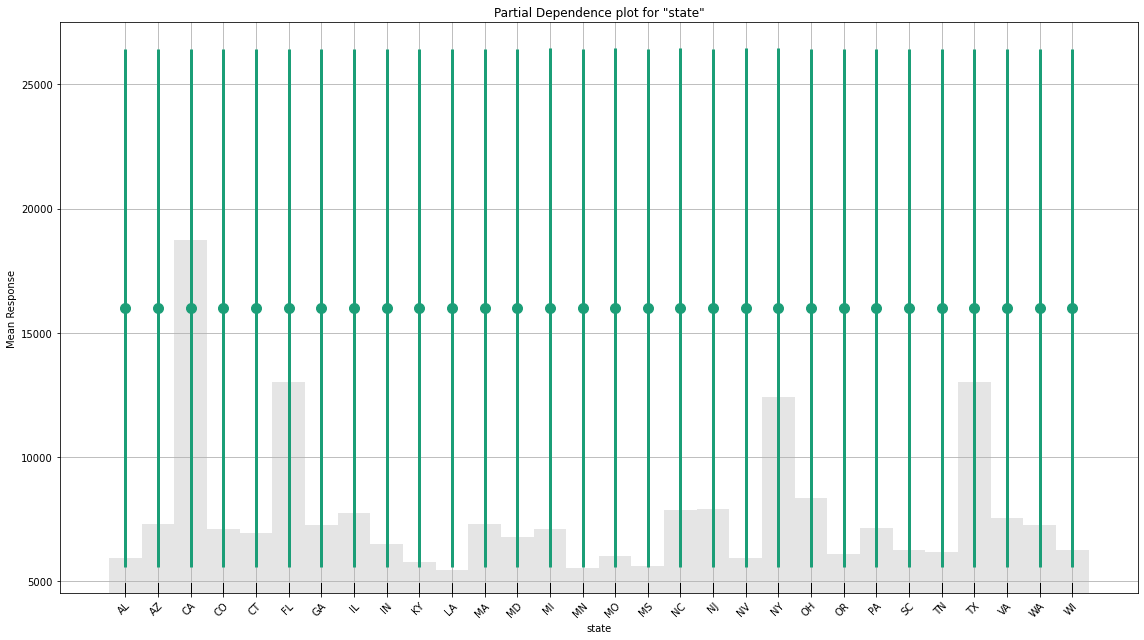

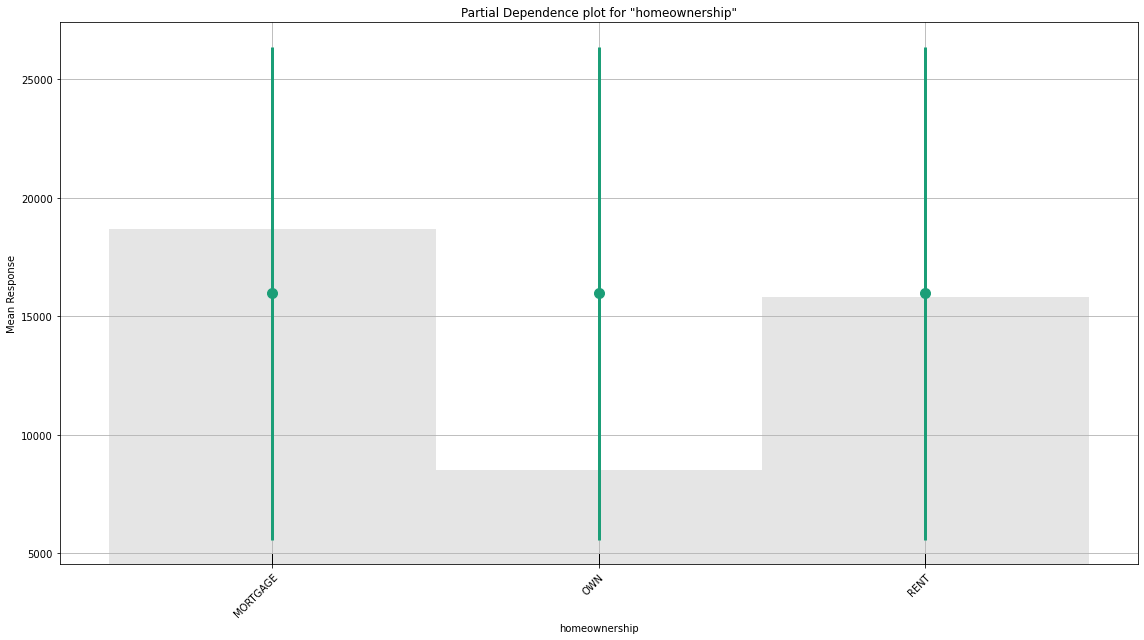

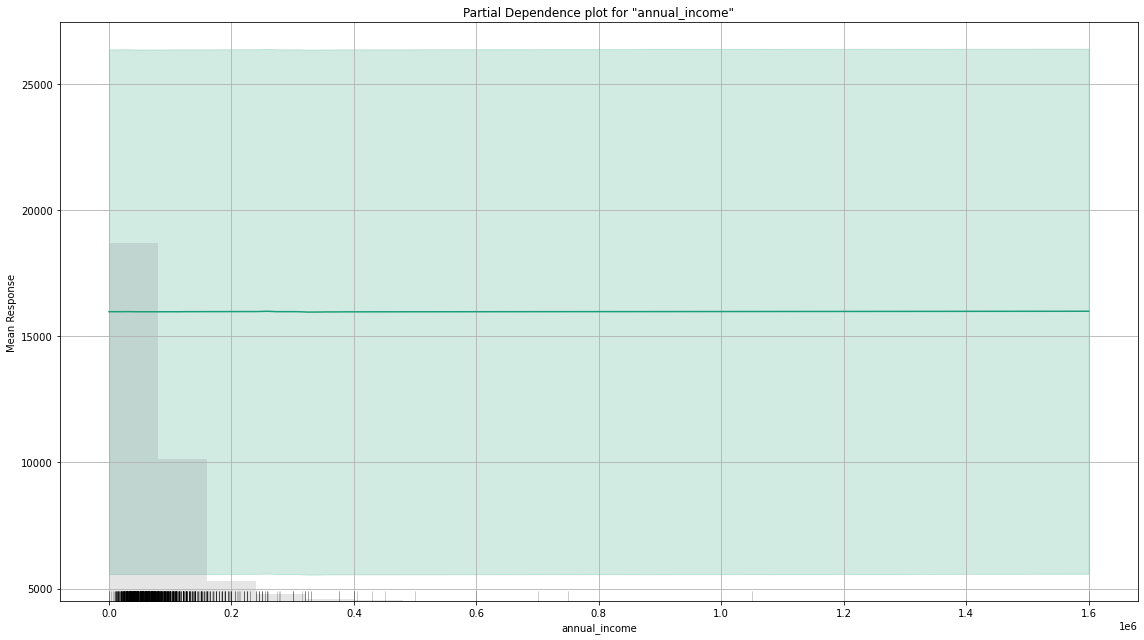

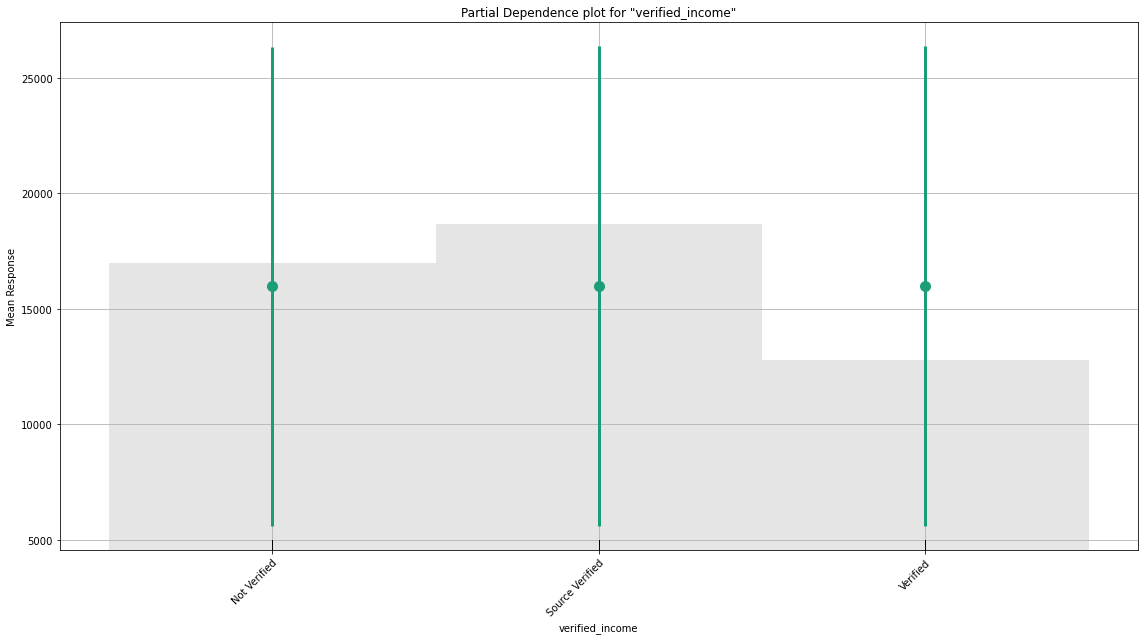

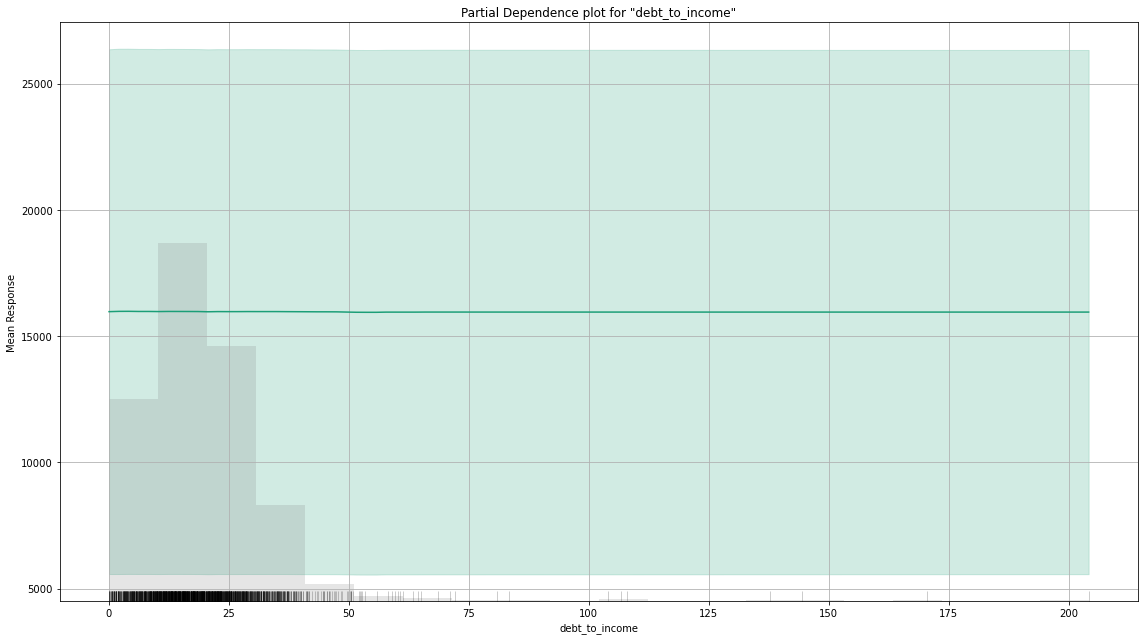

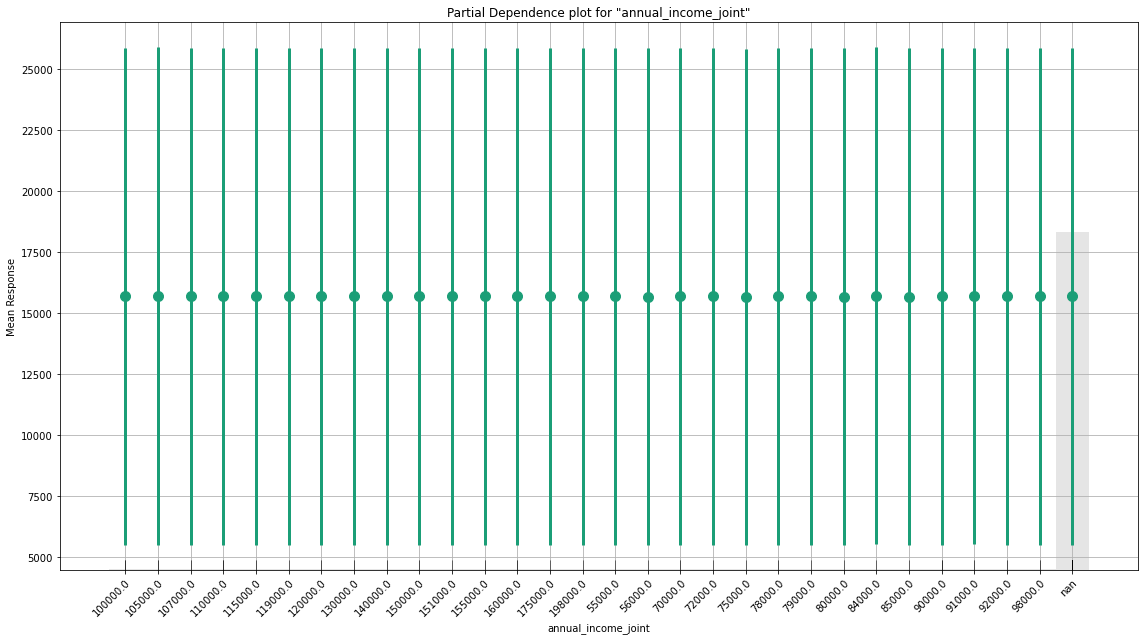

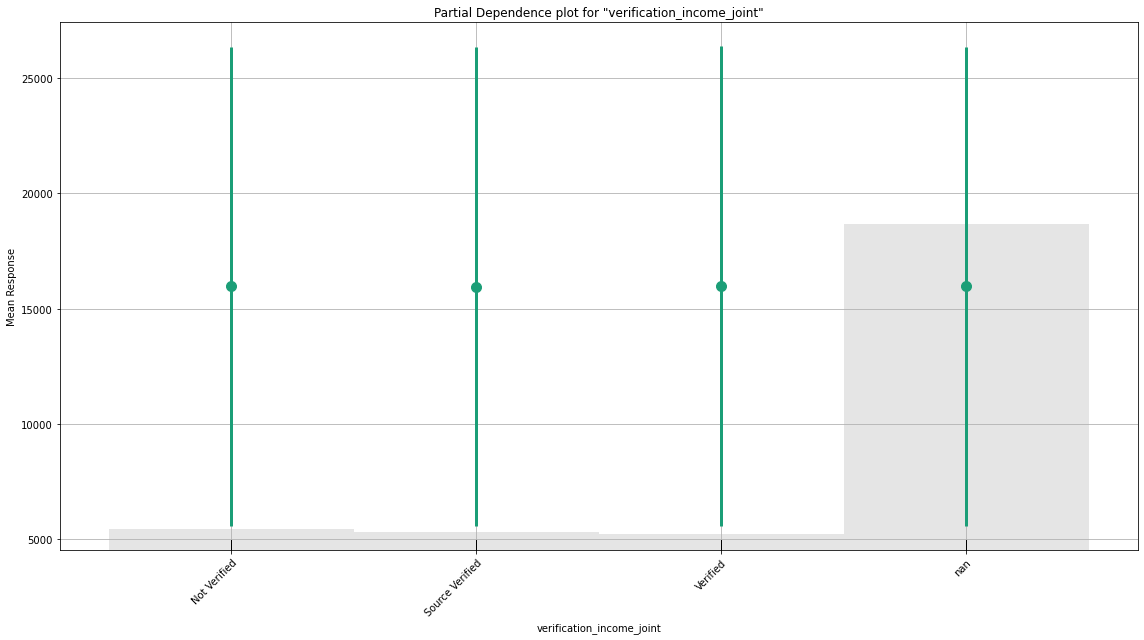

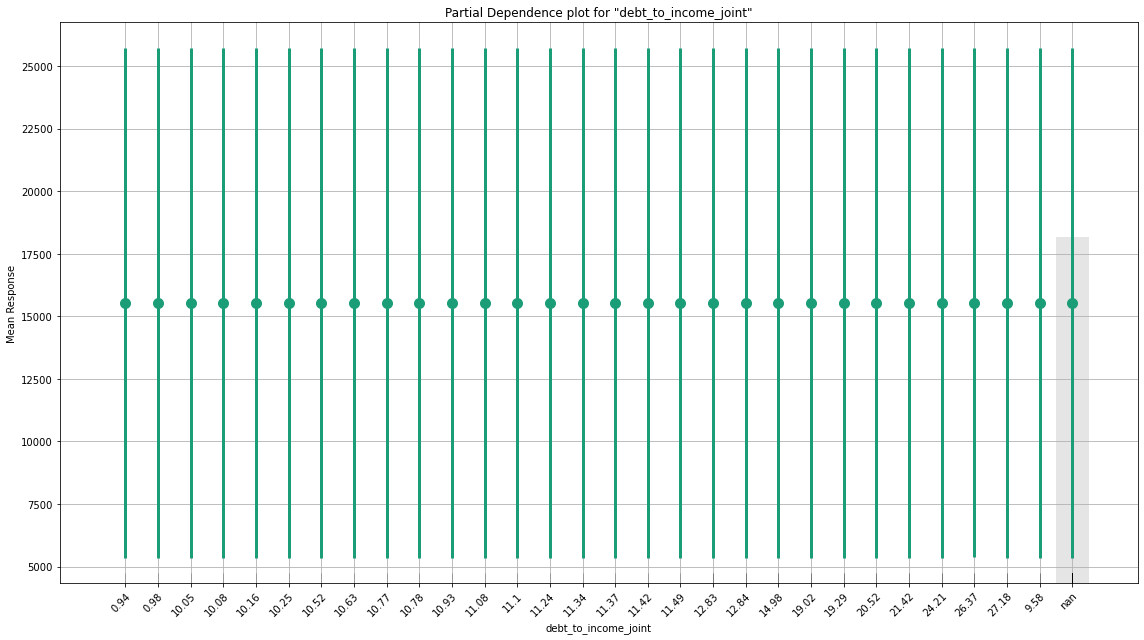

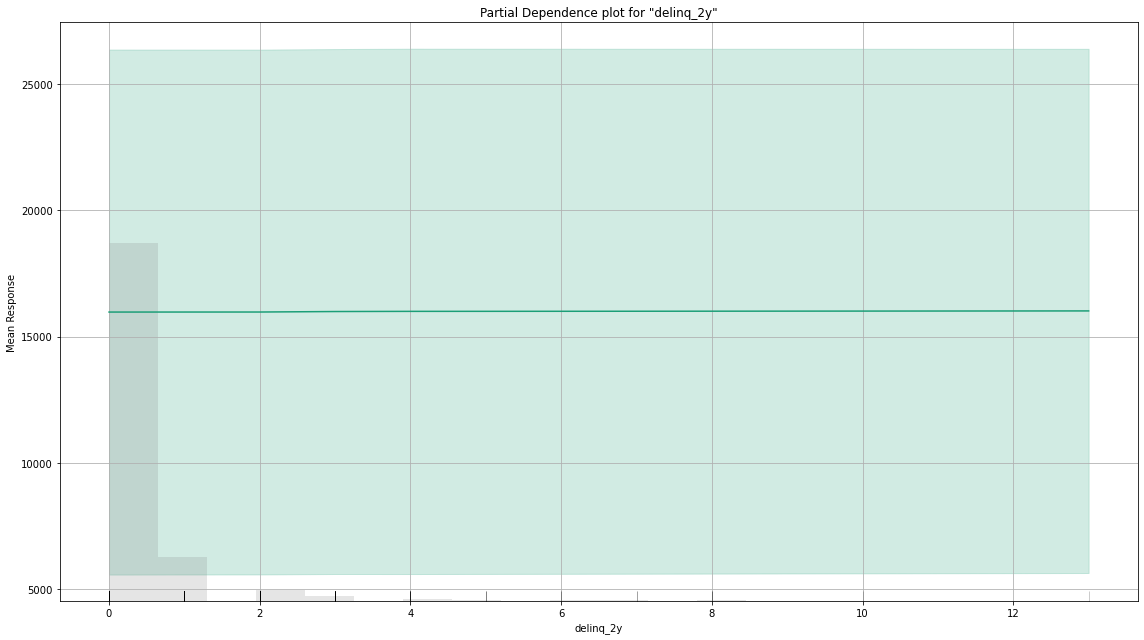

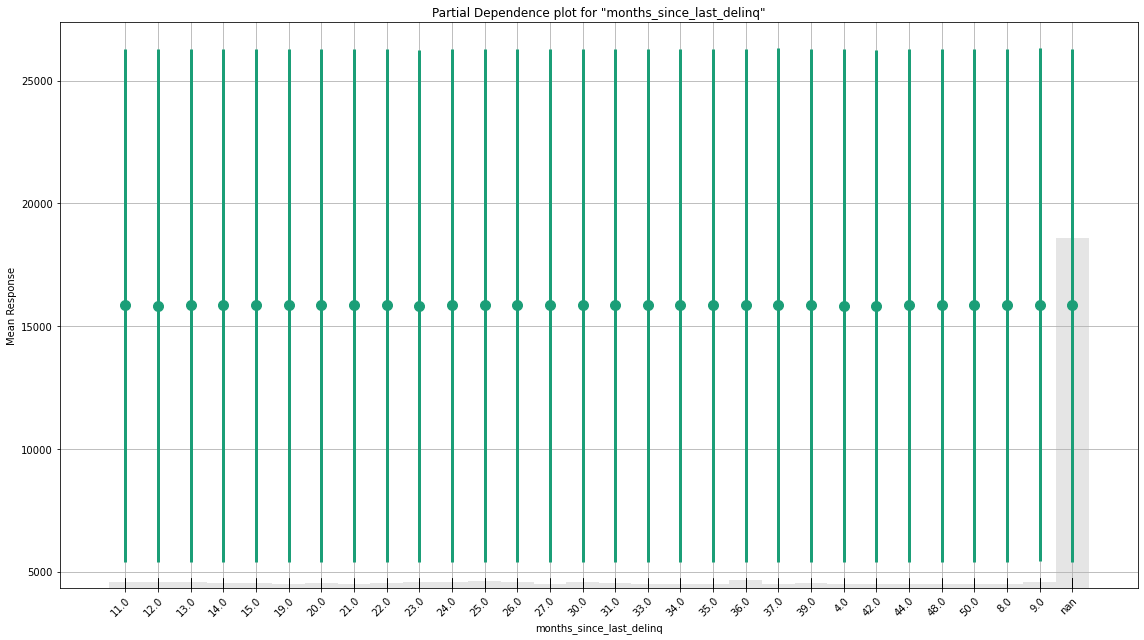

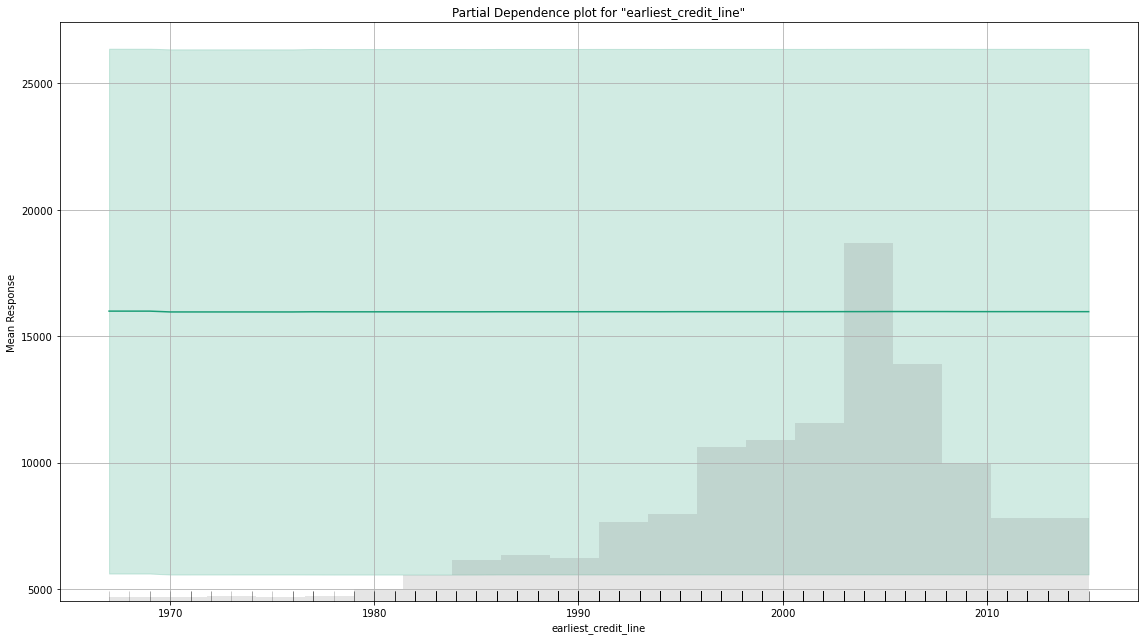

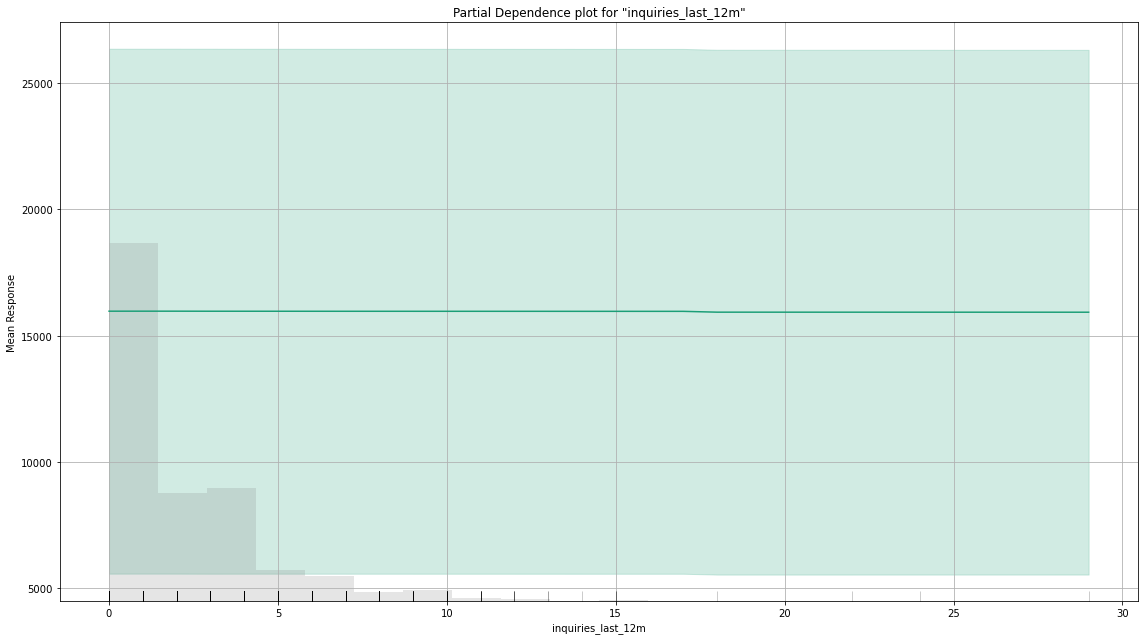

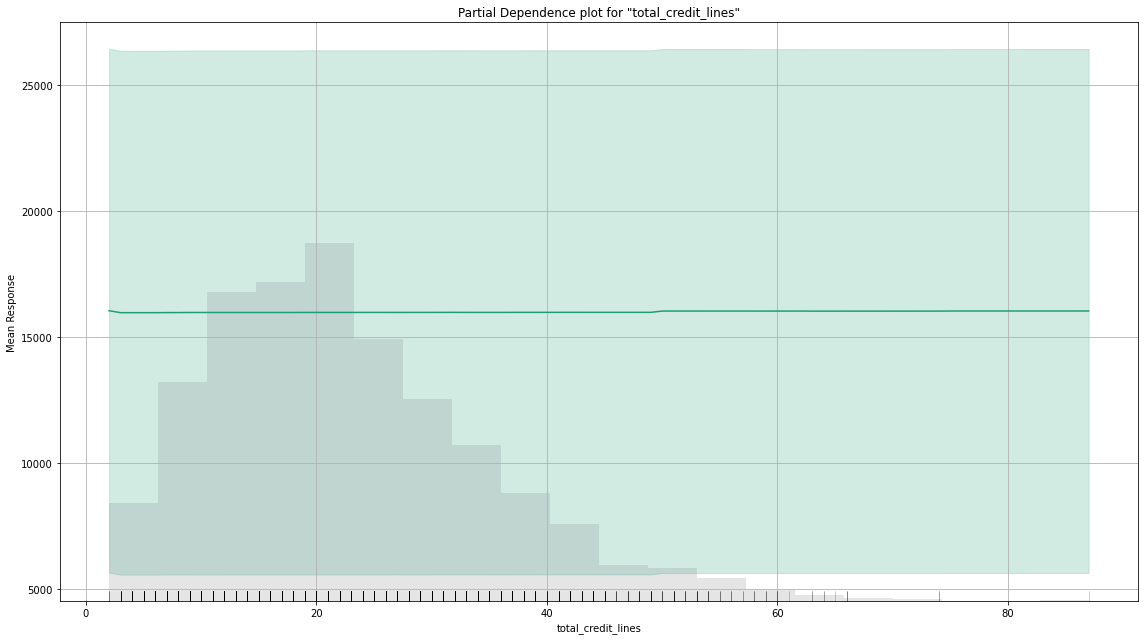

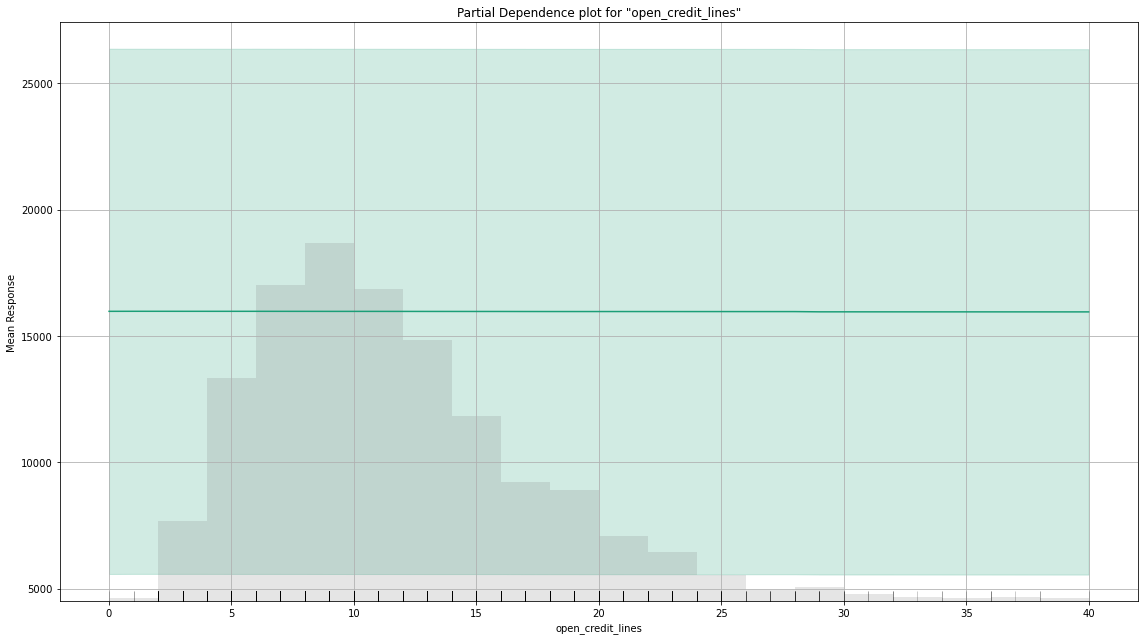

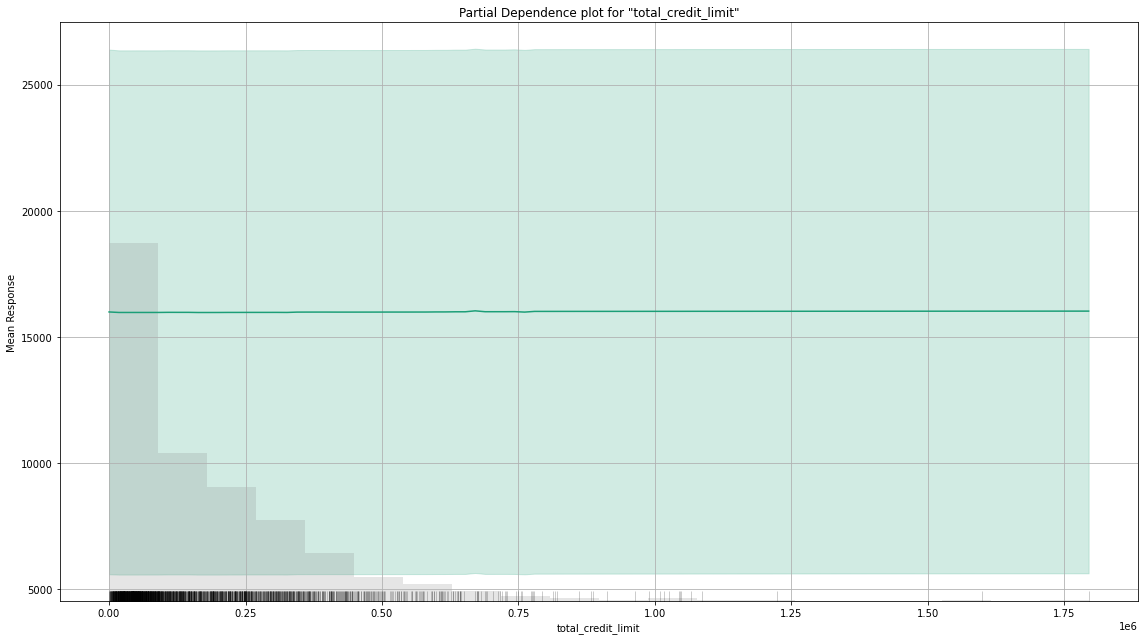

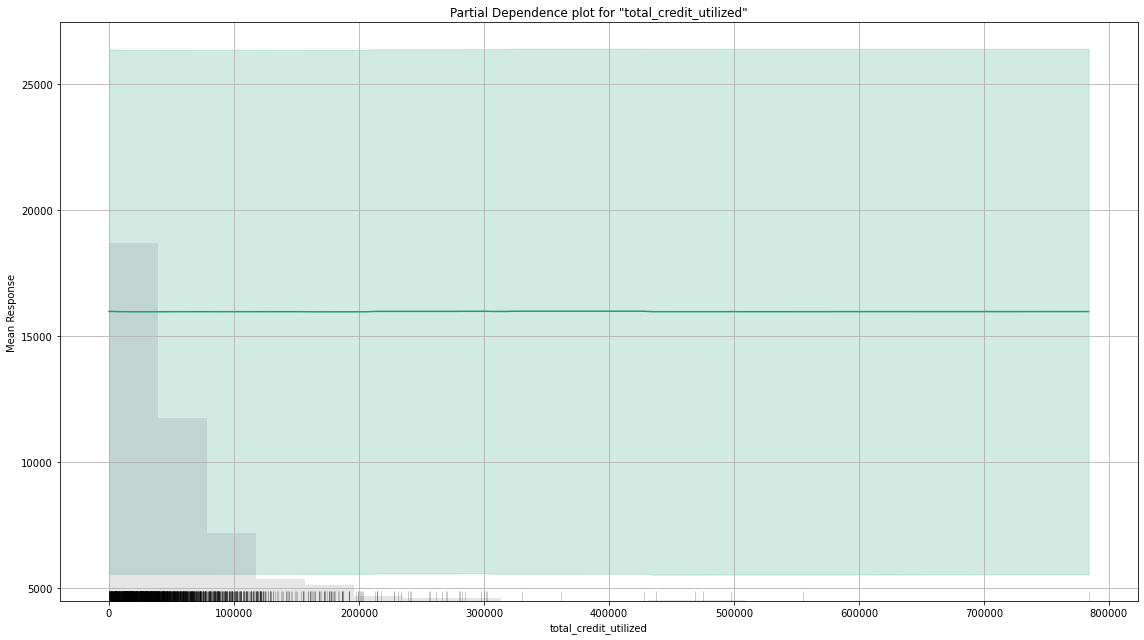

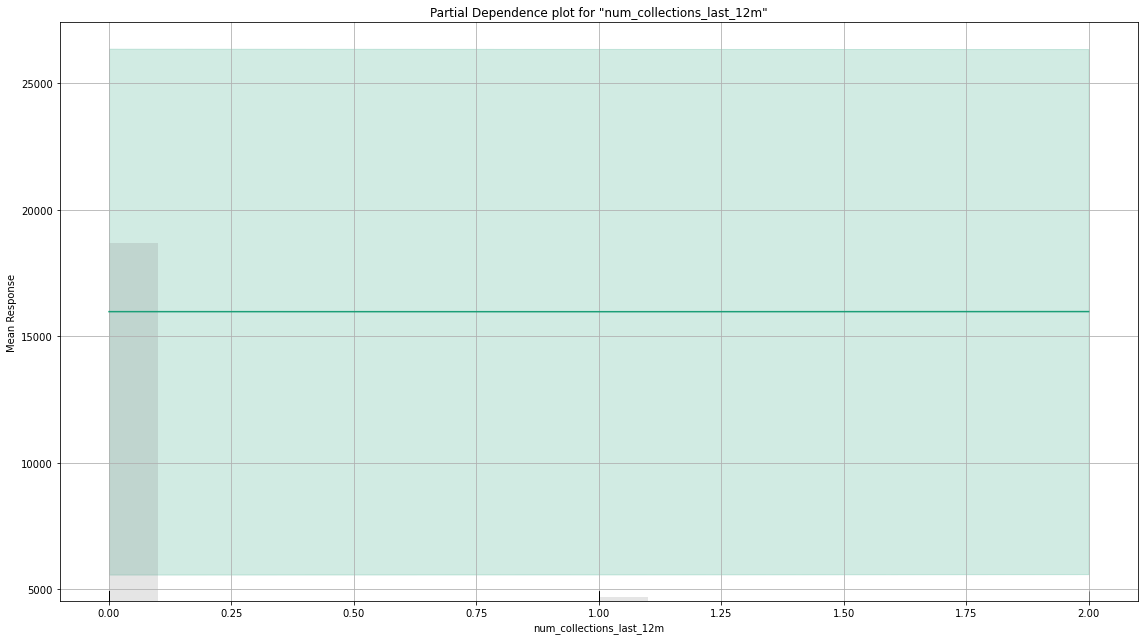

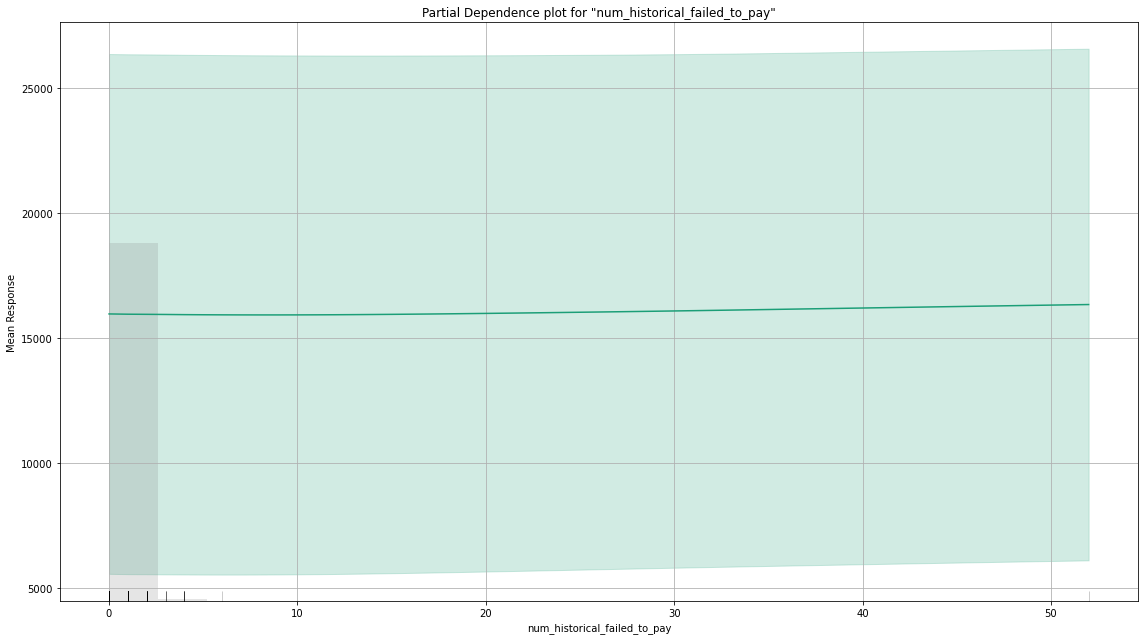

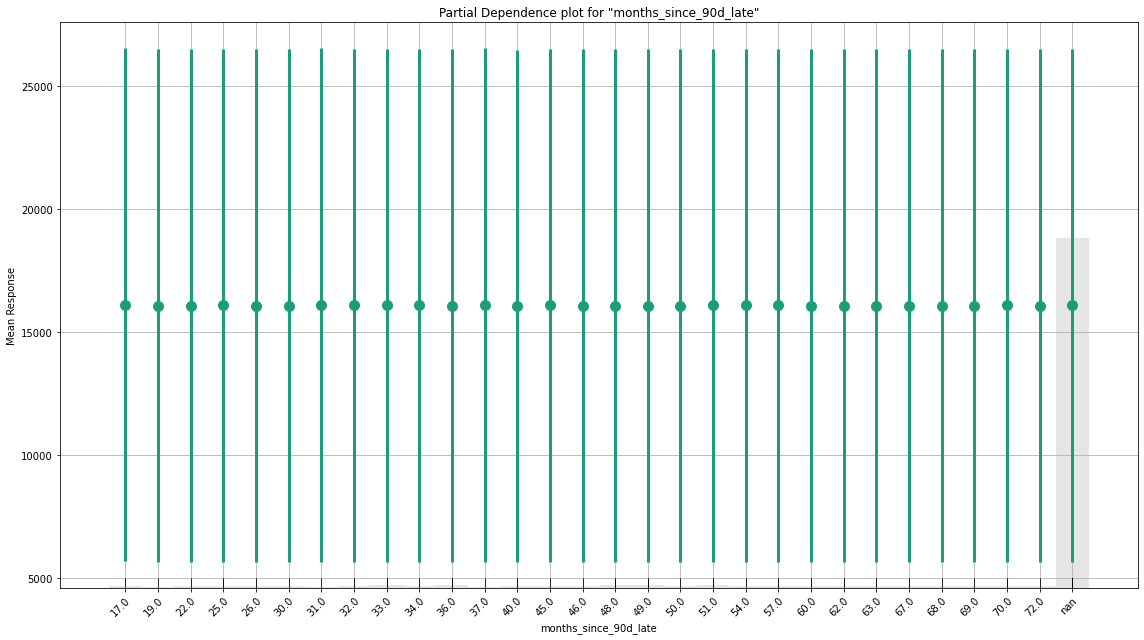

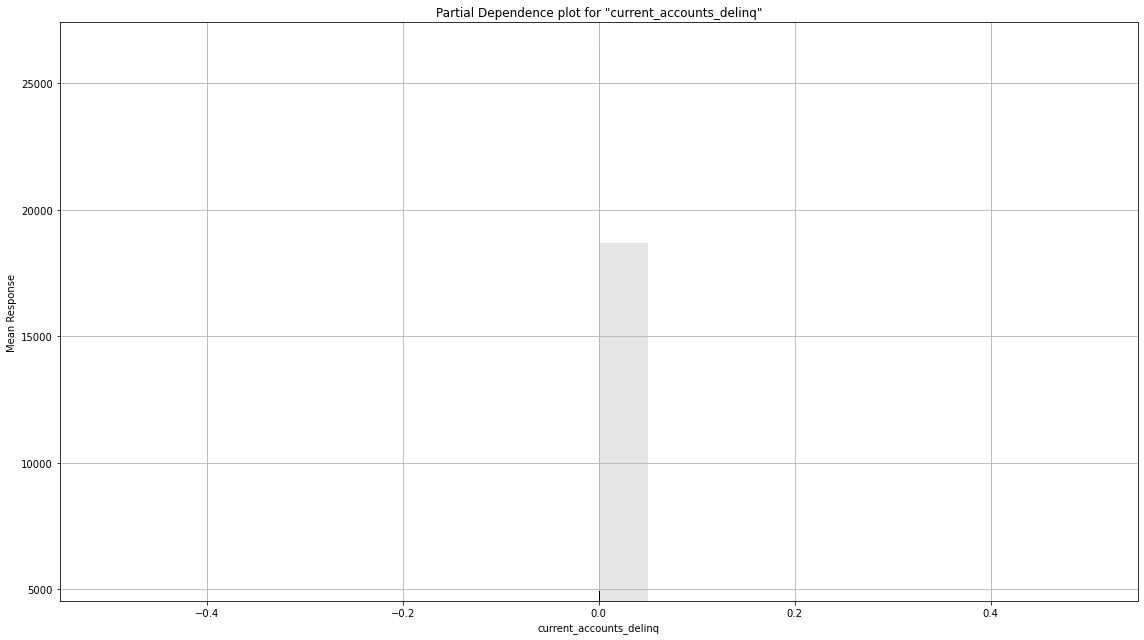

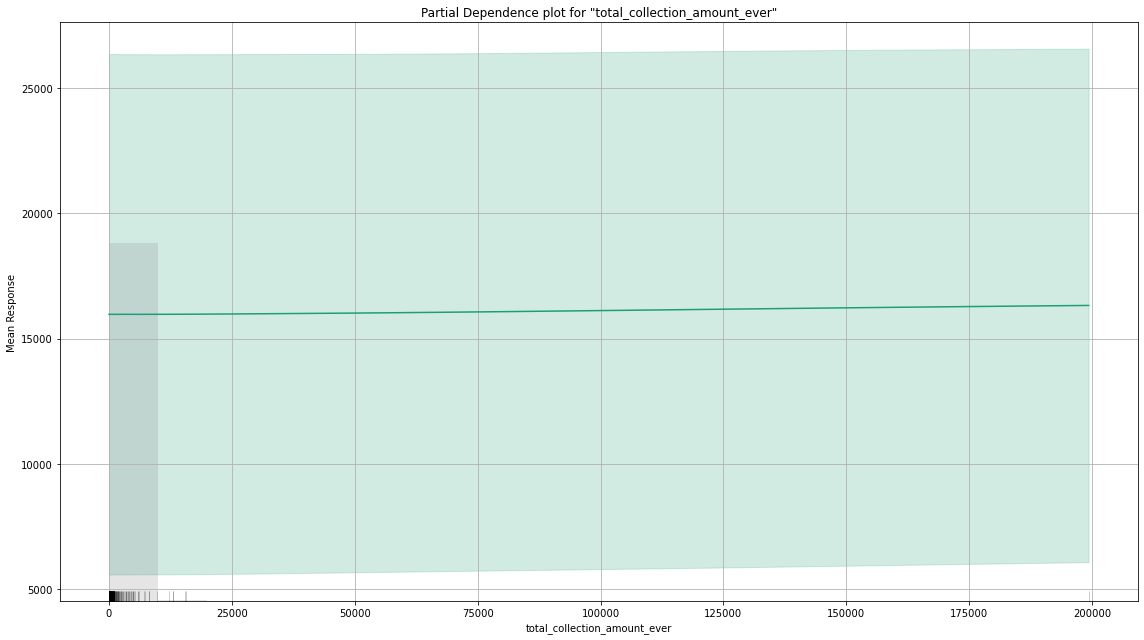

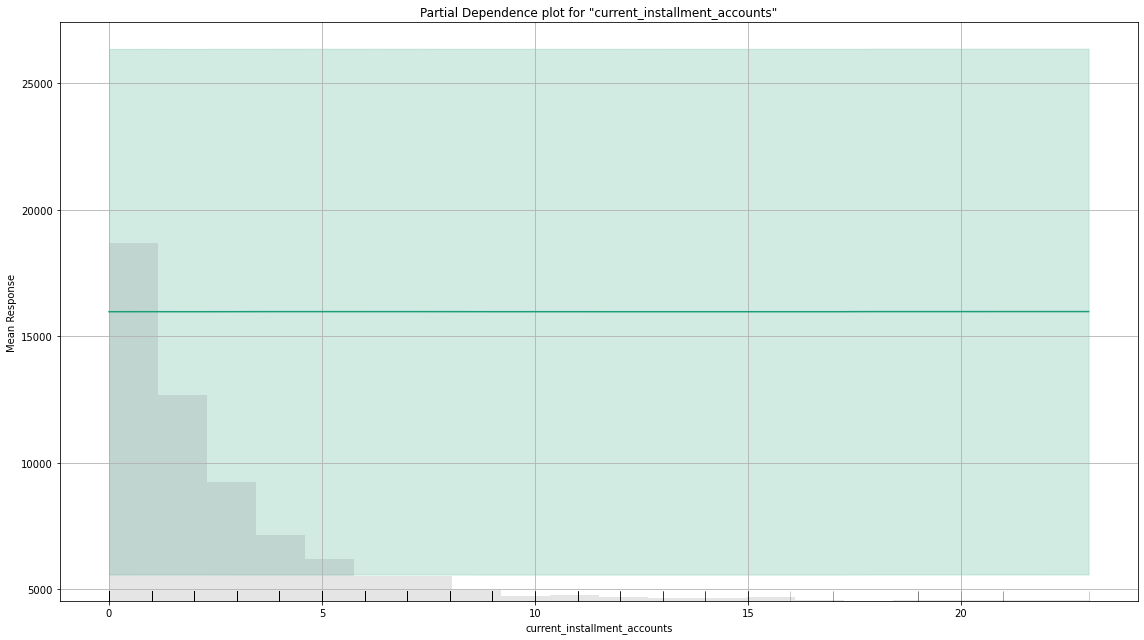

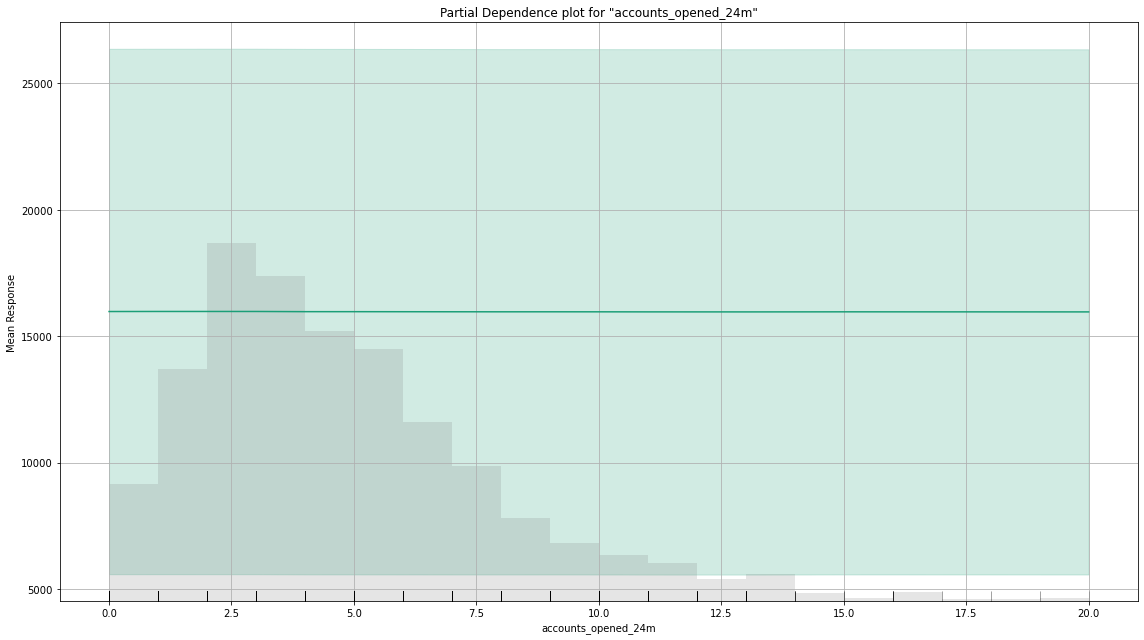

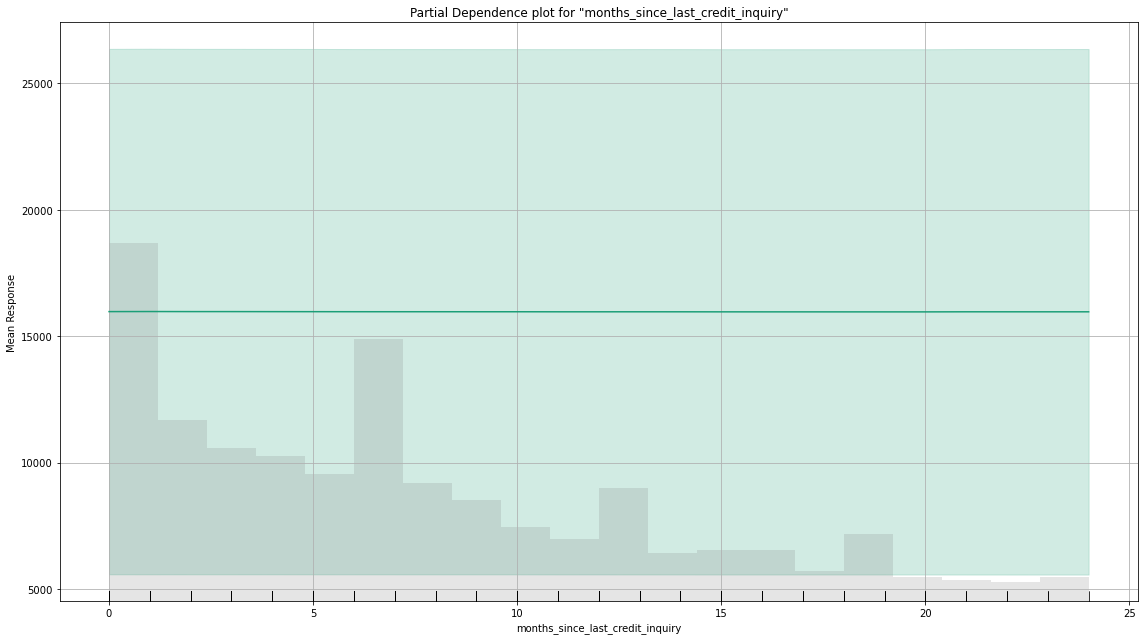

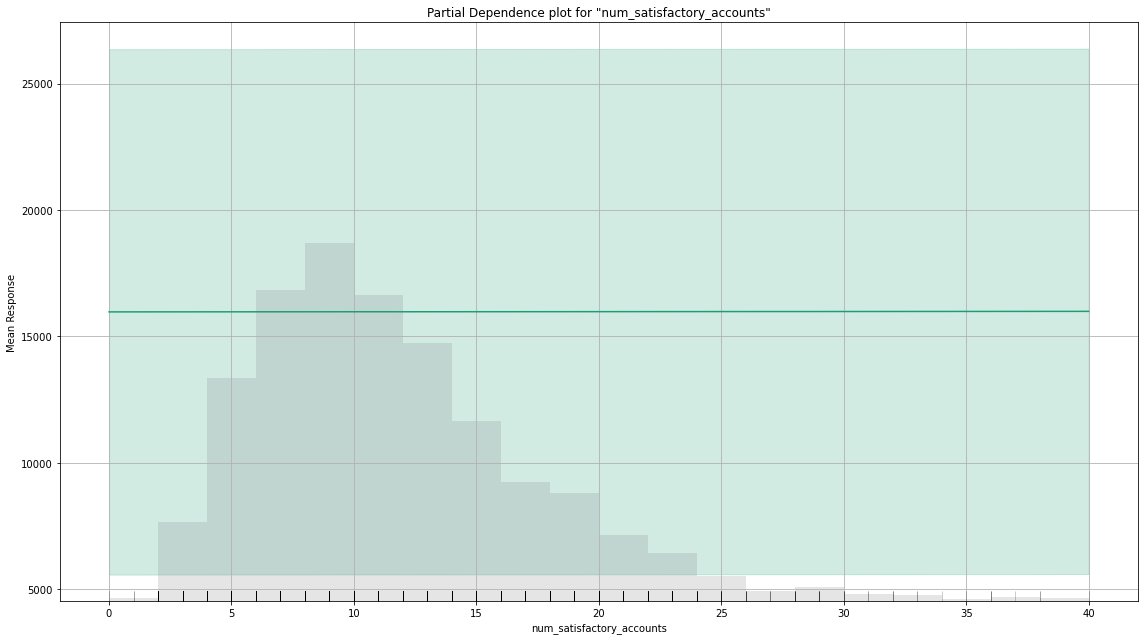

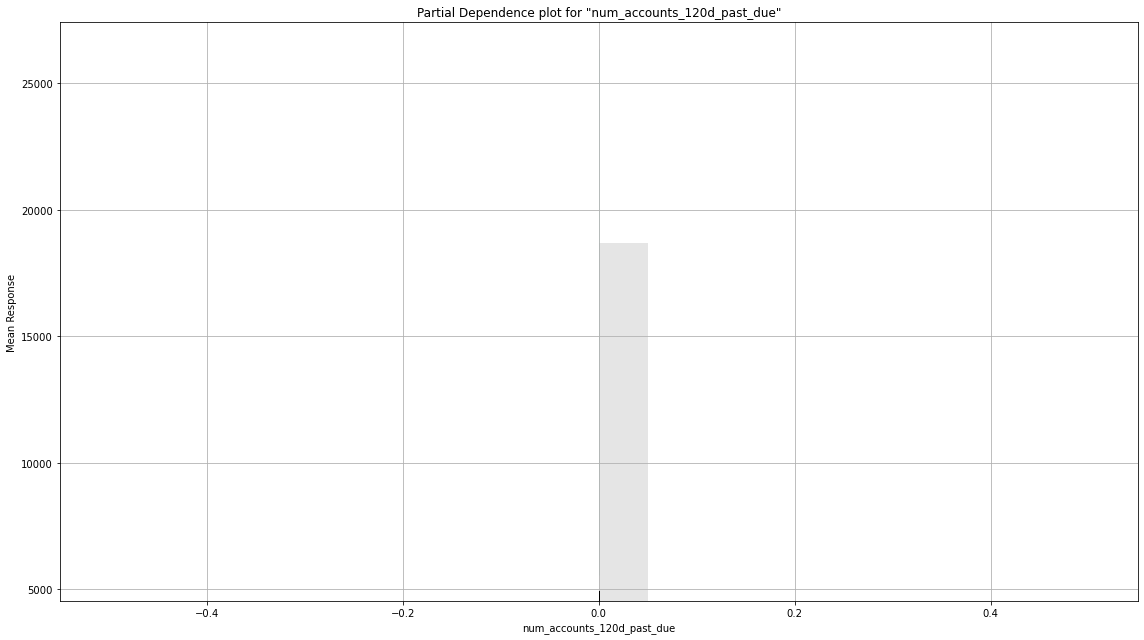

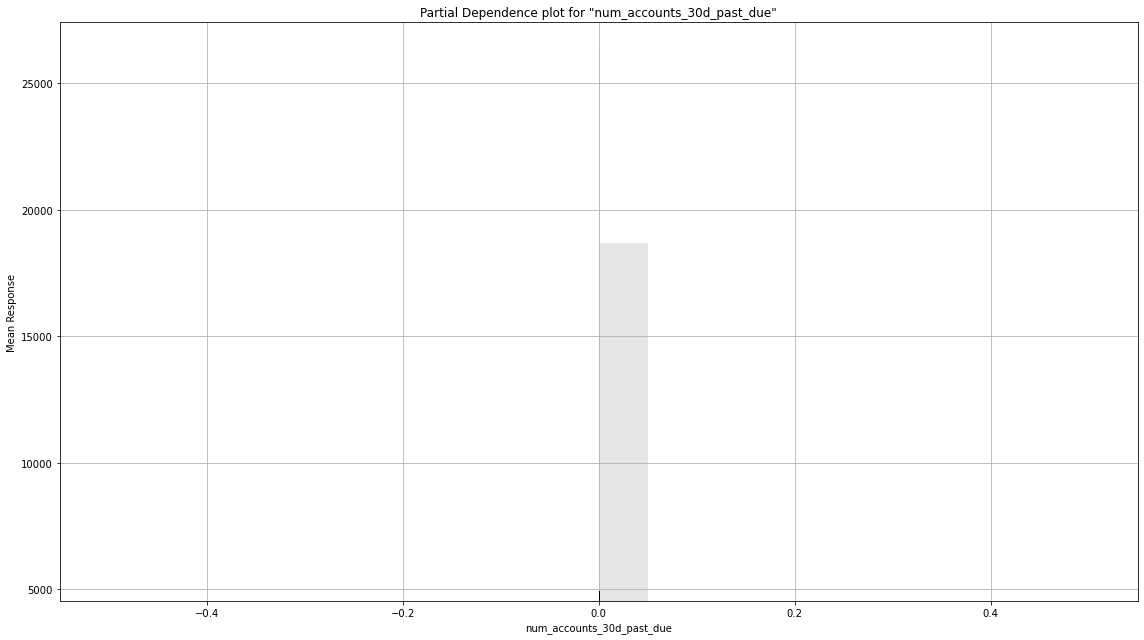

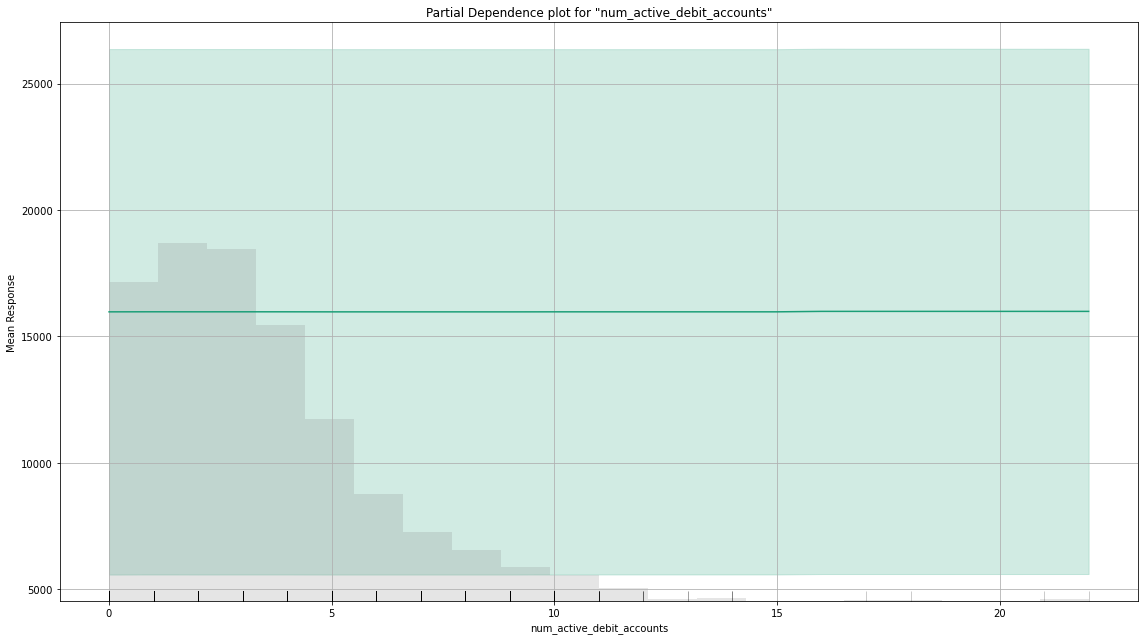

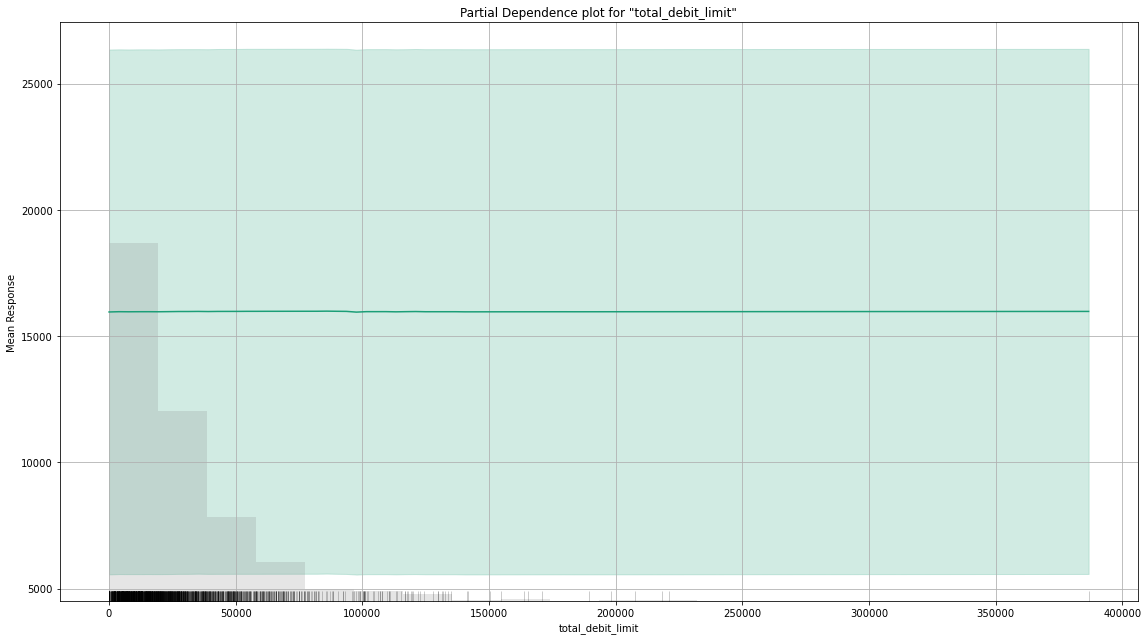

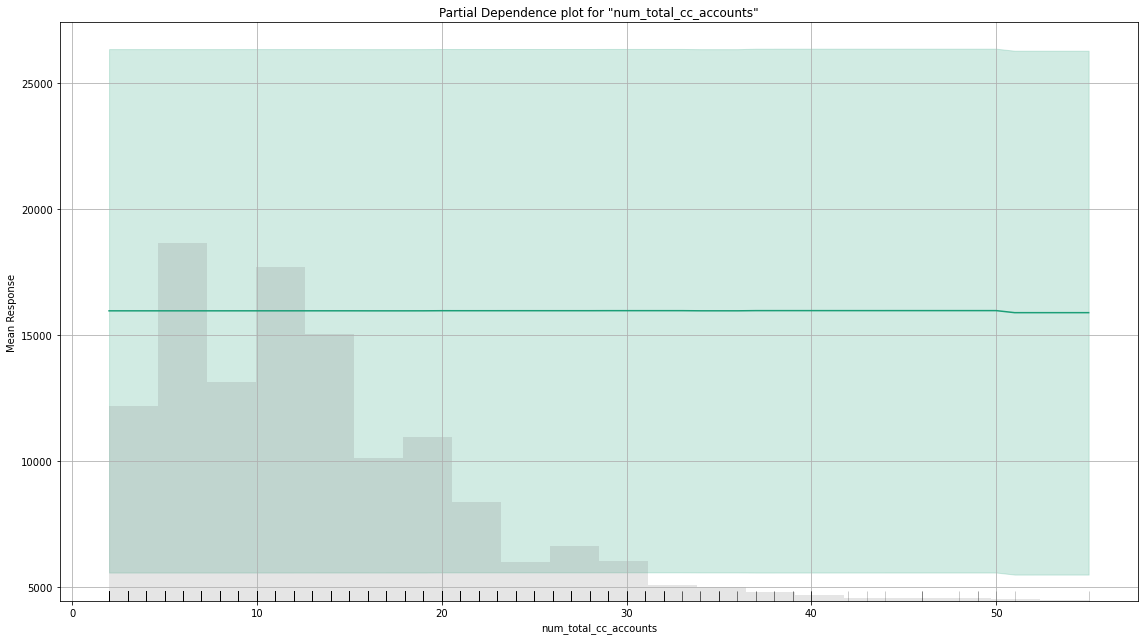

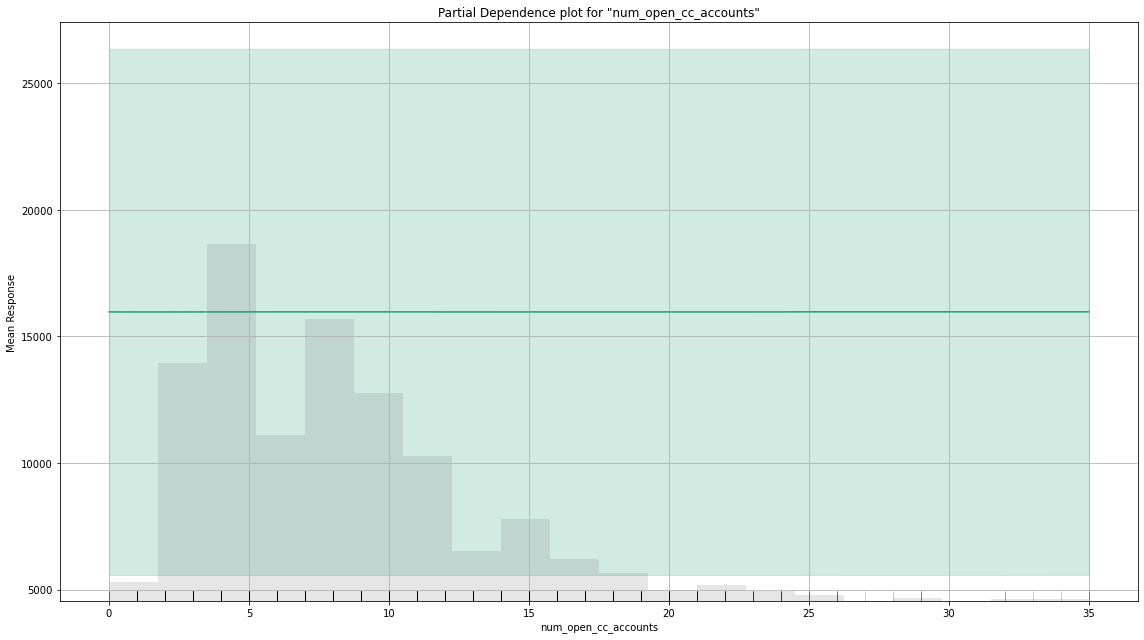

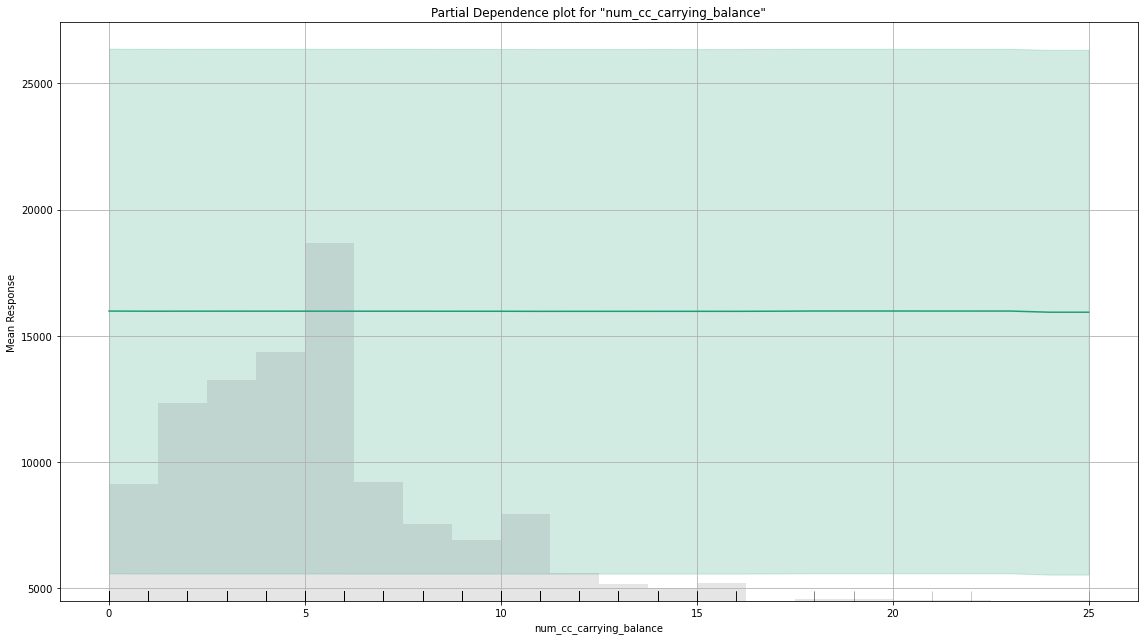

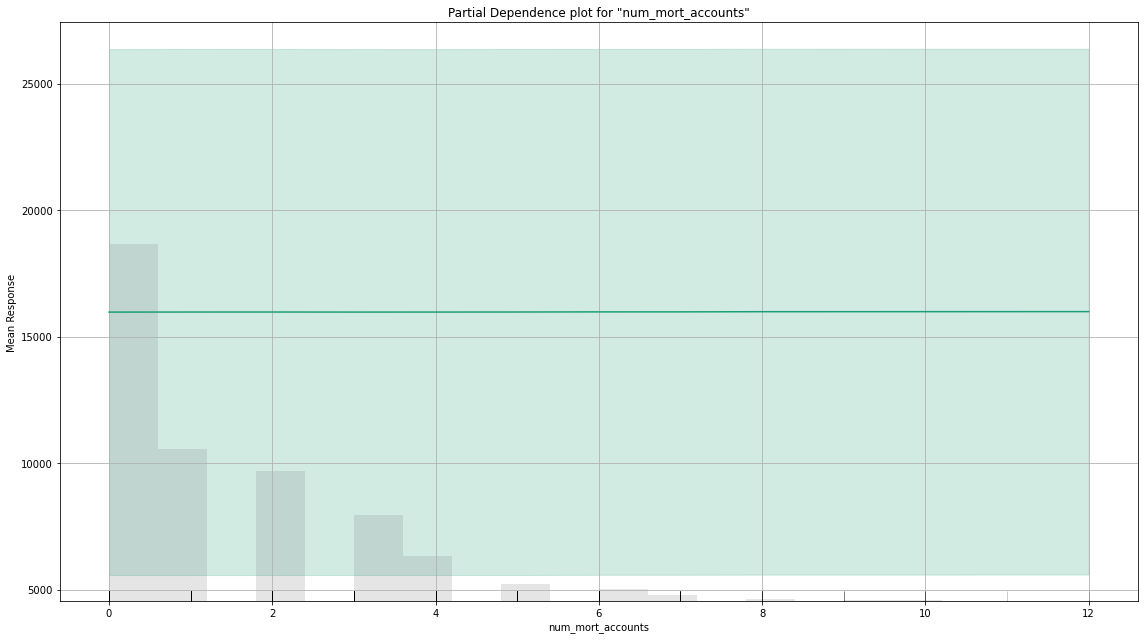

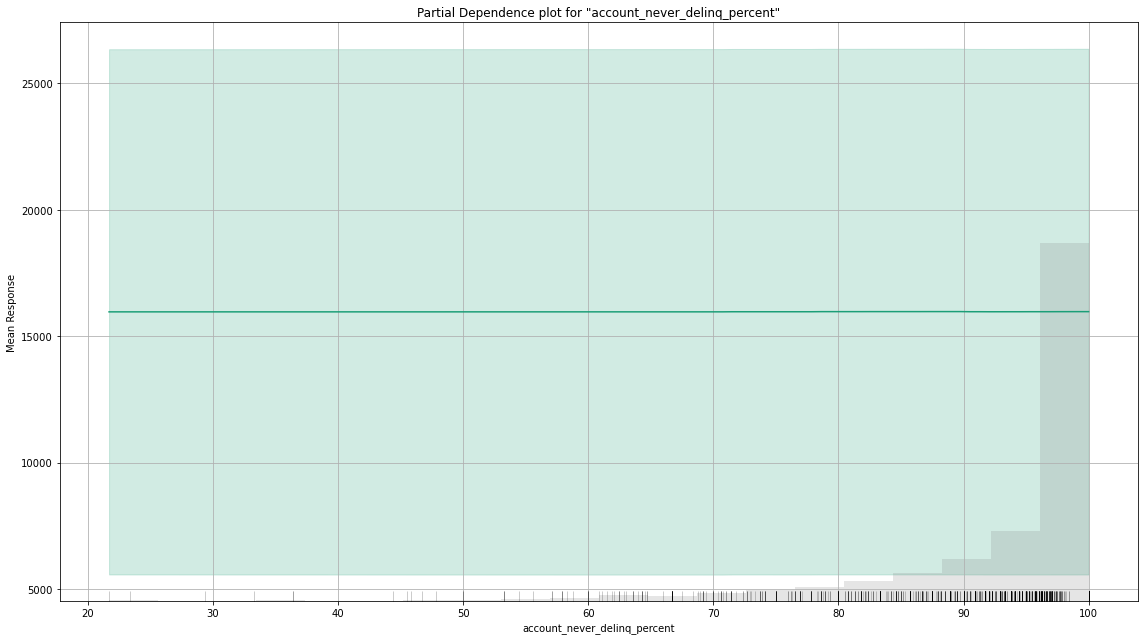

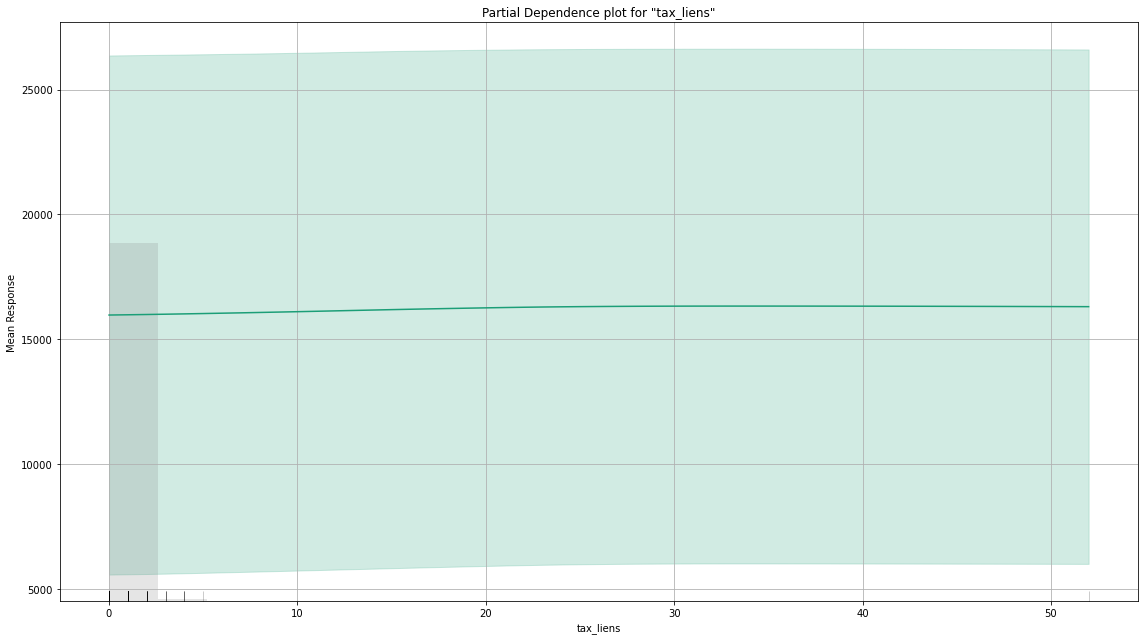

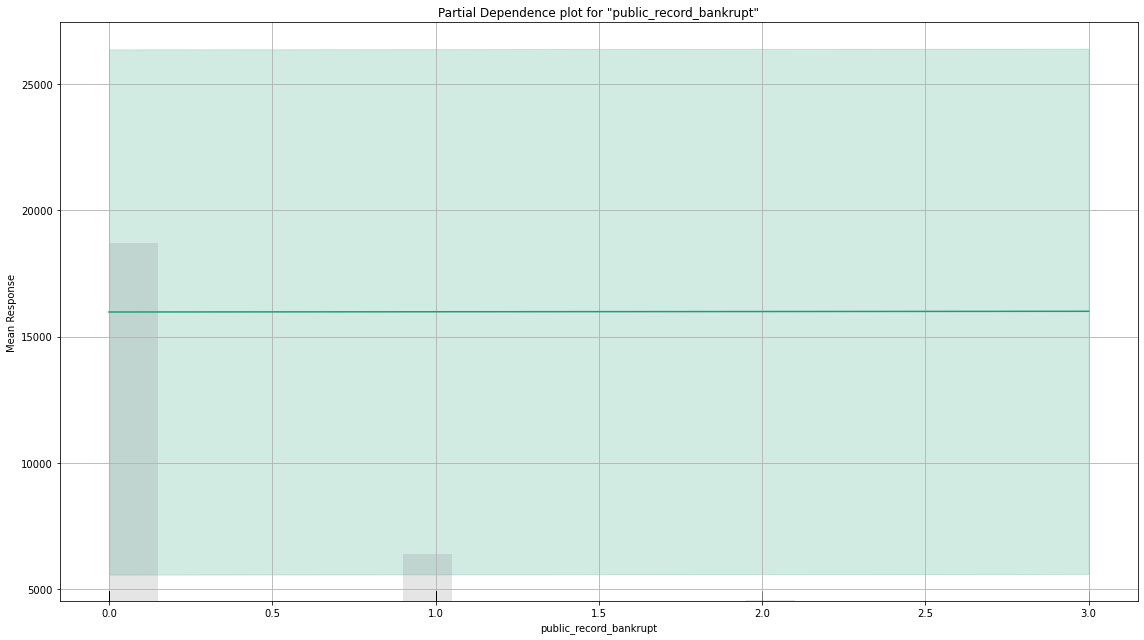

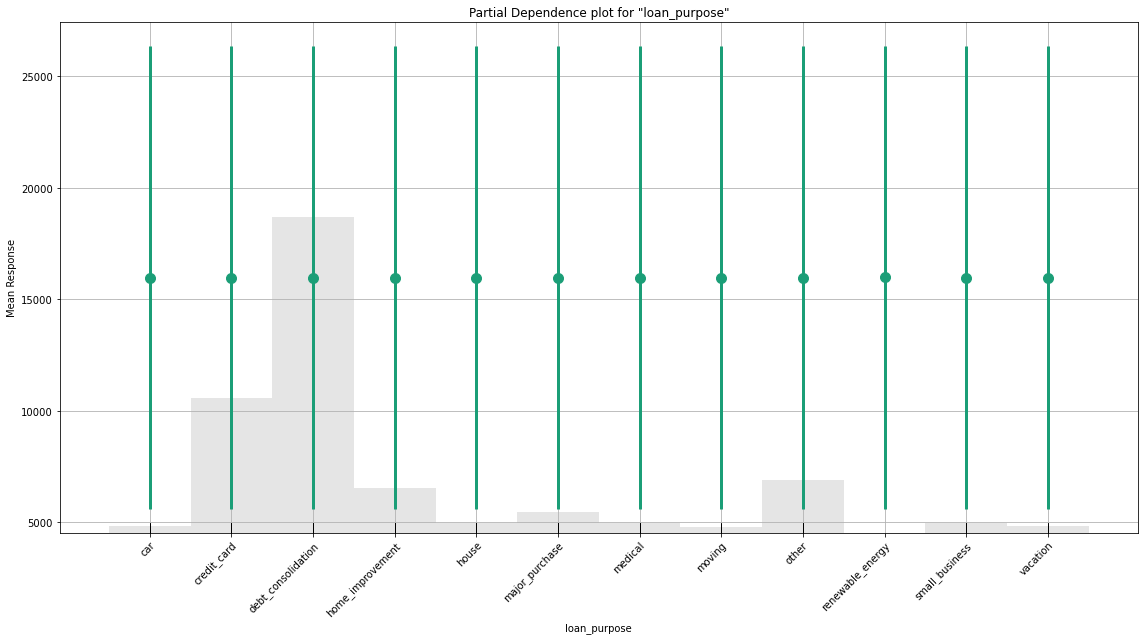

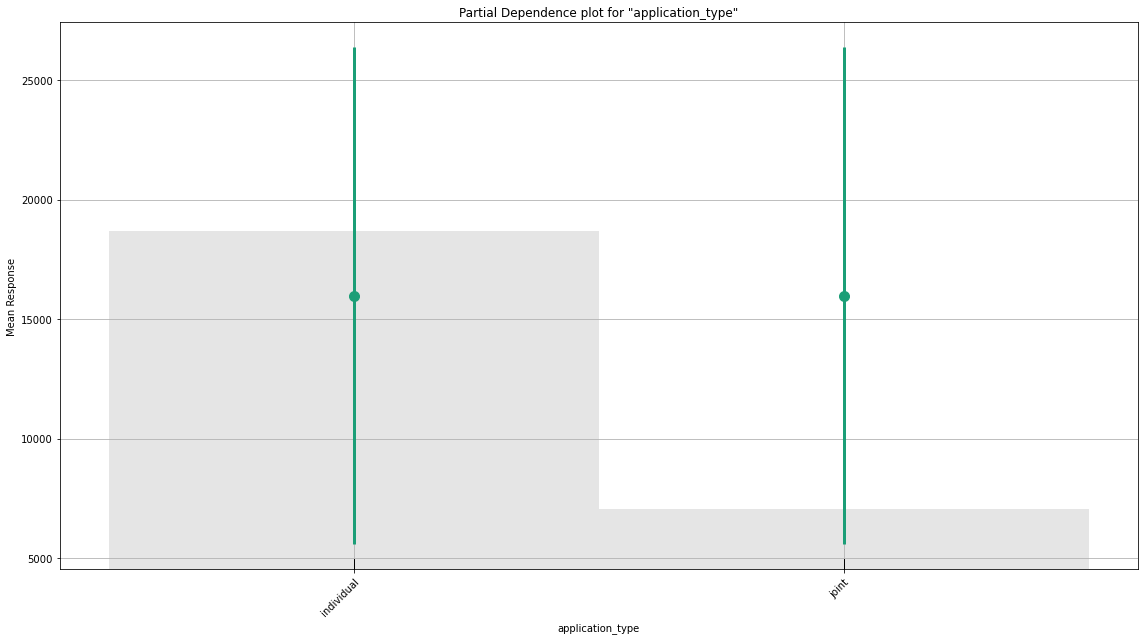

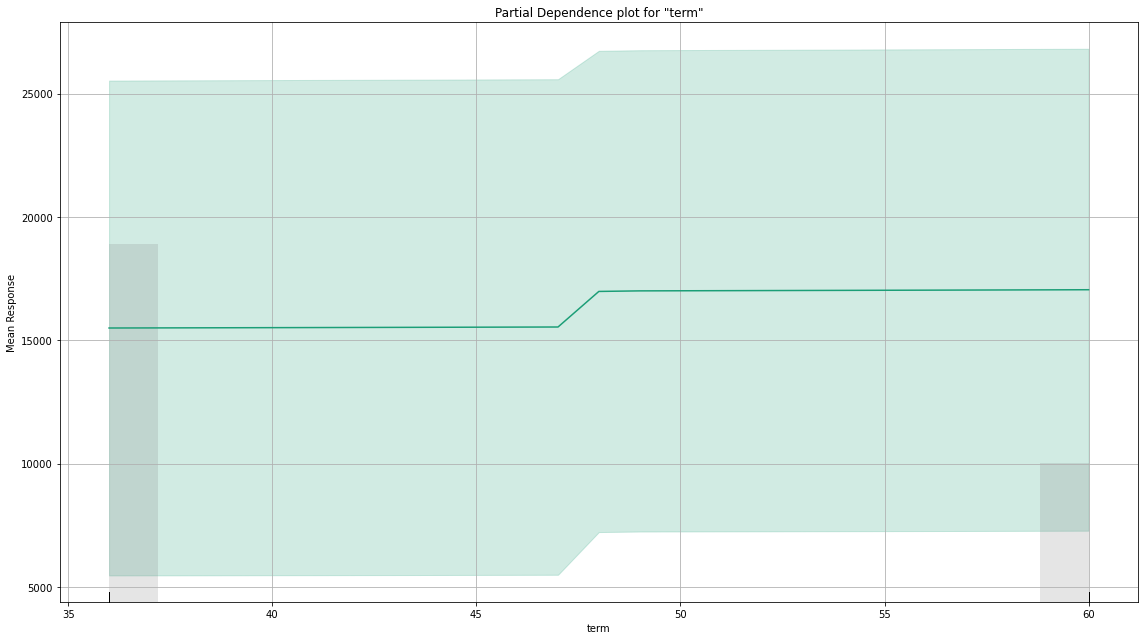

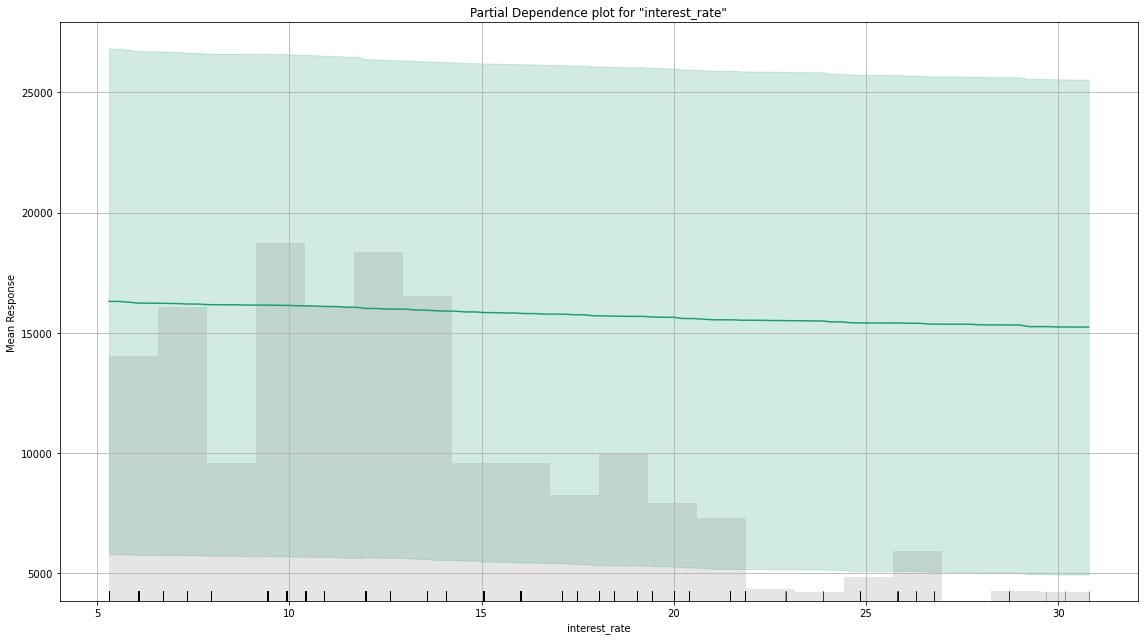

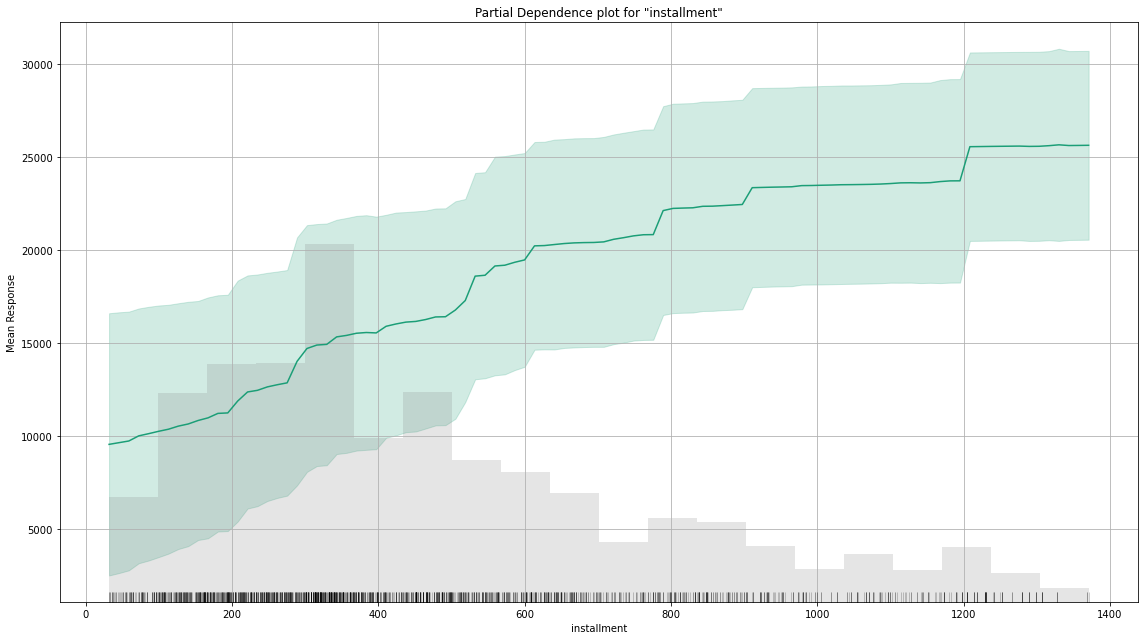

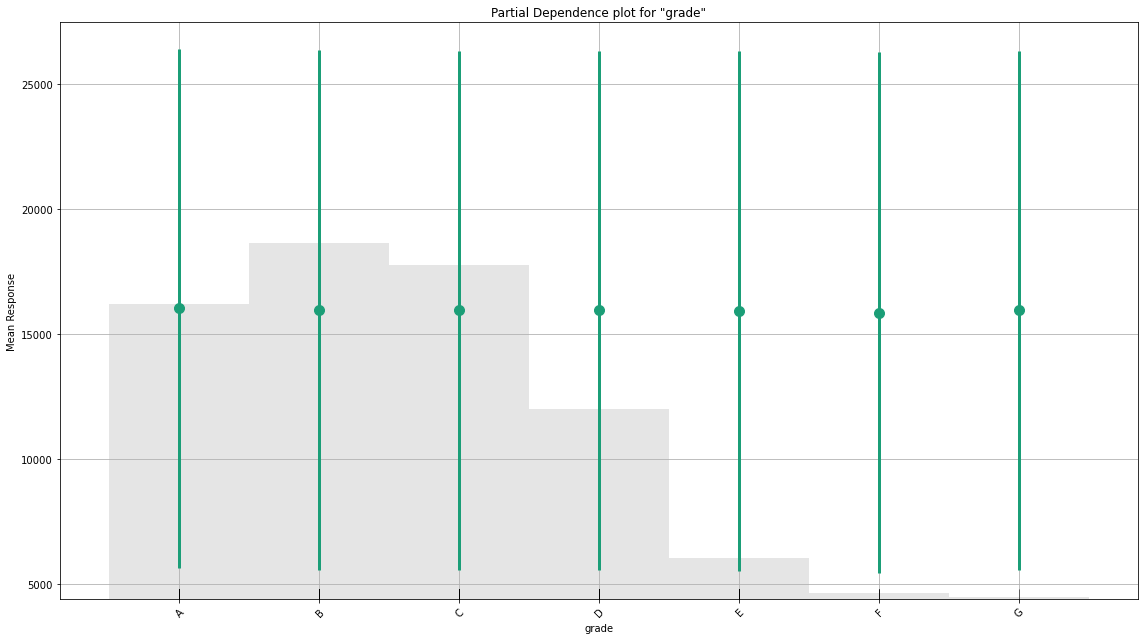

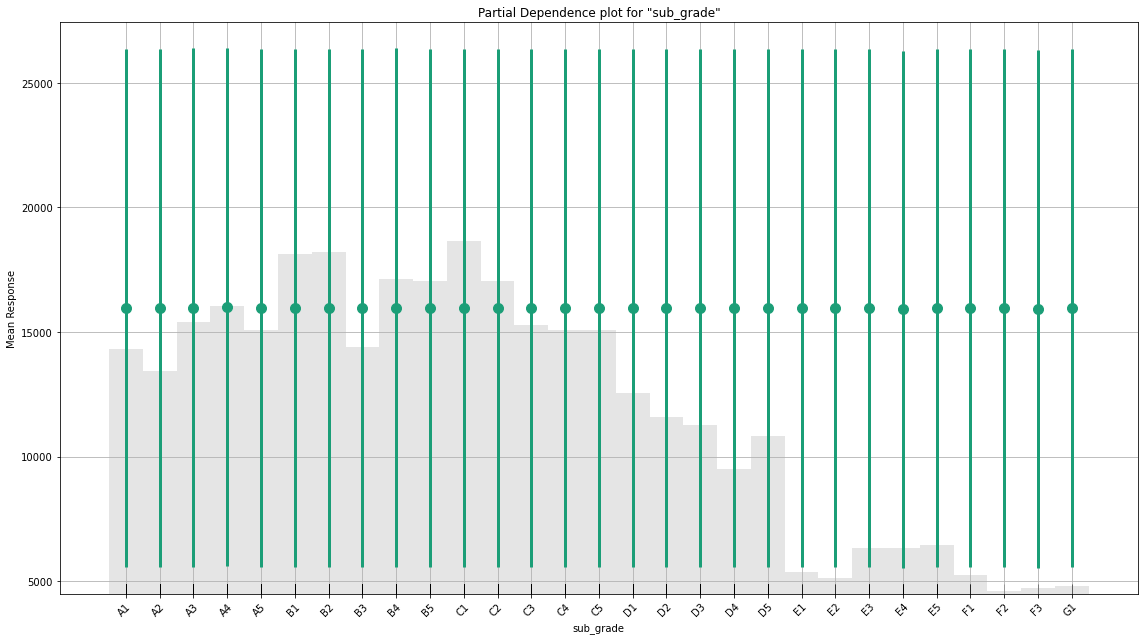

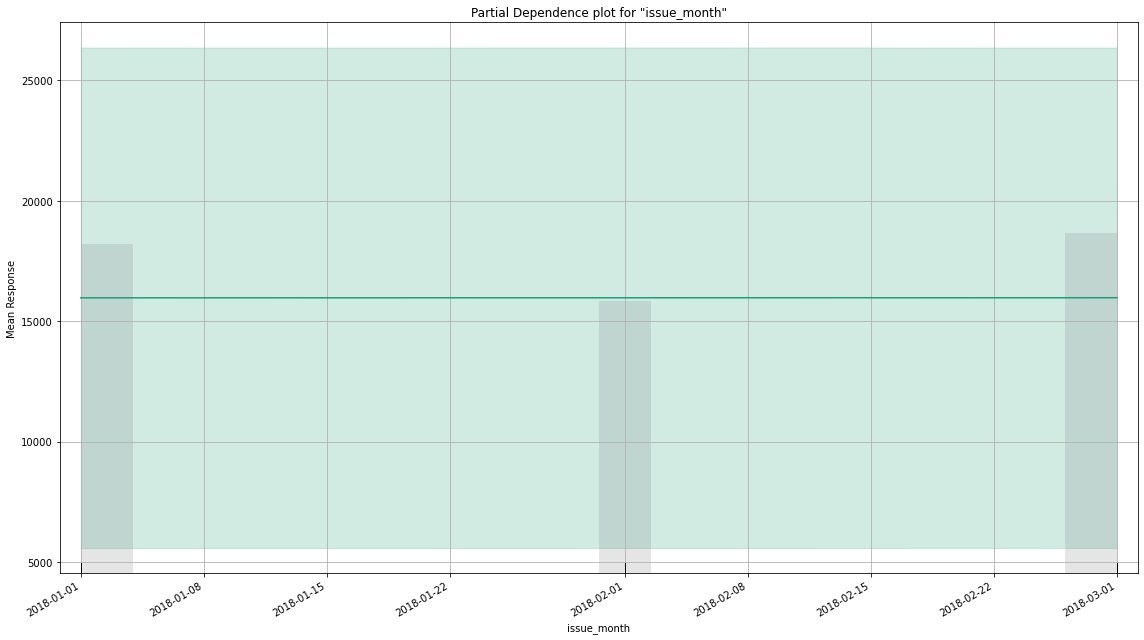

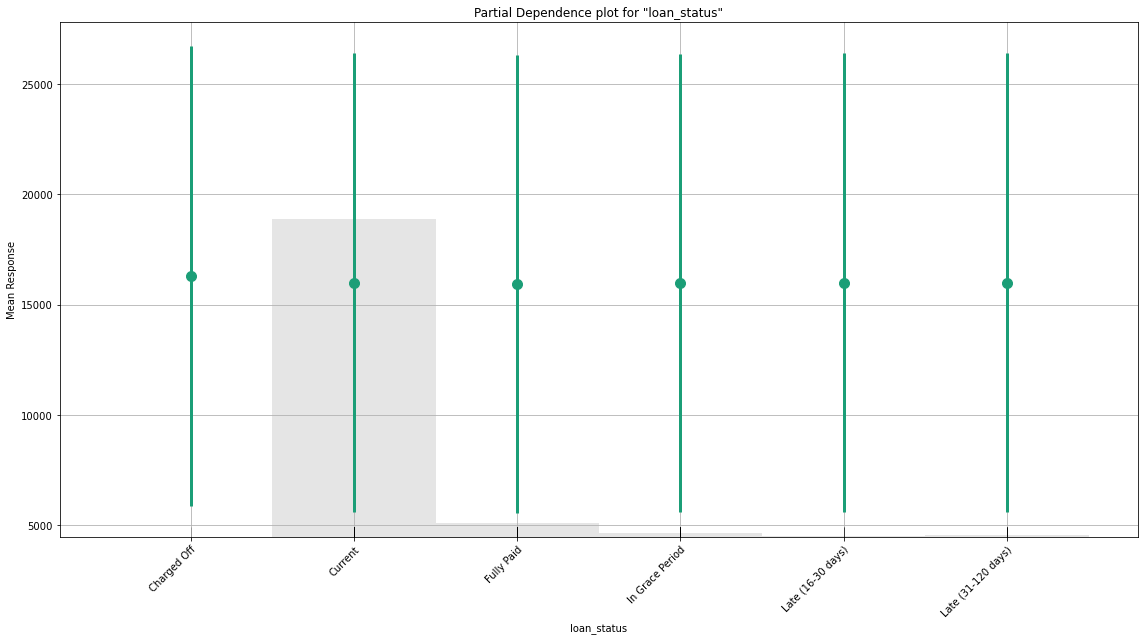

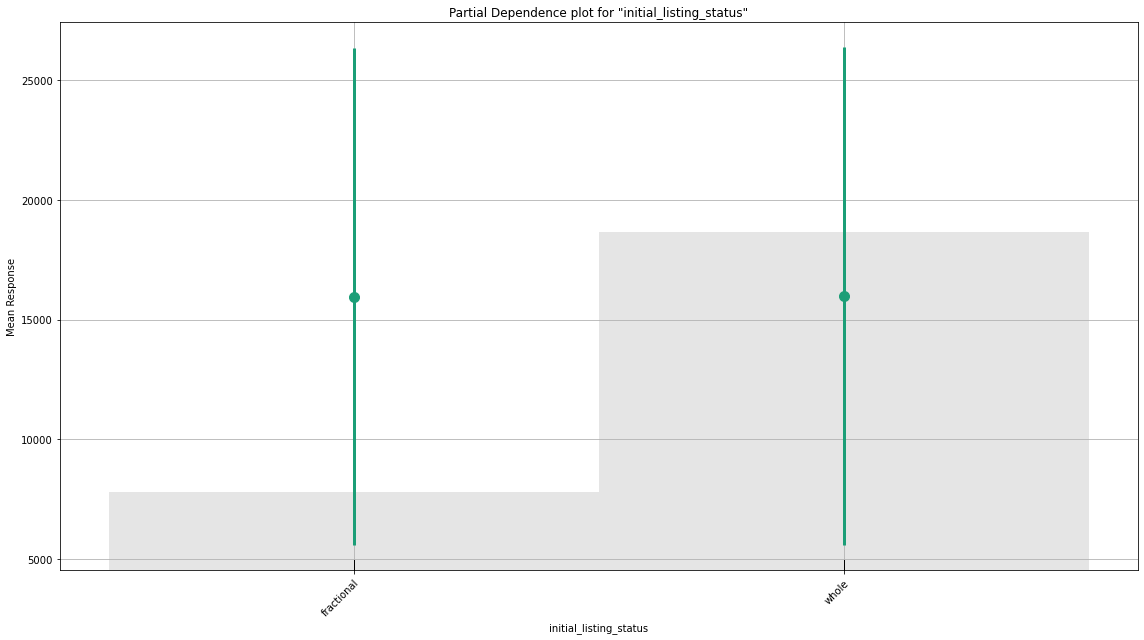

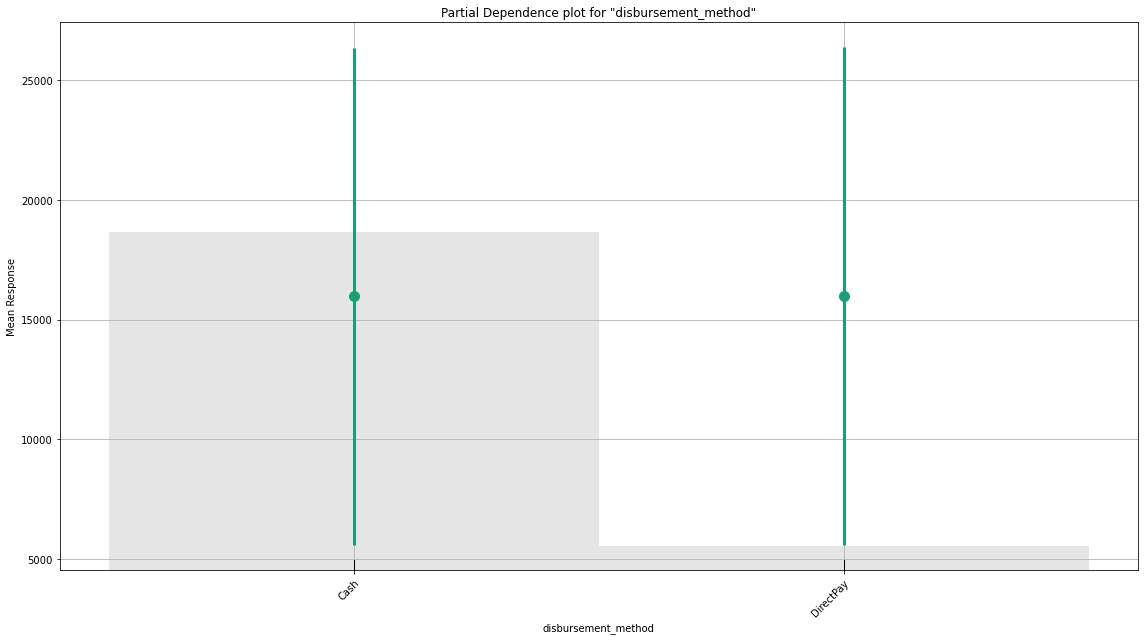

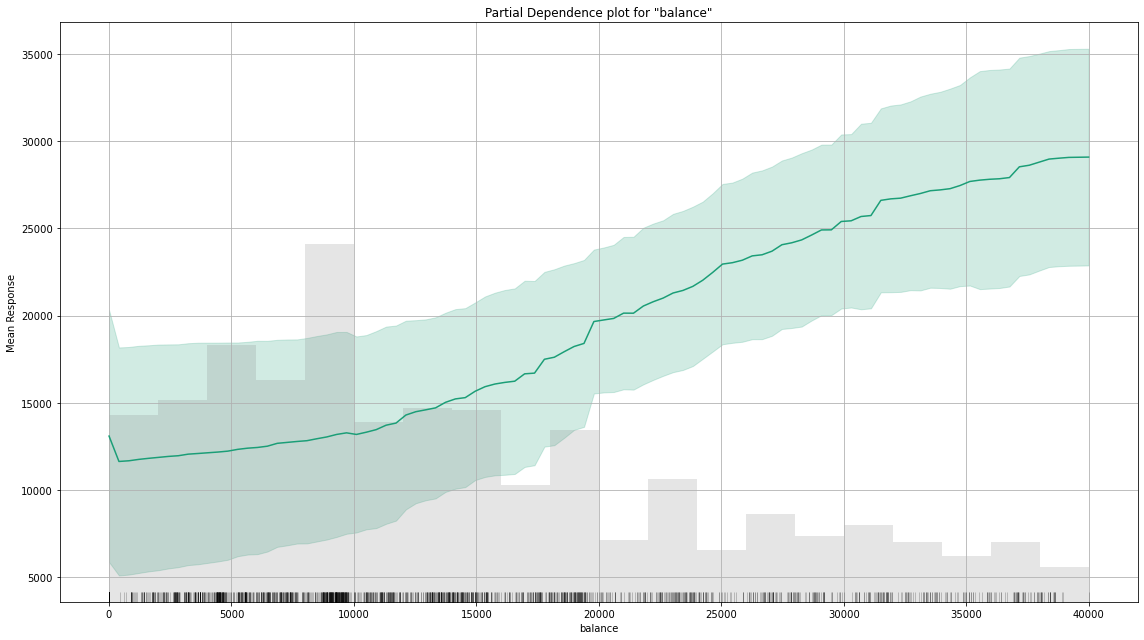

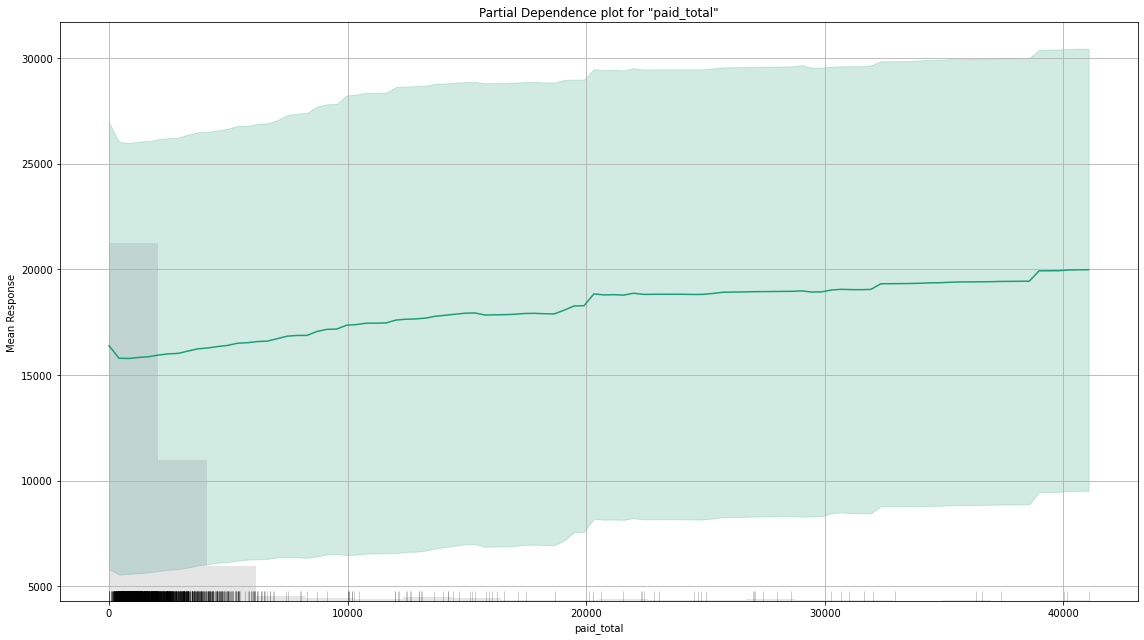

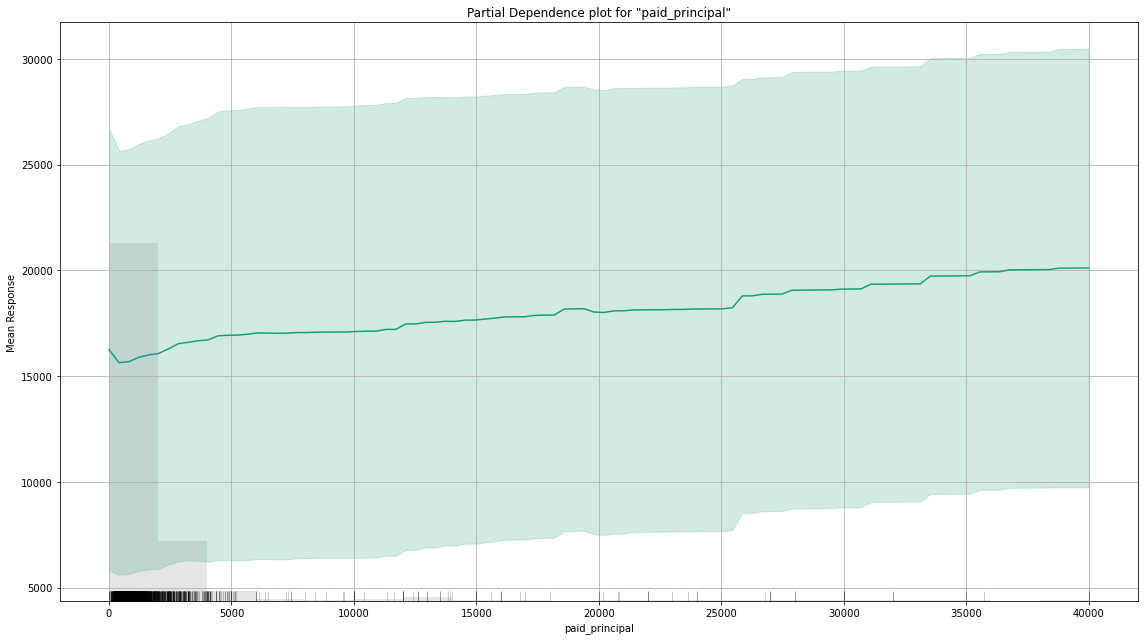

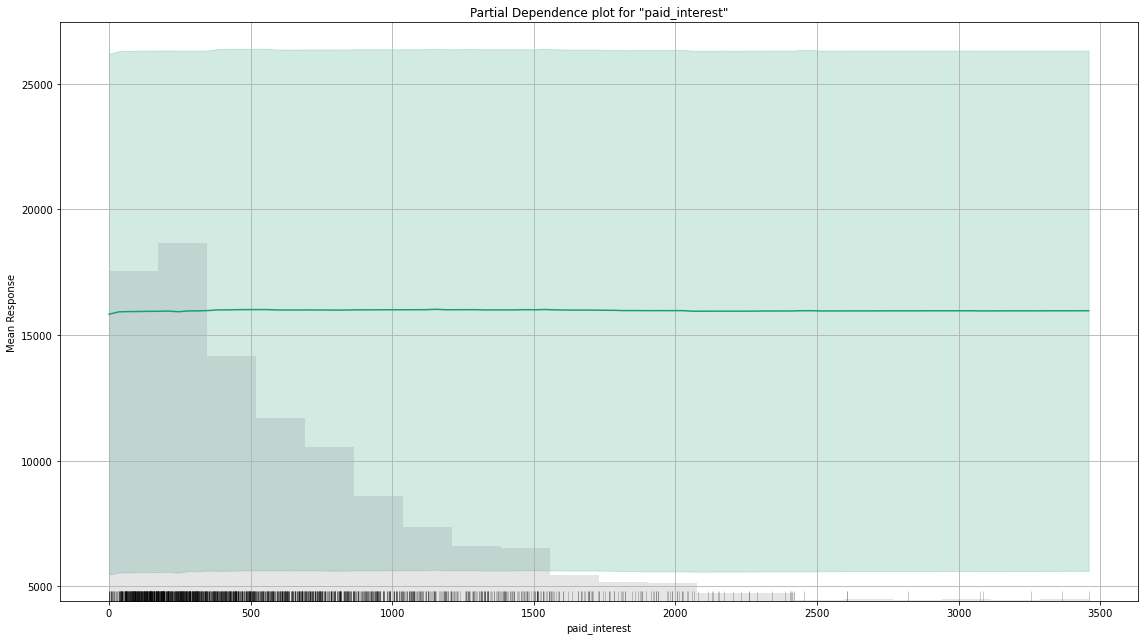

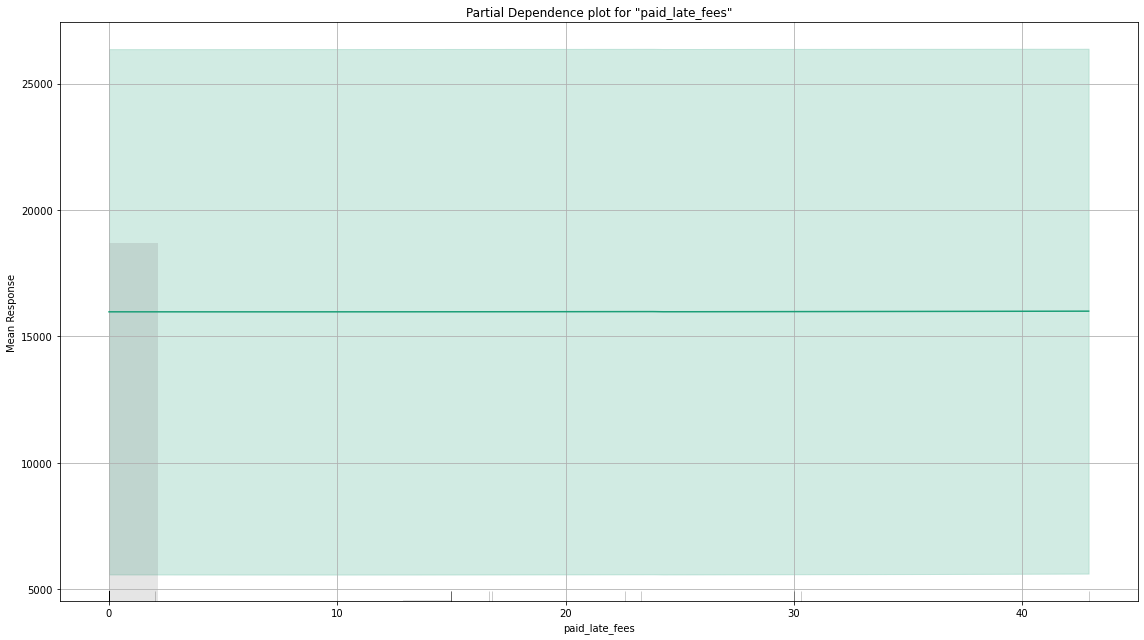

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

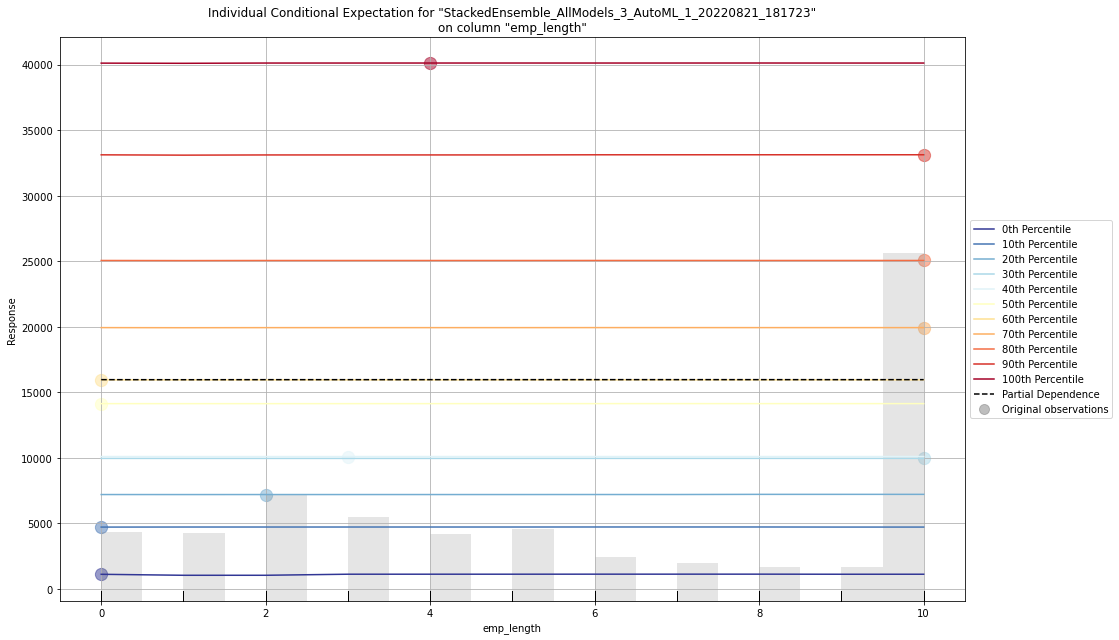

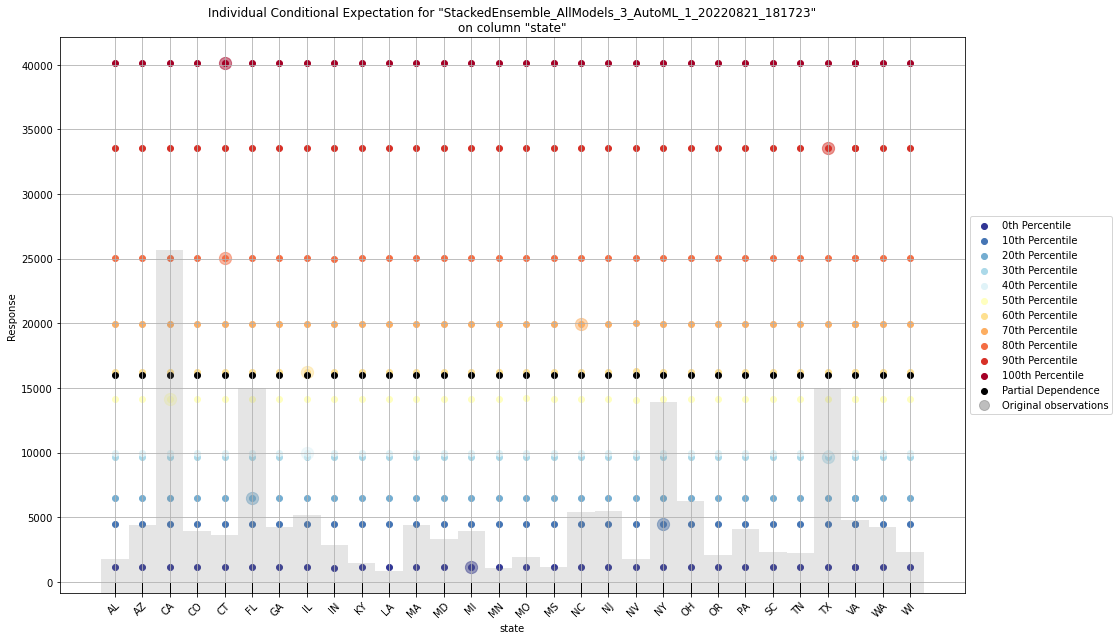

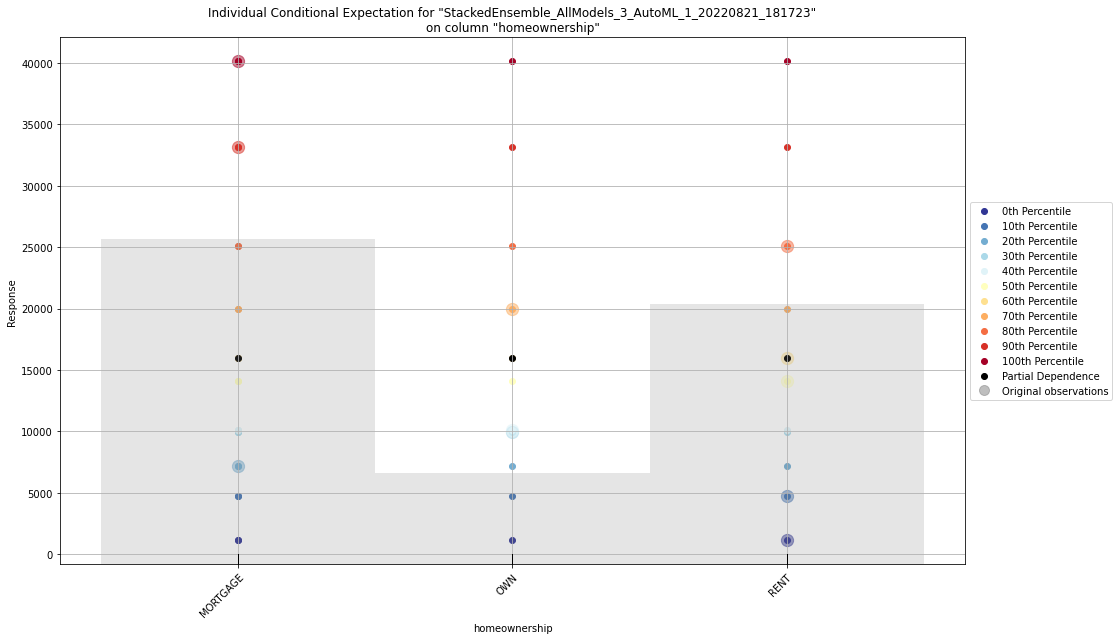

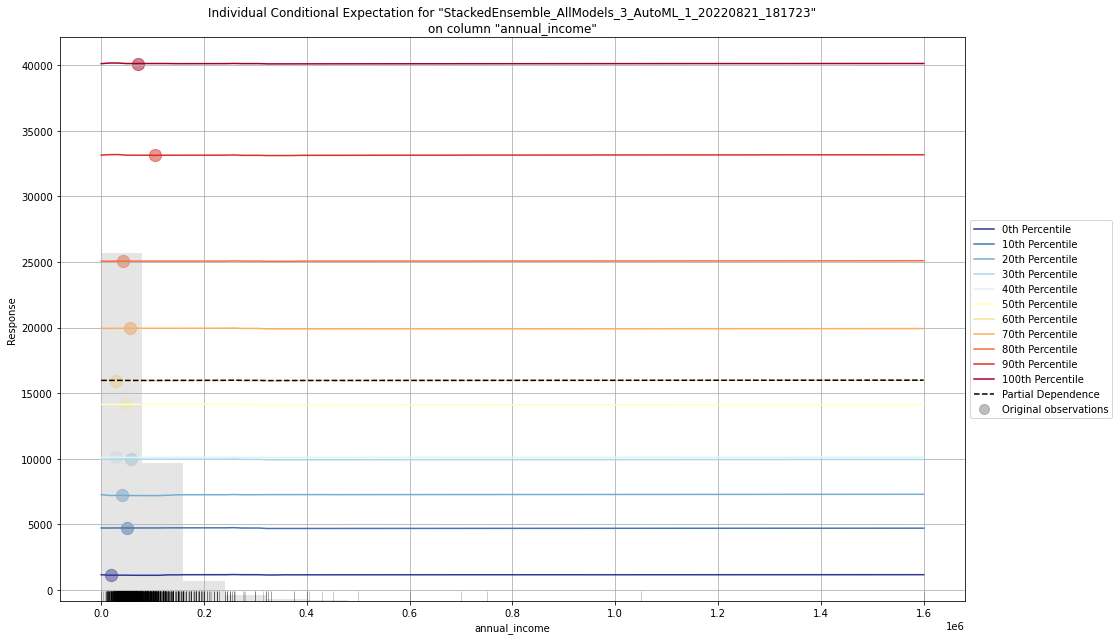

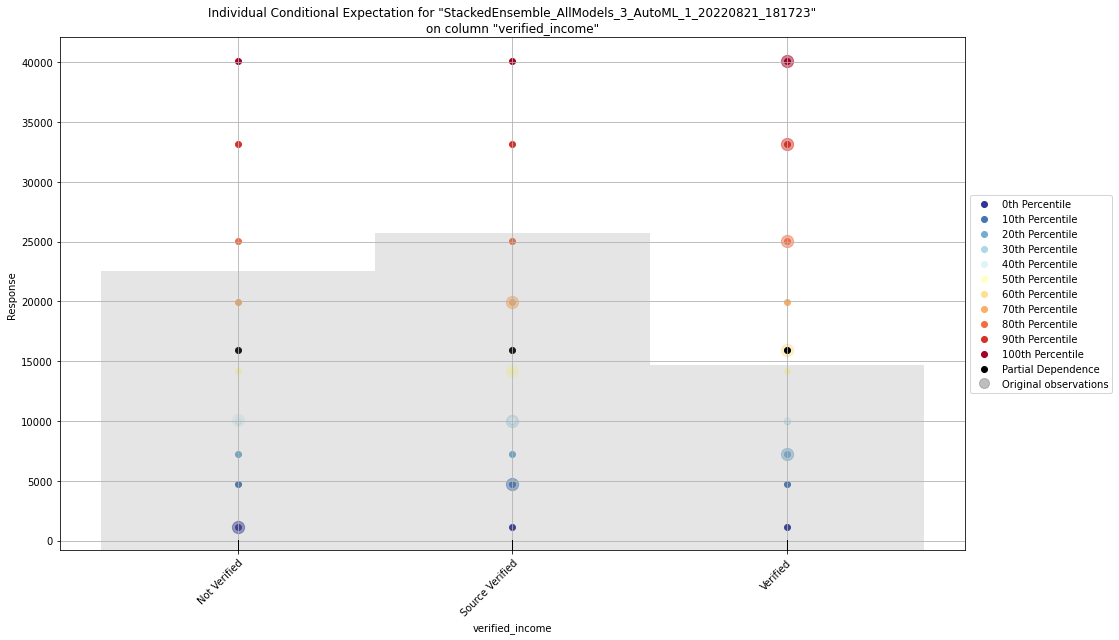

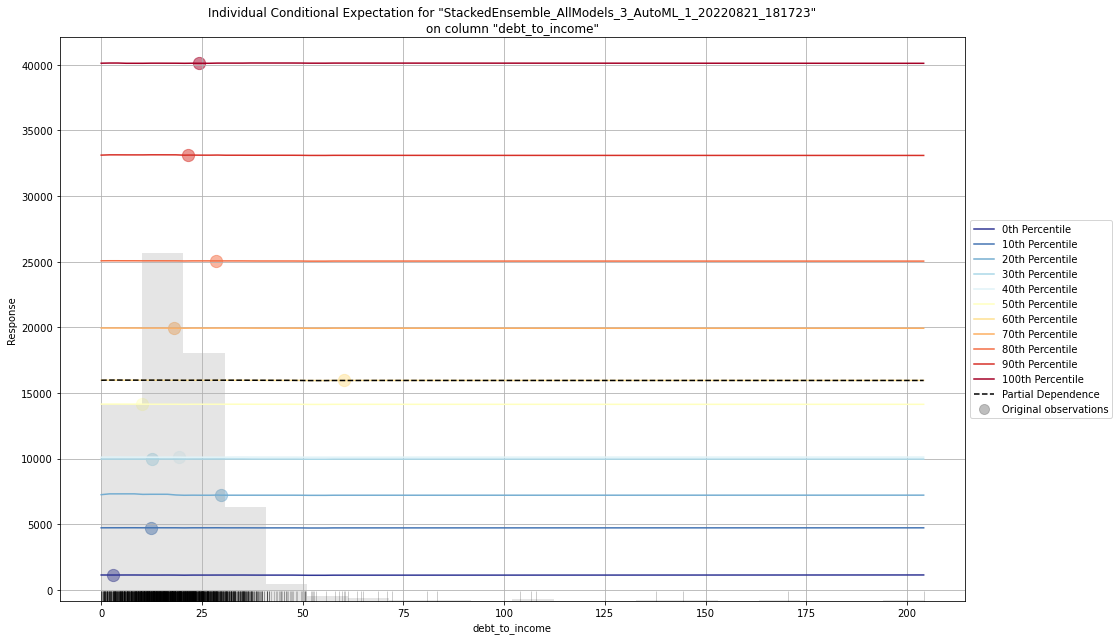

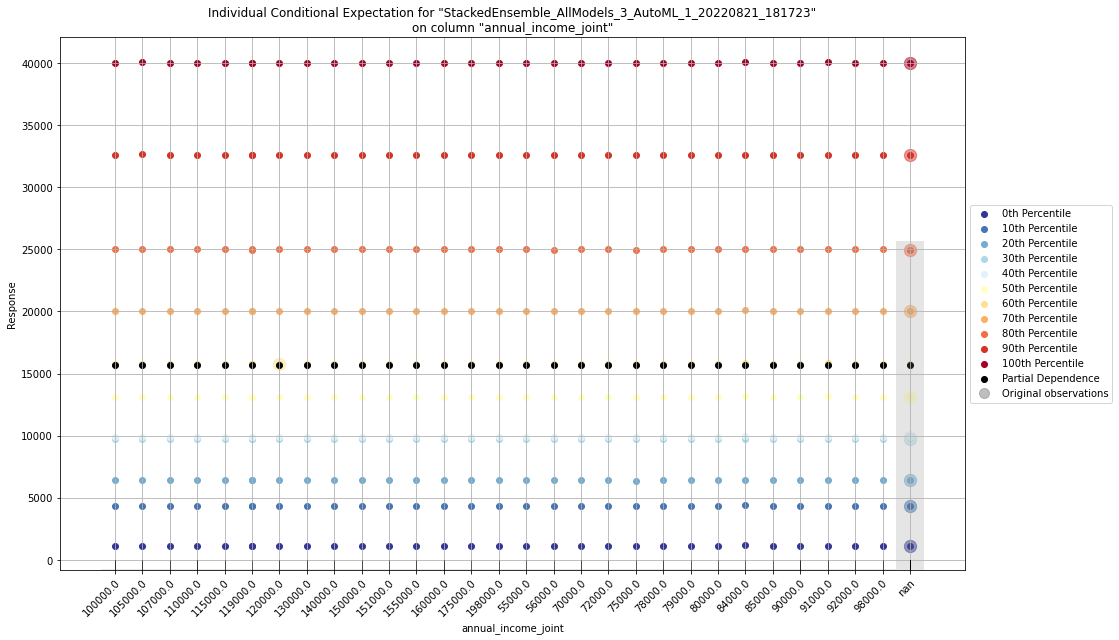

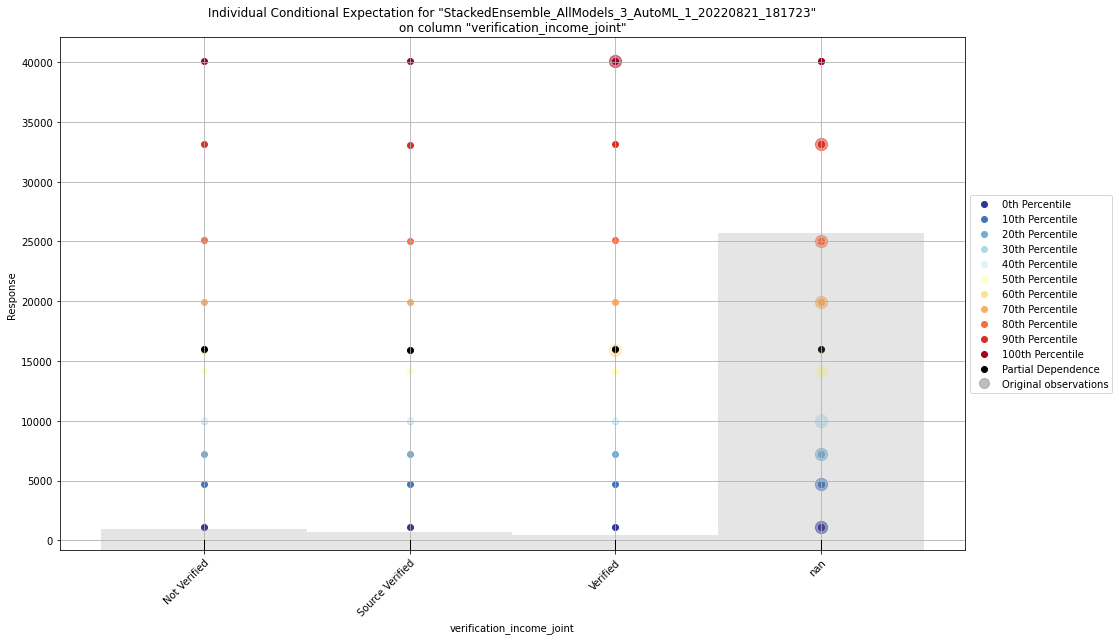

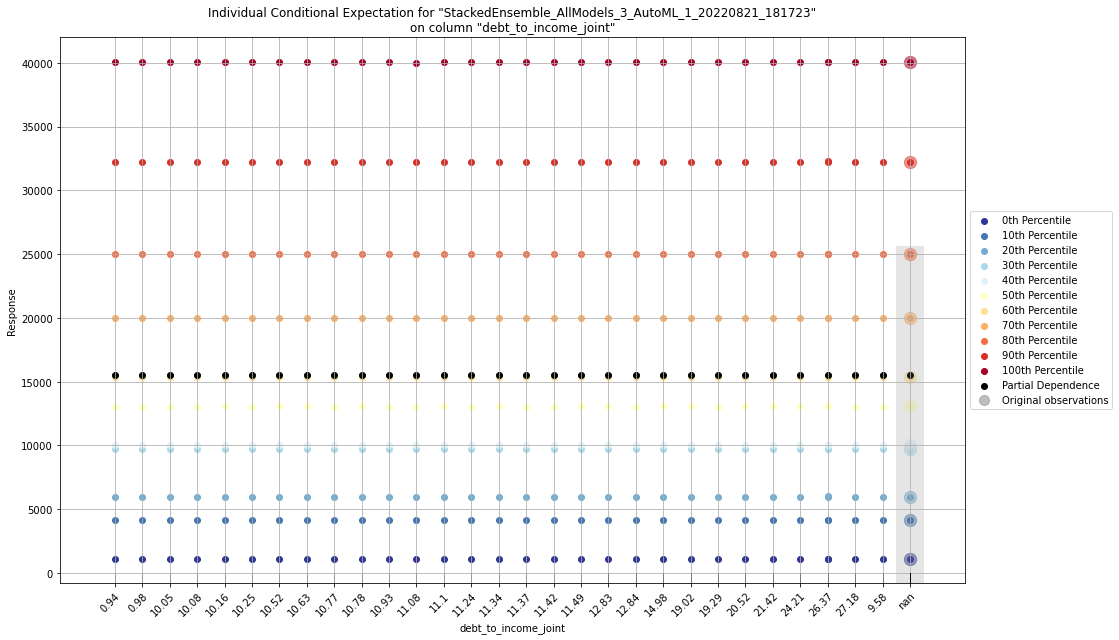

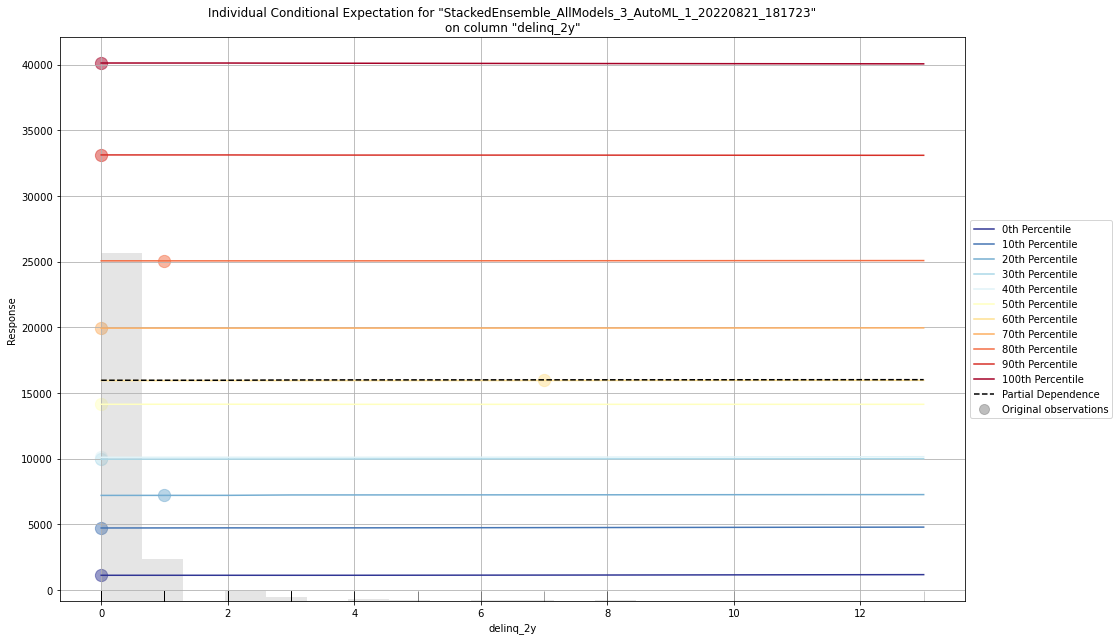

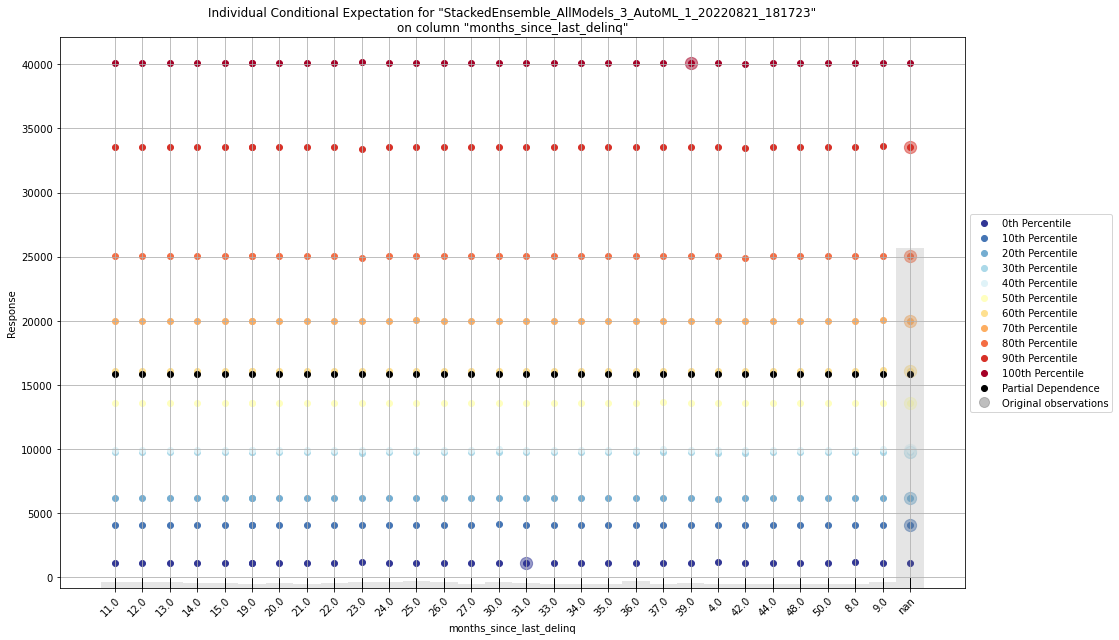

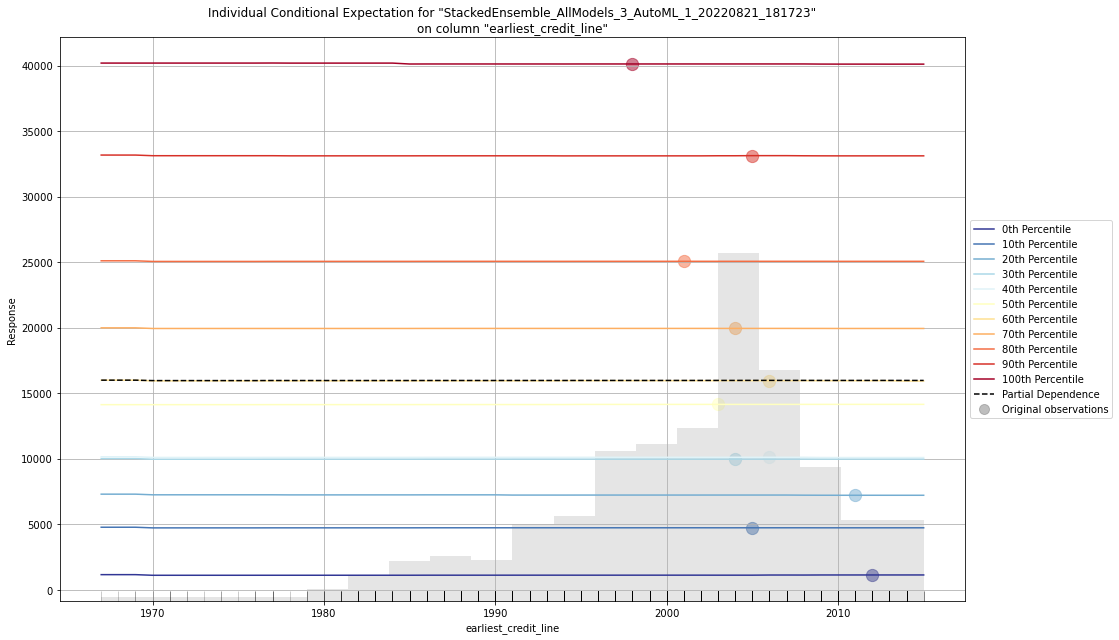

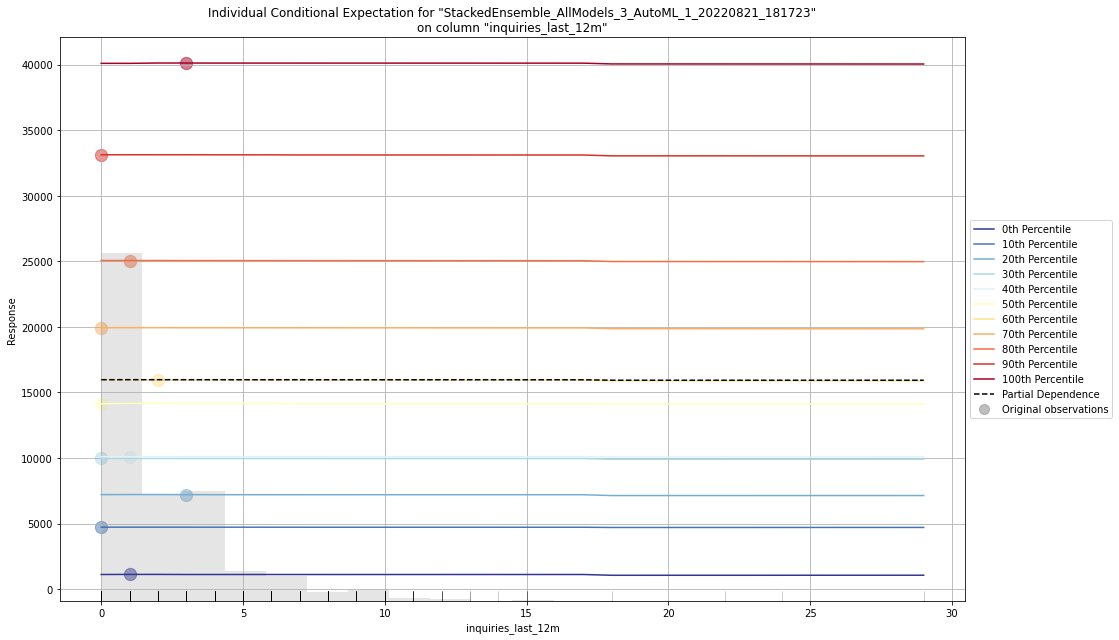

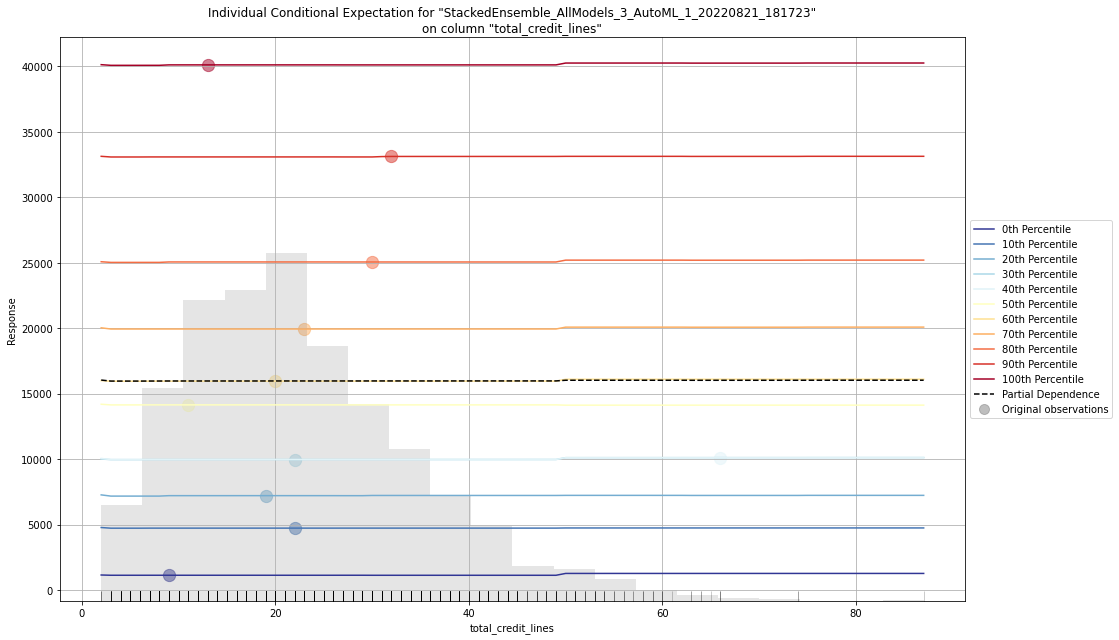

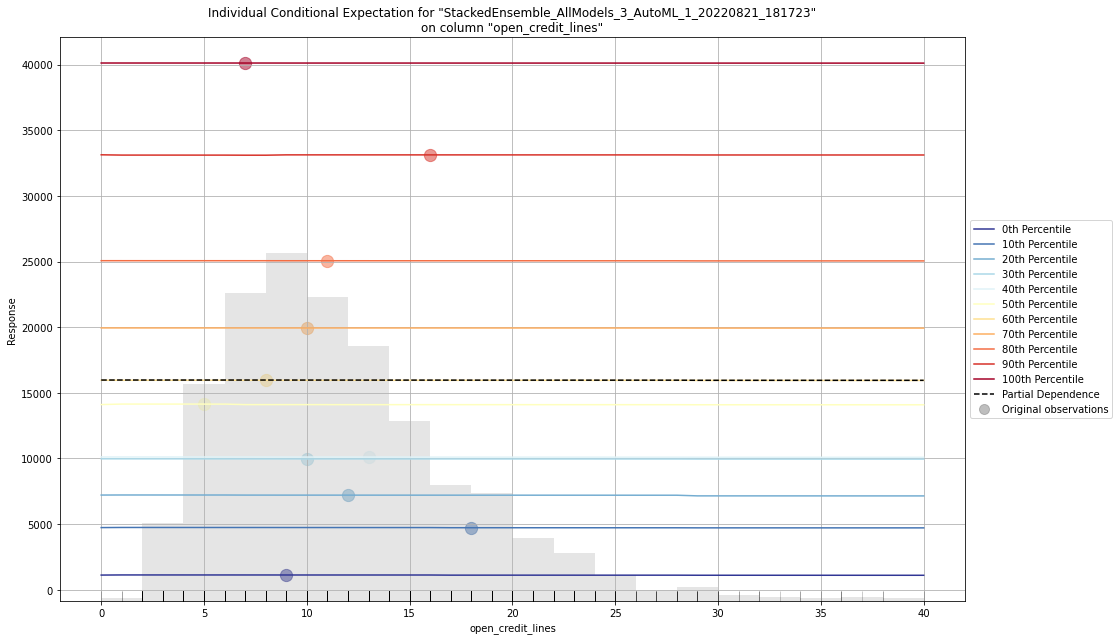

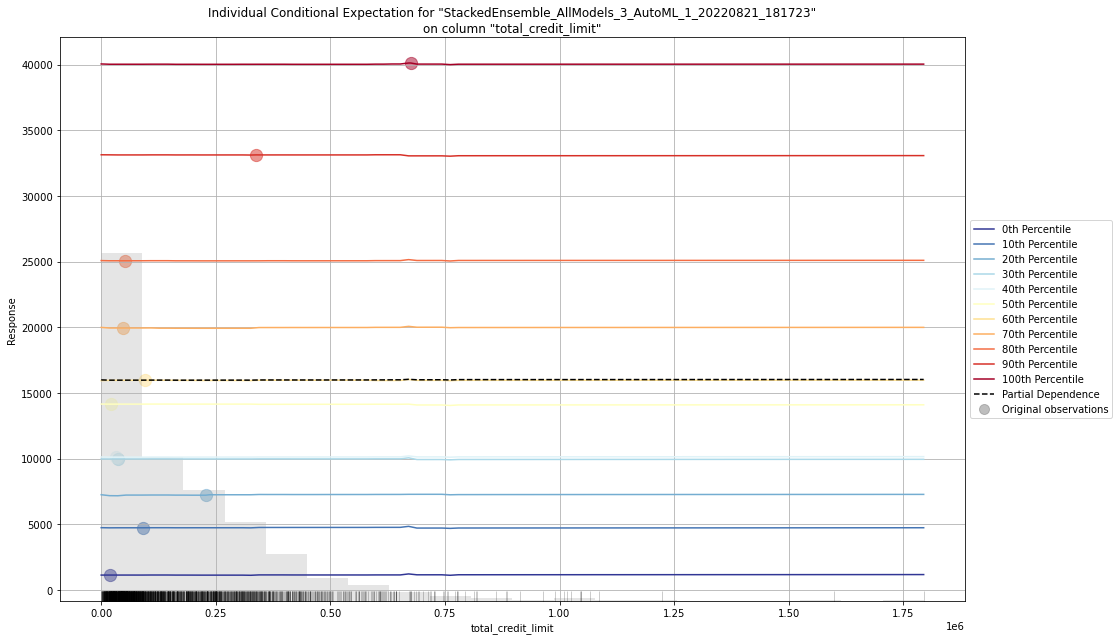

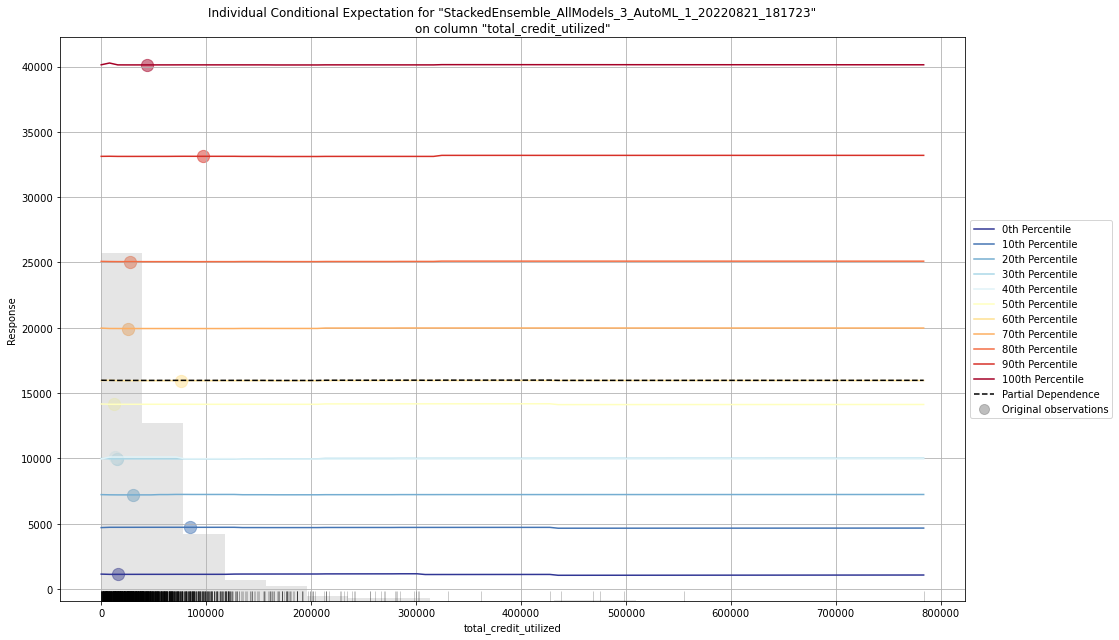

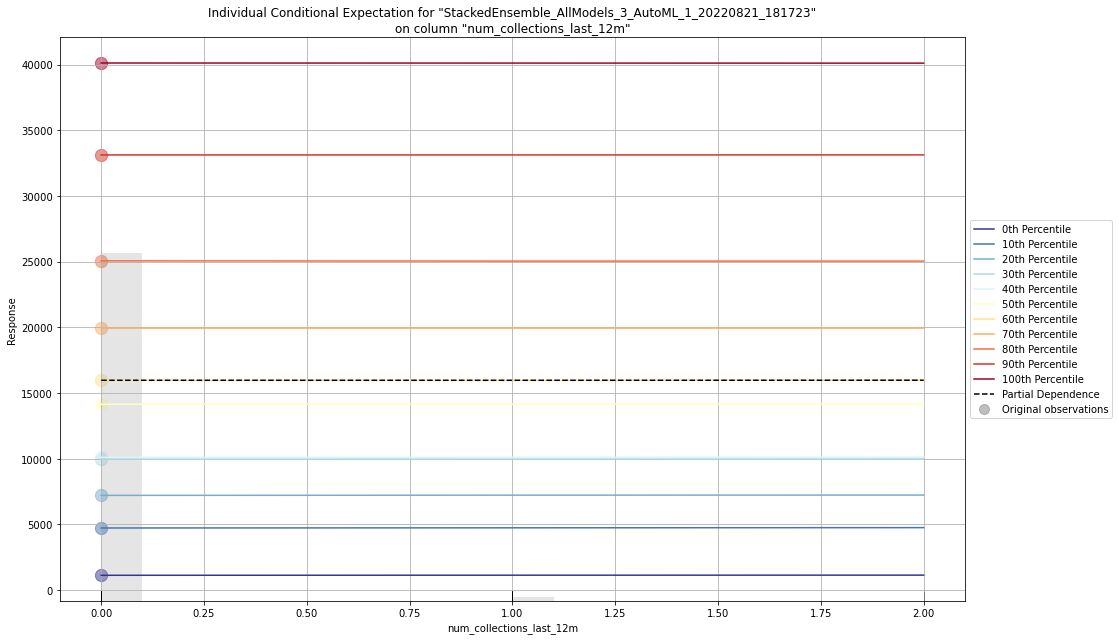

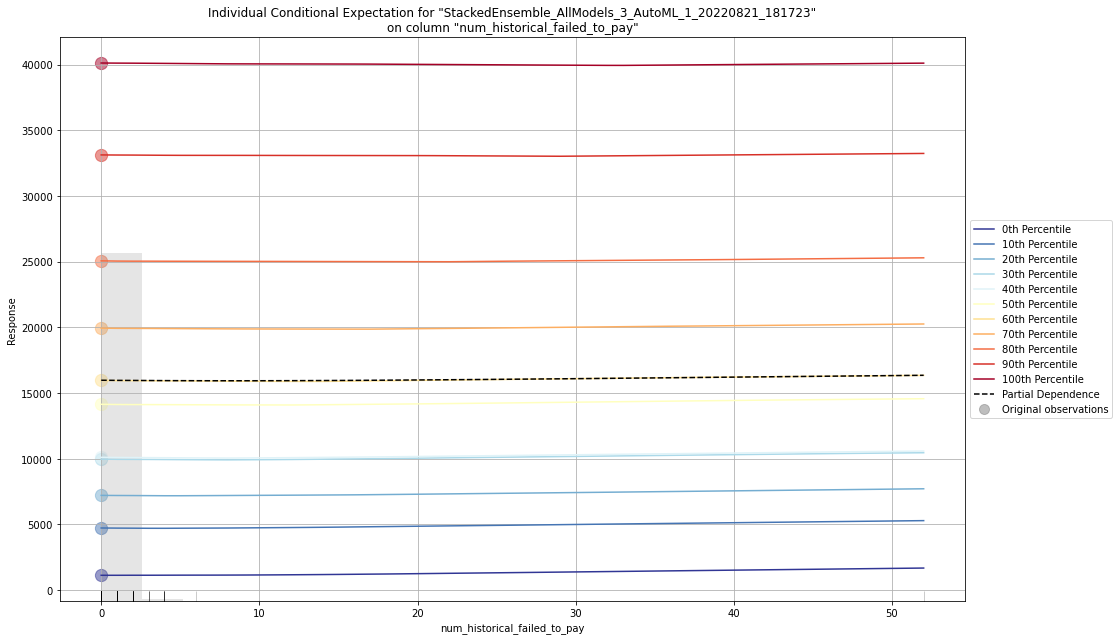

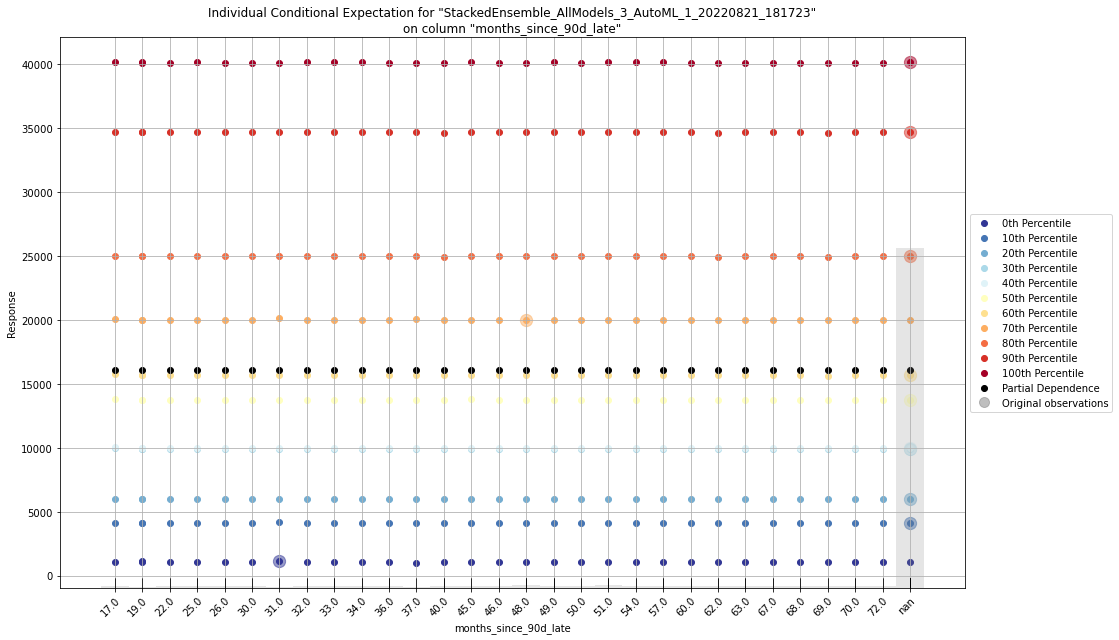

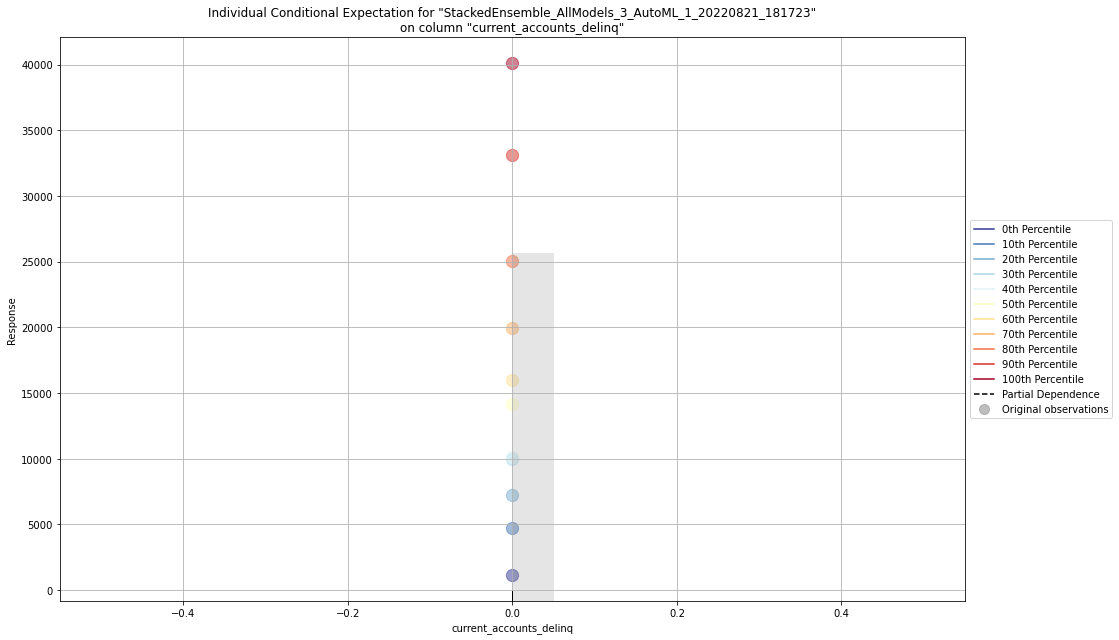

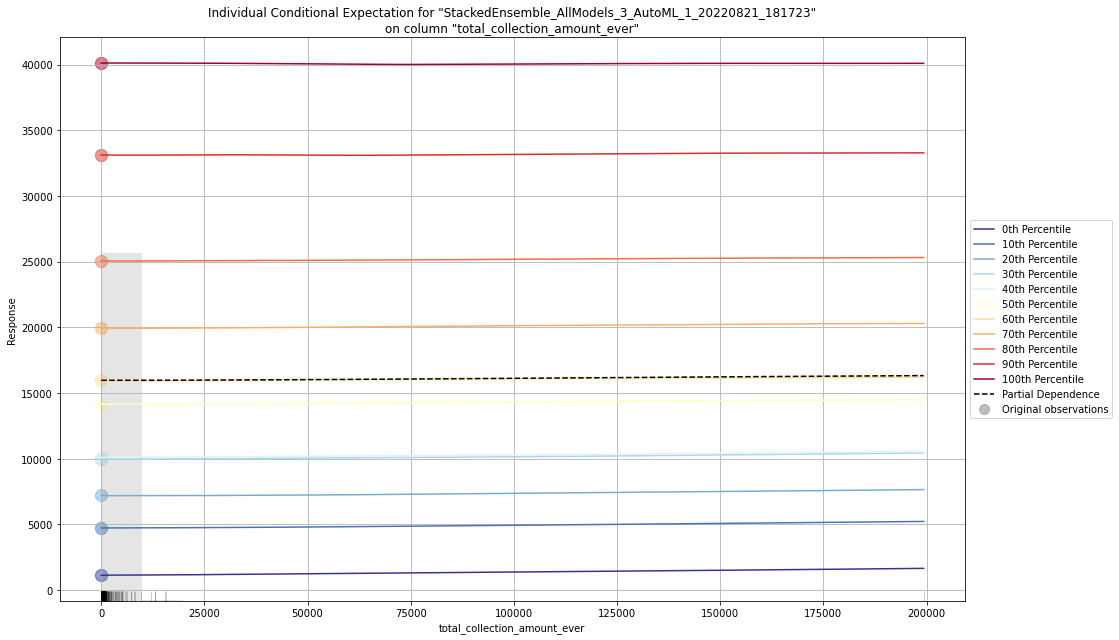

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9399b8cd56a6519f38049176d44be8> was cancelled by the user.

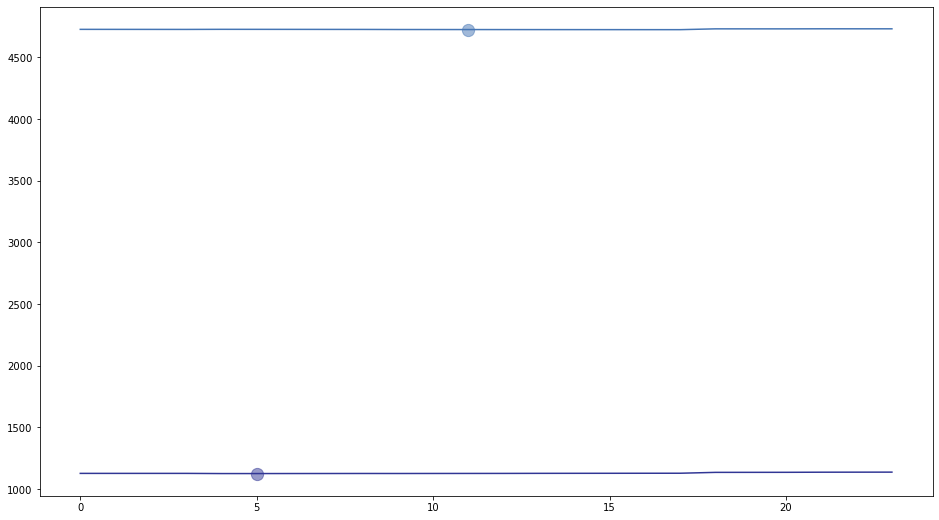

In [21]:
exm = aml.leader.explain(test)

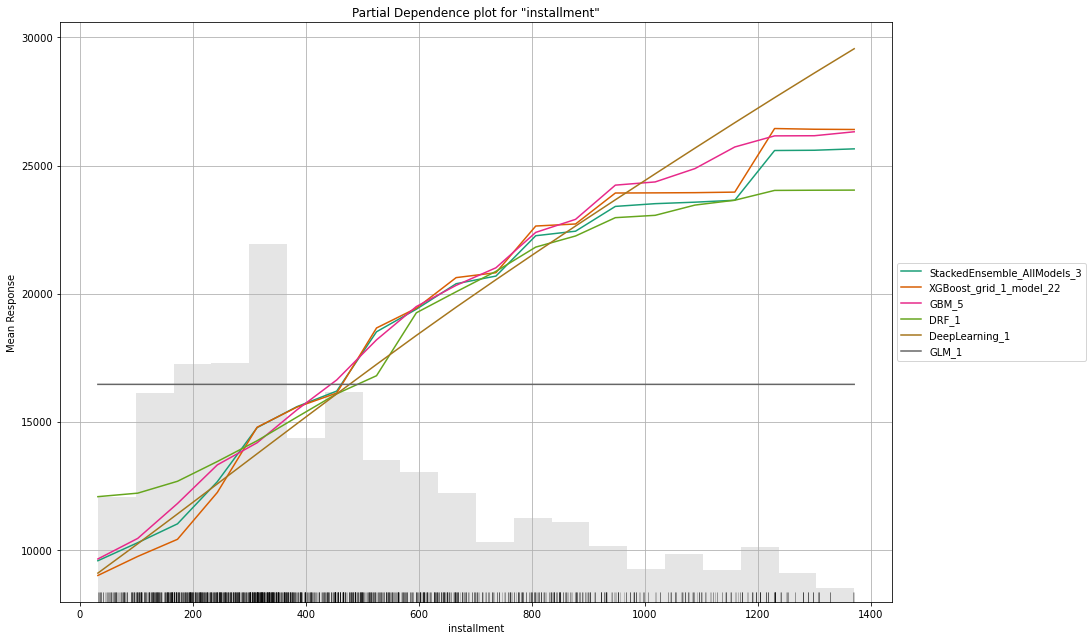

In [22]:
h2o.pd_multi_plot(aml.leaderboard.sort("rmse"), test, "installment")

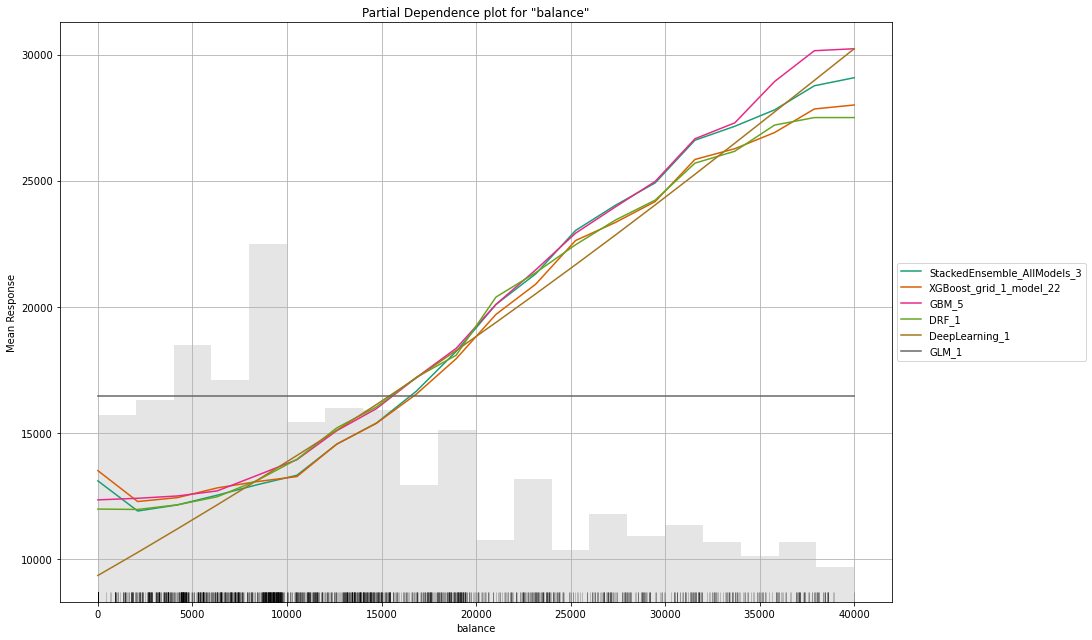

In [23]:
h2o.pd_multi_plot(aml.leaderboard.sort("rmse"), test, "balance")

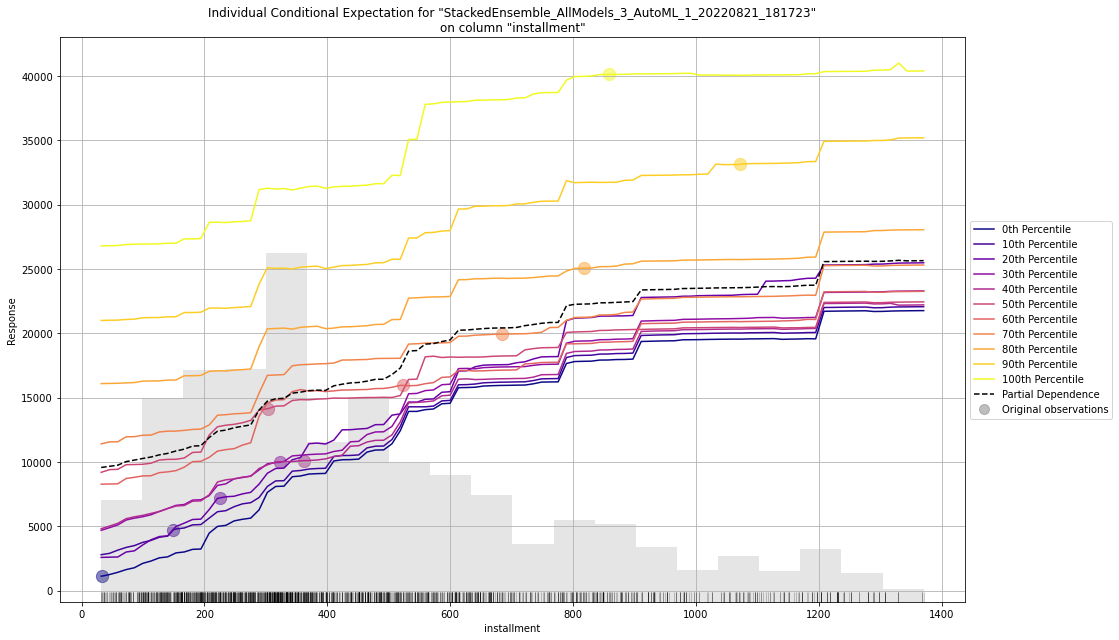

In [24]:
aml.leader.ice_plot(test, "installment")

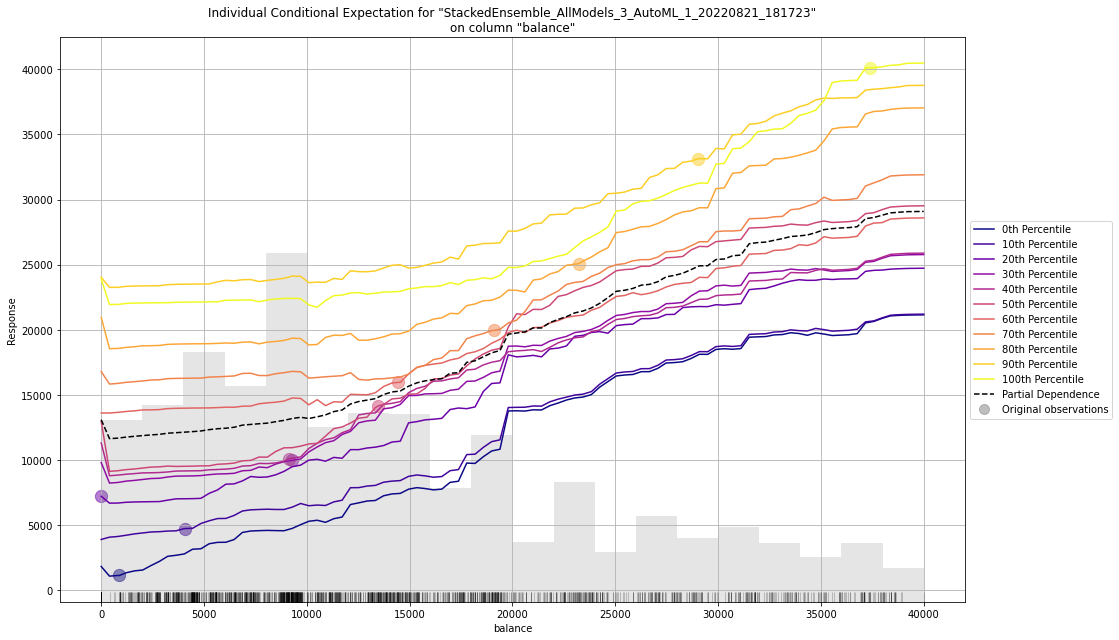

In [25]:
aml.leader.ice_plot(test, "balance")

In [26]:
h2o.shutdown()
# h2o.cluster().shutdown()

H2O session _sid_b82e closed.


/tmp/ipykernel_36171/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
